## initialization

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import math
from IPython.display import display
import os

#if you're working on google colab, uncomment the following line

# from google.colab import drive
# drive.mount('/content/drive')

# import os
# os.chdir('/content/drive/My Drive/net-sci-project-master/net-sci-project-master/code')
# os.getwcd()

### functions

Some recurring functions used within the code:

In [131]:
def compute_lcc(G):
    if G.number_of_nodes() == 0:
        return 0
    else:
        max_comp= max(nx.connected_components(G), key=len)
        return len(max_comp)
    
def compute_i(G, i):
    if G.number_of_nodes() == 0:
        return 0
    else:
        max_comp= max(nx.connected_components(G), key=len)
        return len(max_comp)/i

def compute_r(g, sorted_nodes):
    G=g.copy()
    SUM=0
    N= G.number_of_nodes()

    if type(sorted_nodes[0])==tuple:

        for i in range(N):

            n=sorted_nodes[i][0]
            G.remove_node(n)
            lcc= compute_lcc(G)/N
            SUM+=lcc
    else:
        for i in range(N):

            n=sorted_nodes[i]
            G.remove_node(n)
            lcc= compute_lcc(G)/N
            SUM+=lcc

    return SUM/N

def compute_r_50_batches(attack):
    '''takes a tuple of dictionaries (output of attack) that contains the lcc of attack'''
    lcc_attack=attack[3]
    r = sum(list(lcc_attack.values()))/len(list(lcc_attack.values()))
    return r

def compute_r_100_batches(g, sorted_nodes):
    G=g.copy()
    N=G.number_of_nodes()
    batch_size = N//100
    SUM=0
    if type(sorted_nodes[0])==tuple:

        for i in range(50):
            for j in range(batch_size):
                n = sorted_nodes[i*batch_size+j][0]
                G.remove_node(n)
            lcc = compute_lcc(G)/N
            SUM+=lcc
    
    else:
        for i in range(50):
            for j in range(batch_size):
                n = sorted_nodes[i*batch_size+j]
                G.remove_node(n)
            lcc = compute_lcc(G)/N
            SUM+=lcc

    return SUM/100


def random_attack(g):
    G=g.copy()
    nodes = list(G.nodes())
    random.shuffle(nodes)
    #divide the nodes into 100 batches
    fix=G.number_of_nodes()
    batch_size = fix//100
    LCC={}
    Inter={}
    E={}
    lcc_i = max([len(c) for c in nx.connected_components(G)])

    for i in range(50):
        for j in range(batch_size):
            n = nodes[i*batch_size+j]
            G.remove_node(n)
        lcc = compute_lcc(G)
        i_index= compute_i(G, lcc_i)
        LCC[i] = lcc/fix
        Inter[i]=i_index
        E[i]=nx.algorithms.global_efficiency(G)
    return LCC, Inter, E

def random_attack_edge(g):
    '''returns the graph after a random attack of the edge'''
    G = g.copy()
    edges = list(G.edges())
    random.shuffle(edges)
    fix=G.number_of_nodes()
    batch_size = fix//100
    LCC={}
    Inter={}
    E={}
    lcc_i = max([len(c) for c in nx.connected_components(G)])

    for i in range(50):
        for j in range(batch_size):
            e = edges[i*batch_size+j]
            G.remove_edge(e[0], e[1])
        lcc = compute_lcc(G)
        i_index= compute_i(G, lcc_i)
        LCC[i] = lcc/fix
        Inter[i]=i_index
        E[i]=nx.algorithms.global_efficiency(G)
    return LCC, Inter, E

def attack(g, sorted_nodes):
    G=g.copy()
    fix=G.number_of_nodes()
    batch_size = fix//100
    norm_LCC={}
    LCC={}
    Inter={}
    E={}
    lcc_i = max([len(c) for c in nx.connected_components(G)])

    for i in range(50):
        for j in range(batch_size):
            n = sorted_nodes[i*batch_size+j]
            G.remove_node(n)
        lcc = compute_lcc(G)
        i_index= compute_i(G, lcc_i)
        norm_LCC[i] = lcc/fix
        LCC[i]=lcc
        Inter[i]=i_index
        E[i]=nx.algorithms.global_efficiency(G)
    return norm_LCC, Inter, E, LCC

#this is for sequentiial
# def random_attack(g):
#     '''returns the graph after a random attack'''
#     G = g.copy()
#     nodes = list(G.nodes())
#     random.shuffle(nodes)
#     LCC={}#key is the # of nnodes removed, value is the size of the largest connected component
#     Inter={}
#     fix_size=G.number_of_nodes()
#     #the largest component size initially
#     lcc_i = max([len(c) for c in nx.connected_components(G)])
#     for i in range(fix_size):
#         n = nodes[i]
#         G.remove_node(n)
#         lcc = compute_lcc(G)
#         i_index= compute_i(G, lcc_i)
#         LCC[i+1] = lcc/fix_size
#         Inter[i+1]=i_index
#     return LCC, Inter

### loading graphs

This is loading the graphs

In [235]:
#read the .gml datsets in benchmark/
arenas_email = nx.read_gml('../benchmark/arenas-email.gml', label='id')
bn_cat_mixed_species_brain_1 = nx.read_gml('../benchmark/bn-cat-mixed-species_brain_1.gml', label='id')
bn_macaque_rhesus_brain_2 = nx.read_gml('../benchmark/bn-macaque-rhesus_brain_2.gml', label='id')
circuits_s208 = nx.read_gml('../benchmark/circuits s208.gml', label='id')
circuits_s420 = nx.read_gml('../benchmark/circuits s420.gml', label='id')
circuits_s838 = nx.read_gml('../benchmark/circuits s838.gml', label='id')
dolphins = nx.read_gml('../benchmark/dolphins.gml', label='id')
e_coli = nx.read_gml('../benchmark/E. coli.gml', label='id')
facebook_0 = nx.read_gml('../benchmark/facebook 0.gml', label='id')
facebook_107 = nx.read_gml('../benchmark/facebook 107.gml', label='id')
facebook_1684 = nx.read_gml('../benchmark/facebook 1684.gml', label='id')
facebook_348 = nx.read_gml('../benchmark/facebook 348.gml', label='id')
facebook_414 = nx.read_gml('../benchmark/facebook 414.gml', label='id')
facebook_686 = nx.read_gml('../benchmark/facebook 686.gml', label='id')
fb_pages_food = nx.read_gml('../benchmark/fb-pages-food.gml', label='id')
karate = nx.read_gml('../benchmark/Karate.gml', label='id')
polbooks = nx.read_gml('../benchmark/polbooks.gml', label='id')
soc_firm_hi_tech = nx.read_gml('../benchmark/soc-firm-hi-tech.gml', label='id')
soc_tribes = nx.read_gml('../benchmark/soc-tribes.gml', label='id')
word_adjacencies = nx.read_gml('../benchmark/word_adjacencies.gml', label='id')

#read the .txt datasets in benchmark/
net_911 = nx.read_edgelist('../benchmark/911.txt', nodetype=int)
corruption = nx.read_edgelist('../benchmark/corruption.txt', nodetype=int)
crime_net = nx.read_edgelist('../benchmark/CrimeNet.txt', nodetype=int)
digg = nx.read_edgelist('../benchmark/Digg.txt', nodetype=int)
email = nx.read_edgelist('../benchmark/Email.txt', nodetype=int)
jazz = nx.read_edgelist('../benchmark/Jazz.txt', nodetype=int)
petster_hamster = nx.read_edgelist('../benchmark/Petster-Hamster.txt', nodetype=int)
router = nx.read_edgelist('../benchmark/Router.txt', nodetype=int)

### properties

Show degree distributions and other properties

#### Statistics

In [236]:
def compute_network_stats(G, network_name):
    largest_cc = max(nx.connected_components(G), key=len)
    largest_cc_subgraph = G.subgraph(largest_cc)
    stats = {
        "Network": network_name,
        "|N|": G.number_of_nodes(),
        "|V|": G.number_of_edges(),
        "Density": nx.density(G),
        "<k>": np.mean(list(dict(G.degree()).values())),
        "<cc>": nx.average_clustering(G),
        "d": nx.diameter(largest_cc_subgraph),
        "Average spath": nx.average_shortest_path_length(largest_cc_subgraph)
    }
    
    return stats

arenas_email_stats = compute_network_stats(arenas_email, 'arenas_email')
bn_cat_mixed_species_brain_1_stats = compute_network_stats(bn_cat_mixed_species_brain_1, 'bn_cat_mixed_species_brain_1')
bn_macaque_rhesus_brain_2_stats = compute_network_stats(bn_macaque_rhesus_brain_2, 'bn_macaque_rhesus_brain_2')
circuits_s208_stats = compute_network_stats(circuits_s208, 'circuits_s208')
circuits_s420_stats = compute_network_stats(circuits_s420, 'circuits_s420')
circuits_s838_stats = compute_network_stats(circuits_s838, 'circuits_s838')
dolphins_stats = compute_network_stats(dolphins, 'dolphins')
e_coli_stats = compute_network_stats(e_coli, 'e_coli')
facebook_0_stats = compute_network_stats(facebook_0, 'facebook_0')
facebook_107_stats = compute_network_stats(facebook_107, 'facebook_107')
facebook_1684_stats = compute_network_stats(facebook_1684, 'facebook_1684')
facebook_348_stats = compute_network_stats(facebook_348, 'facebook_348')
facebook_414_stats = compute_network_stats(facebook_414, 'facebook_414')
facebook_686_stats = compute_network_stats(facebook_686, 'facebook_686')
fb_pages_food_stats = compute_network_stats(fb_pages_food, 'fb_pages_food')
karate_stats = compute_network_stats(karate, 'karate')
polbooks_stats = compute_network_stats(polbooks, 'polbooks')
soc_firm_hi_tech_stats = compute_network_stats(soc_firm_hi_tech, 'soc_firm_hi_tech')
soc_tribes_stats = compute_network_stats(soc_tribes, 'soc_tribes')
word_adjacencies_stats = compute_network_stats(word_adjacencies, 'word_adjacencies')

net_911_stats = compute_network_stats(net_911, '911')
corruption_stats = compute_network_stats(corruption, 'corruption')
crime_net_stats = compute_network_stats(crime_net, 'crime_net')
# digg_stats = compute_network_stats(digg, 'digg')
email_stats = compute_network_stats(email, 'email')
jazz_stats = compute_network_stats(jazz, 'jazz')
petster_hamster_stats = compute_network_stats(petster_hamster, 'petster_hamster')
# router_stats = compute_network_stats(router, 'router')


KeyboardInterrupt: 

In [ ]:
graph_stats = [arenas_email_stats, bn_cat_mixed_species_brain_1_stats, bn_macaque_rhesus_brain_2_stats, circuits_s208_stats, circuits_s420_stats, circuits_s838_stats, dolphins_stats, e_coli_stats, facebook_0_stats, facebook_107_stats, facebook_1684_stats, facebook_348_stats, facebook_414_stats, facebook_686_stats, fb_pages_food_stats, karate_stats, polbooks_stats, soc_firm_hi_tech_stats, soc_tribes_stats, word_adjacencies_stats, net_911_stats, corruption_stats, crime_net_stats, email_stats, jazz_stats, petster_hamster_stats]
graph_stats = pd.DataFrame(graph_stats)
graph_stats.to_csv('../results/graph_stats.csv')
display(graph_stats)

#### degree dist

This is the degree distribuion visualized nicely

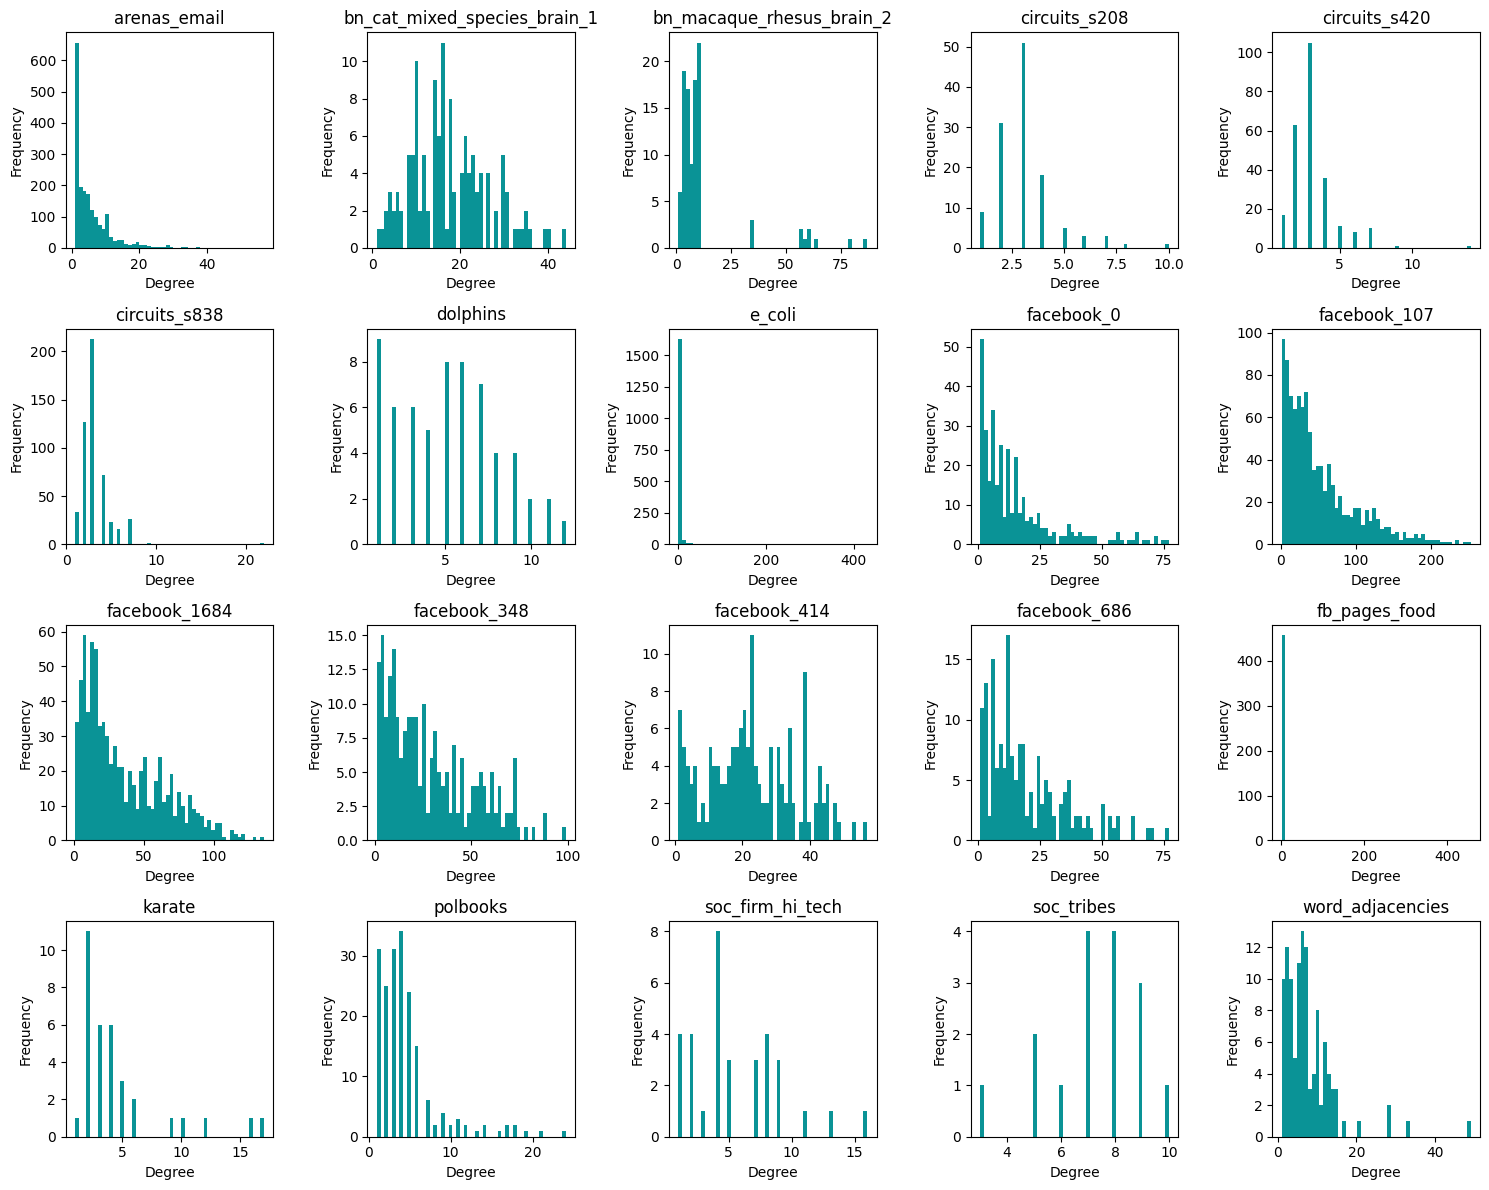

In [115]:

graphs=[arenas_email, bn_cat_mixed_species_brain_1, bn_macaque_rhesus_brain_2, circuits_s208, circuits_s420, circuits_s838, dolphins, e_coli, facebook_0, facebook_107, facebook_1684, facebook_348, facebook_414, facebook_686, fb_pages_food, karate, polbooks, soc_firm_hi_tech, soc_tribes, word_adjacencies, er_graph]
def plot_degree_distributions(graphs, names, axs):
    '''plots the degree distributions of the graphs in a grid'''
    
    for i, (G, name) in enumerate(zip(graphs, names)):
        degrees = [G.degree(n) for n in G.nodes()]
        axs[i].hist(degrees, bins=50, color='#0a9396')
        axs[i].set_title(name)
        axs[i].set_xlabel('Degree')
        axs[i].set_ylabel('Frequency')
    
    plt.tight_layout()

# Create the figure and axes outside of the loop
fig, axs = plt.subplots(4, 5, figsize=(15, 12))  #always create a 4x5 grid
axs = axs.flatten()

# Call the function with all graphs and names
for i in range(4):
    plot_degree_distributions(graphs[i*5:i*5+5], graph_stats['Network'][i*5:i*5+5], axs[i*5:i*5+5])

# Hide unused subplots
for i in range(len(graphs), 20):
    axs[i].axis('off')

plt.show()

arenas_emails looks scale free (power law) and bn-mouse looks random (poisson)

In [ ]:
#degree distribution for the new networks
graphs=[net_911, corruption, crime_net, digg, email, jazz, petster_hamster, router]
names = ['911', 'corruption', 'crime_net', 'digg', 'email', 'jazz', 'petster_hamster', 'router']
def plot_degree_distributions(graphs, names, axs):
    '''plots the degree distributions of the graphs in a grid'''
    
    for i, (G, name) in enumerate(zip(graphs, names)):
        degrees = [G.degree(n) for n in G.nodes()]
        axs[i].hist(degrees, bins=50, color='#0a9396')
        axs[i].set_title(name)
        axs[i].set_xlabel('Degree')
        axs[i].set_ylabel('Frequency')
    
    plt.tight_layout()

# Create the figure and axes outside of the loop
fig, axs = plt.subplots(2, 4, figsize=(15, 12))  #always create a 4x5 grid
axs = axs.flatten()

# Call the function with all graphs and names
for i in range(2):
    plot_degree_distributions(graphs[i*4:i*4+4], names[i*4:i*4+4], axs[i*4:i*4+4])

# Hide unused subplots
for i in range(len(graphs), 8):
    axs[i].axis('off')


## Random attacks

### Nodes attacks

In [15]:

random_arenas_email_attack = random_attack(arenas_email)
random_bn_cat_mixed_species_brain_1_attack = random_attack(bn_cat_mixed_species_brain_1)
random_bn_macaque_rhesus_brain_2_attack = random_attack(bn_macaque_rhesus_brain_2)
random_circuits_s208_attack = random_attack(circuits_s208)
random_circuits_s420_attack = random_attack(circuits_s420)
random_circuits_s838_attack = random_attack(circuits_s838)
random_dolphins_attack = random_attack(dolphins)
random_e_coli_attack = random_attack(e_coli)
random_facebook_0_attack = random_attack(facebook_0)
random_facebook_107_attack = random_attack(facebook_107)
random_facebook_1684_attack = random_attack(facebook_1684)
random_facebook_348_attack = random_attack(facebook_348)
random_facebook_414_attack = random_attack(facebook_414)
random_facebook_686_attack = random_attack(facebook_686)
random_fb_pages_food_attack = random_attack(fb_pages_food)
random_karate_attack = random_attack(karate)
random_polbooks_attack = random_attack(polbooks)
random_soc_firm_hi_tech_attack = random_attack(soc_firm_hi_tech)
random_soc_tribes_attack = random_attack(soc_tribes)
random_word_adjacencies_attack = random_attack(word_adjacencies)
# random_er_graph_attack = random_attack(er_graph)

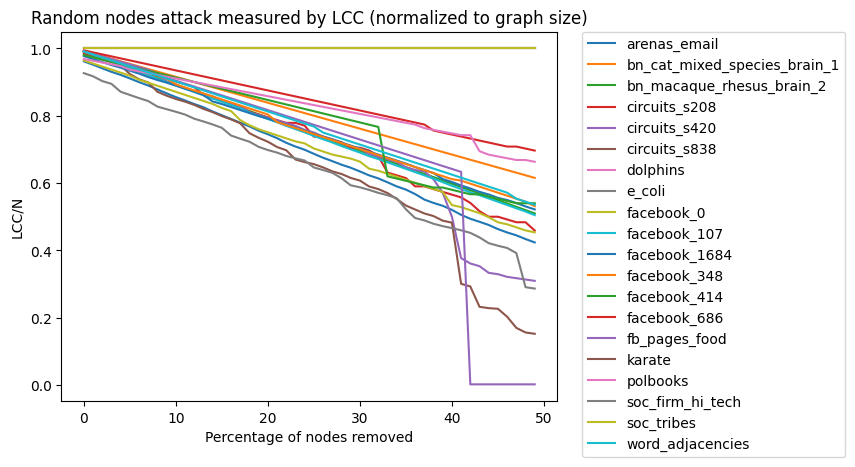

In [16]:
plt.plot(list(random_arenas_email_attack[0].keys()), list(random_arenas_email_attack[0].values()), label='arenas_email')
plt.plot(list(random_bn_cat_mixed_species_brain_1_attack[0].keys()), list(random_bn_cat_mixed_species_brain_1_attack[0].values()), label='bn_cat_mixed_species_brain_1')
plt.plot(list(random_bn_macaque_rhesus_brain_2_attack[0].keys()), list(random_bn_macaque_rhesus_brain_2_attack[0].values()), label='bn_macaque_rhesus_brain_2')
plt.plot(list(random_circuits_s208_attack[0].keys()), list(random_circuits_s208_attack[0].values()), label='circuits_s208')
plt.plot(list(random_circuits_s420_attack[0].keys()), list(random_circuits_s420_attack[0].values()), label='circuits_s420')
plt.plot(list(random_circuits_s838_attack[0].keys()), list(random_circuits_s838_attack[0].values()), label='circuits_s838')
plt.plot(list(random_dolphins_attack[0].keys()), list(random_dolphins_attack[0].values()), label='dolphins')
plt.plot(list(random_e_coli_attack[0].keys()), list(random_e_coli_attack[0].values()), label='e_coli')
plt.plot(list(random_facebook_0_attack[0].keys()), list(random_facebook_0_attack[0].values()), label='facebook_0')
plt.plot(list(random_facebook_107_attack[0].keys()), list(random_facebook_107_attack[0].values()), label='facebook_107')
plt.plot(list(random_facebook_1684_attack[0].keys()), list(random_facebook_1684_attack[0].values()), label='facebook_1684')
plt.plot(list(random_facebook_348_attack[0].keys()), list(random_facebook_348_attack[0].values()), label='facebook_348')
plt.plot(list(random_facebook_414_attack[0].keys()), list(random_facebook_414_attack[0].values()), label='facebook_414')
plt.plot(list(random_facebook_686_attack[0].keys()), list(random_facebook_686_attack[0].values()), label='facebook_686')
plt.plot(list(random_fb_pages_food_attack[0].keys()), list(random_fb_pages_food_attack[0].values()), label='fb_pages_food')
plt.plot(list(random_karate_attack[0].keys()), list(random_karate_attack[0].values()), label='karate')
plt.plot(list(random_polbooks_attack[0].keys()), list(random_polbooks_attack[0].values()), label='polbooks')
plt.plot(list(random_soc_firm_hi_tech_attack[0].keys()), list(random_soc_firm_hi_tech_attack[0].values()), label='soc_firm_hi_tech')
plt.plot(list(random_soc_tribes_attack[0].keys()), list(random_soc_tribes_attack[0].values()), label='soc_tribes')
plt.plot(list(random_word_adjacencies_attack[0].keys()), list(random_word_adjacencies_attack[0].values()), label='word_adjacencies')
# plt.plot(list(random_er_graph_attack[0].keys()), list(random_er_graph_attack[0].values()), label='er_graph')
plt.title("Random nodes attack measured by LCC (normalized to graph size)")
#make the legend seperable
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')
plt.show()

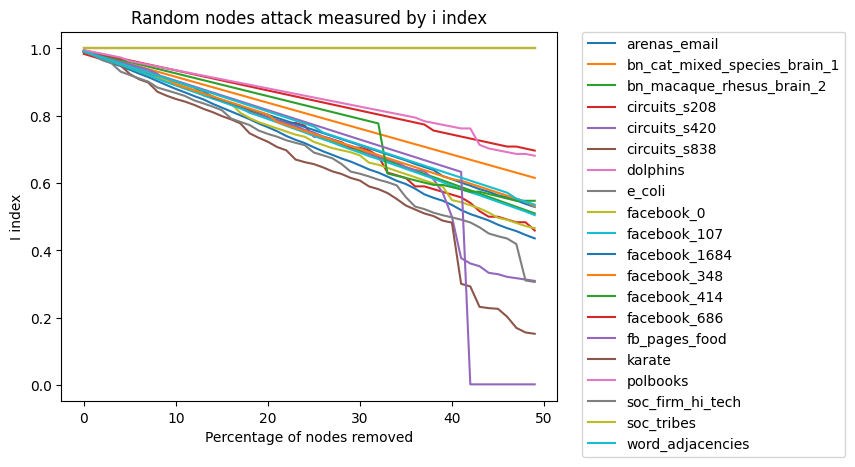

In [17]:
# fig = plt.figure(figsize=(8,8))
plt.plot(list(random_arenas_email_attack[1].keys()), list(random_arenas_email_attack[1].values()), label='arenas_email')
plt.plot(list(random_bn_cat_mixed_species_brain_1_attack[1].keys()), list(random_bn_cat_mixed_species_brain_1_attack[1].values()), label='bn_cat_mixed_species_brain_1')
plt.plot(list(random_bn_macaque_rhesus_brain_2_attack[1].keys()), list(random_bn_macaque_rhesus_brain_2_attack[1].values()), label='bn_macaque_rhesus_brain_2')
plt.plot(list(random_circuits_s208_attack[1].keys()), list(random_circuits_s208_attack[1].values()), label='circuits_s208')
plt.plot(list(random_circuits_s420_attack[1].keys()), list(random_circuits_s420_attack[1].values()), label='circuits_s420')
plt.plot(list(random_circuits_s838_attack[1].keys()), list(random_circuits_s838_attack[1].values()), label='circuits_s838')
plt.plot(list(random_dolphins_attack[1].keys()), list(random_dolphins_attack[1].values()), label='dolphins')
plt.plot(list(random_e_coli_attack[1].keys()), list(random_e_coli_attack[1].values()), label='e_coli')
plt.plot(list(random_facebook_0_attack[1].keys()), list(random_facebook_0_attack[1].values()), label='facebook_0')
plt.plot(list(random_facebook_107_attack[1].keys()), list(random_facebook_107_attack[1].values()), label='facebook_107')
plt.plot(list(random_facebook_1684_attack[1].keys()), list(random_facebook_1684_attack[1].values()), label='facebook_1684')
plt.plot(list(random_facebook_348_attack[1].keys()), list(random_facebook_348_attack[1].values()), label='facebook_348')
plt.plot(list(random_facebook_414_attack[1].keys()), list(random_facebook_414_attack[1].values()), label='facebook_414')
plt.plot(list(random_facebook_686_attack[1].keys()), list(random_facebook_686_attack[1].values()), label='facebook_686')
plt.plot(list(random_fb_pages_food_attack[1].keys()), list(random_fb_pages_food_attack[1].values()), label='fb_pages_food')
plt.plot(list(random_karate_attack[1].keys()), list(random_karate_attack[1].values()), label='karate')
plt.plot(list(random_polbooks_attack[1].keys()), list(random_polbooks_attack[1].values()), label='polbooks')
plt.plot(list(random_soc_firm_hi_tech_attack[1].keys()), list(random_soc_firm_hi_tech_attack[1].values()), label='soc_firm_hi_tech')
plt.plot(list(random_soc_tribes_attack[1].keys()), list(random_soc_tribes_attack[1].values()), label='soc_tribes')
plt.plot(list(random_word_adjacencies_attack[1].keys()), list(random_word_adjacencies_attack[1].values()), label='word_adjacencies')
# plt.plot(list(random_er_graph_attack[1].keys()), list(random_er_graph_attack[1].values()), label='er_graph')




plt.title("Random nodes attack measured by i index")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Percentage of nodes removed')
plt.ylabel('I index')
plt.show()

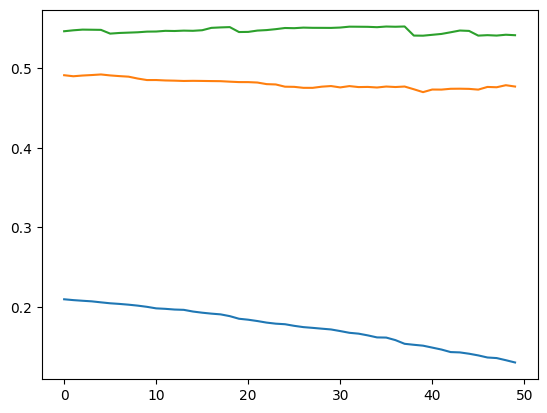

In [18]:
#measured by efficiency
plt.plot(list(random_arenas_email_attack[2].keys()), list(random_arenas_email_attack[2].values()), label='arenas_email')
plt.plot(list(random_bn_cat_mixed_species_brain_1_attack[2].keys()), list(random_bn_cat_mixed_species_brain_1_attack[2].values()), label='bn_cat_mixed_species_brain_1')
plt.plot(list(random_bn_macaque_rhesus_brain_2_attack[2].keys()), list(random_bn_macaque_rhesus_brain_2_attack[2].values()), label='bn_macaque_rhesus_brain_2')


### edge attack

In [19]:


random_arenas_email_attack_edge= random_attack_edge(arenas_email)
random_bn_cat_mixed_species_brain_1_attack_edge= random_attack_edge(bn_cat_mixed_species_brain_1)
random_bn_macaque_rhesus_brain_2_attack_edge= random_attack_edge(bn_macaque_rhesus_brain_2)
random_circuits_s208_attack_edge= random_attack_edge(circuits_s208)
random_circuits_s420_attack_edge= random_attack_edge(circuits_s420)
random_circuits_s838_attack_edge= random_attack_edge(circuits_s838)
random_dolphins_attack_edge= random_attack_edge(dolphins)
random_e_coli_attack_edge= random_attack_edge(e_coli)
random_facebook_0_attack_edge= random_attack_edge(facebook_0)
random_facebook_107_attack_edge= random_attack_edge(facebook_107)
random_facebook_1684_attack_edge= random_attack_edge(facebook_1684)
random_facebook_348_attack_edge= random_attack_edge(facebook_348)
random_facebook_414_attack_edge= random_attack_edge(facebook_414)
random_facebook_686_attack_edge= random_attack_edge(facebook_686)
random_fb_pages_food_attack_edge= random_attack_edge(fb_pages_food)
random_karate_attack_edge= random_attack_edge(karate)
random_polbooks_attack_edge= random_attack_edge(polbooks)
random_soc_firm_hi_tech_attack_edge= random_attack_edge(soc_firm_hi_tech)
random_soc_tribes_attack_edge= random_attack_edge(soc_tribes)
random_word_adjacencies_attack_edge= random_attack_edge(word_adjacencies)
# random_er_graph_attack_edge= random_attack_edge(er_graph)

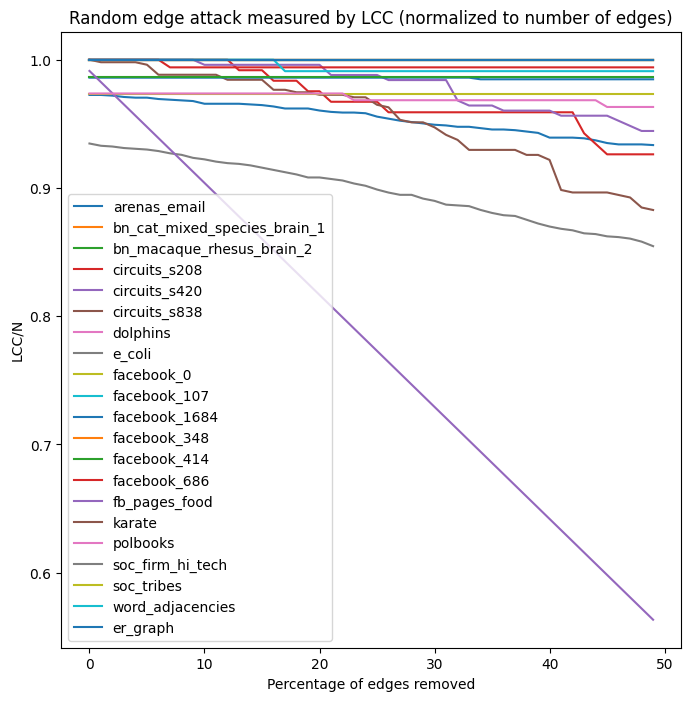

In [20]:
fig = plt.figure(figsize=(8,8))
plt.plot(list(random_arenas_email_attack_edge[0].keys()), list(random_arenas_email_attack_edge[0].values()), label='arenas_email')
plt.plot(list(random_bn_cat_mixed_species_brain_1_attack_edge[0].keys()), list(random_bn_cat_mixed_species_brain_1_attack_edge[0].values()), label='bn_cat_mixed_species_brain_1')
plt.plot(list(random_bn_macaque_rhesus_brain_2_attack_edge[0].keys()), list(random_bn_macaque_rhesus_brain_2_attack_edge[0].values()), label='bn_macaque_rhesus_brain_2')
plt.plot(list(random_circuits_s208_attack_edge[0].keys()), list(random_circuits_s208_attack_edge[0].values()), label='circuits_s208')
plt.plot(list(random_circuits_s420_attack_edge[0].keys()), list(random_circuits_s420_attack_edge[0].values()), label='circuits_s420')
plt.plot(list(random_circuits_s838_attack_edge[0].keys()), list(random_circuits_s838_attack_edge[0].values()), label='circuits_s838')
plt.plot(list(random_dolphins_attack_edge[0].keys()), list(random_dolphins_attack_edge[0].values()), label='dolphins')
plt.plot(list(random_e_coli_attack_edge[0].keys()), list(random_e_coli_attack_edge[0].values()), label='e_coli')
plt.plot(list(random_facebook_0_attack_edge[0].keys()), list(random_facebook_0_attack_edge[0].values()), label='facebook_0')
plt.plot(list(random_facebook_107_attack_edge[0].keys()), list(random_facebook_107_attack_edge[0].values()), label='facebook_107')
plt.plot(list(random_facebook_1684_attack_edge[0].keys()), list(random_facebook_1684_attack_edge[0].values()), label='facebook_1684')
plt.plot(list(random_facebook_348_attack_edge[0].keys()), list(random_facebook_348_attack_edge[0].values()), label='facebook_348')
plt.plot(list(random_facebook_414_attack_edge[0].keys()), list(random_facebook_414_attack_edge[0].values()), label='facebook_414')
plt.plot(list(random_facebook_686_attack_edge[0].keys()), list(random_facebook_686_attack_edge[0].values()), label='facebook_686')
plt.plot(list(random_fb_pages_food_attack_edge[0].keys()), list(random_fb_pages_food_attack_edge[0].values()), label='fb_pages_food')
plt.plot(list(random_karate_attack_edge[0].keys()), list(random_karate_attack_edge[0].values()), label='karate')
plt.plot(list(random_polbooks_attack_edge[0].keys()), list(random_polbooks_attack_edge[0].values()), label='polbooks')
plt.plot(list(random_soc_firm_hi_tech_attack_edge[0].keys()), list(random_soc_firm_hi_tech_attack_edge[0].values()), label='soc_firm_hi_tech')
plt.plot(list(random_soc_tribes_attack_edge[0].keys()), list(random_soc_tribes_attack_edge[0].values()), label='soc_tribes')
plt.plot(list(random_word_adjacencies_attack_edge[0].keys()), list(random_word_adjacencies_attack_edge[0].values()), label='word_adjacencies')
# plt.plot(list(random_er_graph_attack_edge[0].keys()), list(random_er_graph_attack_edge[0].values()), label='er_graph')

plt.title("Random edge attack measured by LCC (normalized to number of edges)")
plt.legend()
plt.xlabel('Percentage of edges removed')
plt.ylabel('LCC/N')
plt.show()

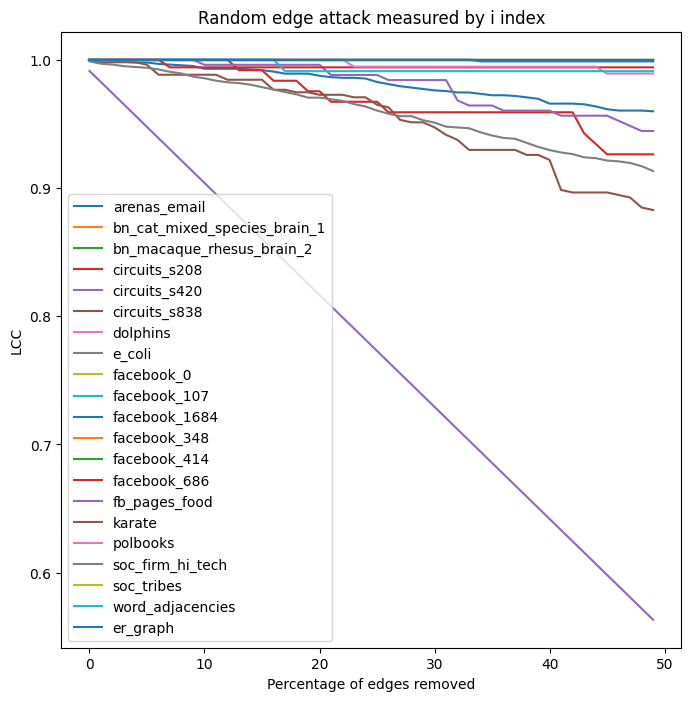

In [21]:
fig = plt.figure(figsize=(8,8))
plt.plot(list(random_arenas_email_attack_edge[1].keys()), list(random_arenas_email_attack_edge[1].values()), label='arenas_email')
plt.plot(list(random_bn_cat_mixed_species_brain_1_attack_edge[1].keys()), list(random_bn_cat_mixed_species_brain_1_attack_edge[1].values()), label='bn_cat_mixed_species_brain_1')
plt.plot(list(random_bn_macaque_rhesus_brain_2_attack_edge[1].keys()), list(random_bn_macaque_rhesus_brain_2_attack_edge[1].values()), label='bn_macaque_rhesus_brain_2')
plt.plot(list(random_circuits_s208_attack_edge[1].keys()), list(random_circuits_s208_attack_edge[1].values()), label='circuits_s208')
plt.plot(list(random_circuits_s420_attack_edge[1].keys()), list(random_circuits_s420_attack_edge[1].values()), label='circuits_s420')
plt.plot(list(random_circuits_s838_attack_edge[1].keys()), list(random_circuits_s838_attack_edge[1].values()), label='circuits_s838')
plt.plot(list(random_dolphins_attack_edge[1].keys()), list(random_dolphins_attack_edge[1].values()), label='dolphins')
plt.plot(list(random_e_coli_attack_edge[1].keys()), list(random_e_coli_attack_edge[1].values()), label='e_coli')
plt.plot(list(random_facebook_0_attack_edge[1].keys()), list(random_facebook_0_attack_edge[1].values()), label='facebook_0')
plt.plot(list(random_facebook_107_attack_edge[1].keys()), list(random_facebook_107_attack_edge[1].values()), label='facebook_107')
plt.plot(list(random_facebook_1684_attack_edge[1].keys()), list(random_facebook_1684_attack_edge[1].values()), label='facebook_1684')
plt.plot(list(random_facebook_348_attack_edge[1].keys()), list(random_facebook_348_attack_edge[1].values()), label='facebook_348')
plt.plot(list(random_facebook_414_attack_edge[1].keys()), list(random_facebook_414_attack_edge[1].values()), label='facebook_414')
plt.plot(list(random_facebook_686_attack_edge[1].keys()), list(random_facebook_686_attack_edge[1].values()), label='facebook_686')
plt.plot(list(random_fb_pages_food_attack_edge[1].keys()), list(random_fb_pages_food_attack_edge[1].values()), label='fb_pages_food')
plt.plot(list(random_karate_attack_edge[1].keys()), list(random_karate_attack_edge[1].values()), label='karate')
plt.plot(list(random_polbooks_attack_edge[1].keys()), list(random_polbooks_attack_edge[1].values()), label='polbooks')
plt.plot(list(random_soc_firm_hi_tech_attack_edge[1].keys()), list(random_soc_firm_hi_tech_attack_edge[1].values()), label='soc_firm_hi_tech')
plt.plot(list(random_soc_tribes_attack_edge[1].keys()), list(random_soc_tribes_attack_edge[1].values()), label='soc_tribes')
plt.plot(list(random_word_adjacencies_attack_edge[1].keys()), list(random_word_adjacencies_attack_edge[1].values()), label='word_adjacencies')
# plt.plot(list(random_er_graph_attack_edge[1].keys()), list(random_er_graph_attack_edge[1].values()), label='er_graph')

plt.title("Random edge attack measured by i index")
plt.legend()
plt.xlabel('Percentage of edges removed')
plt.ylabel('LCC')
plt.show()

## Greedy attack

In [22]:
def attack(g, sorted_nodes):
    G=g.copy()
    fix=G.number_of_nodes()
    batch_size = fix//100
    norm_LCC={}
    LCC={}
    Inter={}
    E={}
    lcc_i = max([len(c) for c in nx.connected_components(G)])

    for i in range(50):
        for j in range(batch_size):
            n = sorted_nodes[i*batch_size+j]
            G.remove_node(n)
        lcc = compute_lcc(G)
        i_index= compute_i(G, lcc_i)
        norm_LCC[i] = lcc/fix
        LCC[i]=lcc
        Inter[i]=i_index
        E[i]=nx.algorithms.global_efficiency(G)
    return norm_LCC, Inter, E, LCC

def greedy_list(g) ->list:
    '''takes a graph and computes a list of node that follows the greedy attack scheme
    Get an initial list of best nodes to attack - network of n nodes, try n times:
        Copy the network in a new test network
        Remove a node from the test
        Assess robustness score after its removal
    Do this for the n nodes, sort them by order of most impactful attacks and emply the sequential 
    '''
    n=g.number_of_nodes()
    nodes=list(g.nodes())
    stat={}
    for i in range(n):
        G=g.copy()
        G.remove_node(nodes[i])
        lcc=compute_lcc(G)
        stat[nodes[i]]=lcc
    #sort the nodes keys in ascending order of their values in the dictionary
    nodes_sorted =  sorted(stat.items(), key=lambda x: x[1], reverse=False) 
    #get only the keys 
    nodes_sorted_list = [x[0] for x in nodes_sorted]
    return nodes_sorted_list

# greedy_list(soc_firm_hi_tech)


arenas_email_greedy_attack = attack(arenas_email,greedy_list(arenas_email))
bn_cat_mixed_species_brain_1_greedy_attack = attack(bn_cat_mixed_species_brain_1,greedy_list(bn_cat_mixed_species_brain_1))
bn_macaque_rhesus_brain_2_greedy_attack = attack(bn_macaque_rhesus_brain_2,greedy_list(bn_macaque_rhesus_brain_2))
circuits_s208_greedy_attack = attack(circuits_s208,greedy_list(circuits_s208))
circuits_s420_greedy_attack = attack(circuits_s420,greedy_list(circuits_s420))
circuits_s838_greedy_attack = attack(circuits_s838,greedy_list(circuits_s838))
dolphins_greedy_attack = attack(dolphins,greedy_list(dolphins))
e_coli_greedy_attack = attack(e_coli,greedy_list(e_coli))
facebook_0_greedy_attack = attack(facebook_0,greedy_list(facebook_0))
facebook_107_greedy_attack = attack(facebook_107,greedy_list(facebook_107))
facebook_1684_greedy_attack = attack(facebook_1684,greedy_list(facebook_1684))
facebook_348_greedy_attack = attack(facebook_348,greedy_list(facebook_348))
facebook_414_greedy_attack = attack(facebook_414,greedy_list(facebook_414))
facebook_686_greedy_attack = attack(facebook_686,greedy_list(facebook_686))
fb_pages_food_greedy_attack = attack(fb_pages_food,greedy_list(fb_pages_food))
karate_greedy_attack = attack(karate,greedy_list(karate))
polbooks_greedy_attack = attack(polbooks,greedy_list(polbooks))
soc_firm_hi_tech_greedy_attack = attack(soc_firm_hi_tech,greedy_list(soc_firm_hi_tech))
soc_tribes_greedy_attack = attack(soc_tribes,greedy_list(soc_tribes))
word_adjacencies_greedy_attack = attack(word_adjacencies,greedy_list(word_adjacencies))
# er_graph_greedy_attack = attack(er_graph,greedy_list(er_graph))

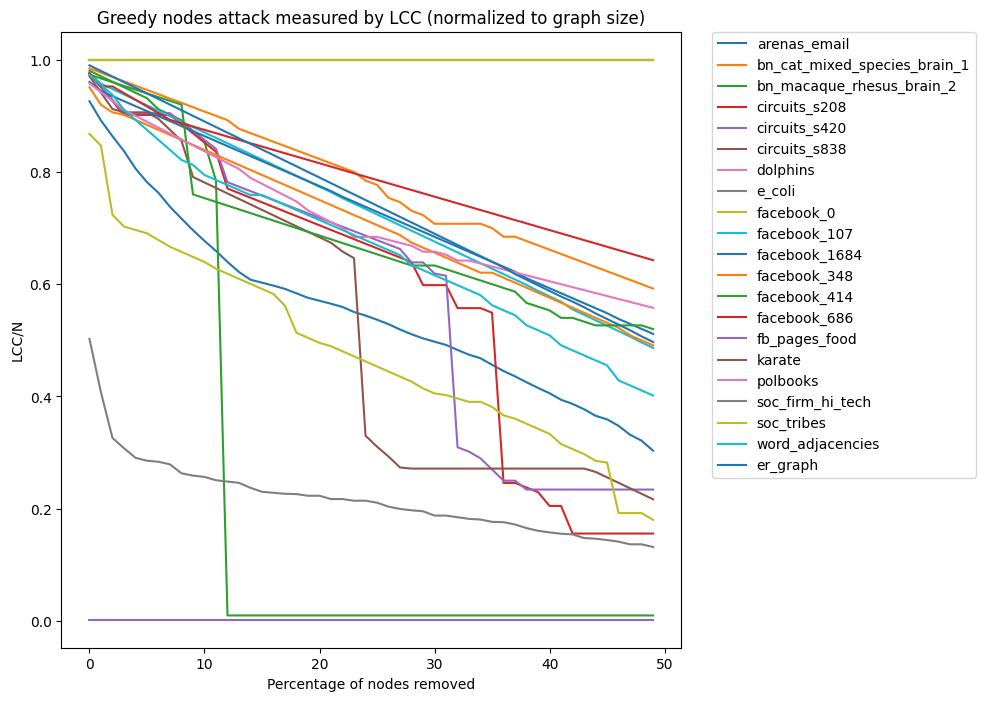

In [63]:
#plot the greedy attack
fig = plt.figure(figsize=(8,8))
plt.plot(list(arenas_email_greedy_attack[0].keys()), list(arenas_email_greedy_attack[0].values()), label='arenas_email')
plt.plot(list(bn_cat_mixed_species_brain_1_greedy_attack[0].keys()), list(bn_cat_mixed_species_brain_1_greedy_attack[0].values()), label='bn_cat_mixed_species_brain_1')
plt.plot(list(bn_macaque_rhesus_brain_2_greedy_attack[0].keys()), list(bn_macaque_rhesus_brain_2_greedy_attack[0].values()), label='bn_macaque_rhesus_brain_2')
plt.plot(list(circuits_s208_greedy_attack[0].keys()), list(circuits_s208_greedy_attack[0].values()), label='circuits_s208')
plt.plot(list(circuits_s420_greedy_attack[0].keys()), list(circuits_s420_greedy_attack[0].values()), label='circuits_s420')
plt.plot(list(circuits_s838_greedy_attack[0].keys()), list(circuits_s838_greedy_attack[0].values()), label='circuits_s838')
plt.plot(list(dolphins_greedy_attack[0].keys()), list(dolphins_greedy_attack[0].values()), label='dolphins')
plt.plot(list(e_coli_greedy_attack[0].keys()), list(e_coli_greedy_attack[0].values()), label='e_coli')
plt.plot(list(facebook_0_greedy_attack[0].keys()), list(facebook_0_greedy_attack[0].values()), label='facebook_0')
plt.plot(list(facebook_107_greedy_attack[0].keys()), list(facebook_107_greedy_attack[0].values()), label='facebook_107')
plt.plot(list(facebook_1684_greedy_attack[0].keys()), list(facebook_1684_greedy_attack[0].values()), label='facebook_1684')
plt.plot(list(facebook_348_greedy_attack[0].keys()), list(facebook_348_greedy_attack[0].values()), label='facebook_348')
plt.plot(list(facebook_414_greedy_attack[0].keys()), list(facebook_414_greedy_attack[0].values()), label='facebook_414')
plt.plot(list(facebook_686_greedy_attack[0].keys()), list(facebook_686_greedy_attack[0].values()), label='facebook_686')
plt.plot(list(fb_pages_food_greedy_attack[0].keys()), list(fb_pages_food_greedy_attack[0].values()), label='fb_pages_food')
plt.plot(list(karate_greedy_attack[0].keys()), list(karate_greedy_attack[0].values()), label='karate')
plt.plot(list(polbooks_greedy_attack[0].keys()), list(polbooks_greedy_attack[0].values()), label='polbooks')
plt.plot(list(soc_firm_hi_tech_greedy_attack[0].keys()), list(soc_firm_hi_tech_greedy_attack[0].values()), label='soc_firm_hi_tech')
plt.plot(list(soc_tribes_greedy_attack[0].keys()), list(soc_tribes_greedy_attack[0].values()), label='soc_tribes')
plt.plot(list(word_adjacencies_greedy_attack[0].keys()), list(word_adjacencies_greedy_attack[0].values()), label='word_adjacencies')
# plt.plot(list(er_graph_greedy_attack[0].keys()), list(er_graph_greedy_attack[0].values()), label='er_graph')

plt.title("Greedy nodes attack measured by LCC (normalized to graph size)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')
plt.show()


In [69]:
compute_r(arenas_email, greedy_list(arenas_email))

588.6508188061279

# Targeted attacks

These are kernels that attack based on centralities sorted

## networkx centralities

This involves computing sorted lists of betweenness, closeness, degree for each graph

### getting the lists

In [24]:
betweenness_centrality_sorted_arenas_email = sorted(nx.betweenness_centrality(arenas_email).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_bn_cat_mixed_species_brain_1 = sorted(nx.betweenness_centrality(bn_cat_mixed_species_brain_1).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_bn_macaque_rhesus_brain_2 = sorted(nx.betweenness_centrality(bn_macaque_rhesus_brain_2).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_circuits_s208 = sorted(nx.betweenness_centrality(circuits_s208).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_circuits_s420 = sorted(nx.betweenness_centrality(circuits_s420).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_circuits_s838 = sorted(nx.betweenness_centrality(circuits_s838).items(), key=lambda x: x[1], reverse=True) 
betweenness_centrality_sorted_dolphins = sorted(nx.betweenness_centrality(dolphins).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_e_coli = sorted(nx.betweenness_centrality(e_coli).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_facebook_0 = sorted(nx.betweenness_centrality(facebook_0).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_facebook_107 = sorted(nx.betweenness_centrality(facebook_107).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_facebook_1684 = sorted(nx.betweenness_centrality(facebook_1684).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_facebook_348 = sorted(nx.betweenness_centrality(facebook_348).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_facebook_414 = sorted(nx.betweenness_centrality(facebook_414).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_facebook_686 = sorted(nx.betweenness_centrality(facebook_686).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_fb_pages_food = sorted(nx.betweenness_centrality(fb_pages_food).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_karate = sorted(nx.betweenness_centrality(karate).items(), key=lambda x: x[1], reverse=True)   
betweenness_centrality_sorted_polbooks = sorted(nx.betweenness_centrality(polbooks).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_soc_firm_hi_tech = sorted(nx.betweenness_centrality(soc_firm_hi_tech).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_soc_tribes = sorted(nx.betweenness_centrality(soc_tribes).items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted_word_adjacencies = sorted(nx.betweenness_centrality(word_adjacencies).items(), key=lambda x: x[1], reverse=True)
# betweenness_centrality_sorted_er_graph = sorted(nx.betweenness_centrality(er_graph).items(), key=lambda x: x[1], reverse=True)

closeness_centrality_sorted_arenas_email = sorted(nx.closeness_centrality(arenas_email).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_bn_cat_mixed_species_brain_1 = sorted(nx.closeness_centrality(bn_cat_mixed_species_brain_1).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_bn_macaque_rhesus_brain_2 = sorted(nx.closeness_centrality(bn_macaque_rhesus_brain_2).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_circuits_s208 = sorted(nx.closeness_centrality(circuits_s208).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_circuits_s420 = sorted(nx.closeness_centrality(circuits_s420).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_circuits_s838 = sorted(nx.closeness_centrality(circuits_s838).items(), key=lambda x: x[1], reverse=True) 
closeness_centrality_sorted_dolphins = sorted(nx.closeness_centrality(dolphins).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_e_coli = sorted(nx.closeness_centrality(e_coli).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_facebook_0 = sorted(nx.closeness_centrality(facebook_0).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_facebook_107 = sorted(nx.closeness_centrality(facebook_107).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_facebook_1684 = sorted(nx.closeness_centrality(facebook_1684).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_facebook_348 = sorted(nx.closeness_centrality(facebook_348).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_facebook_414 = sorted(nx.closeness_centrality(facebook_414).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_facebook_686 = sorted(nx.closeness_centrality(facebook_686).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_fb_pages_food = sorted(nx.closeness_centrality(fb_pages_food).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_karate = sorted(nx.closeness_centrality(karate).items(), key=lambda x: x[1], reverse=True)   
closeness_centrality_sorted_polbooks = sorted(nx.closeness_centrality(polbooks).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_soc_firm_hi_tech = sorted(nx.closeness_centrality(soc_firm_hi_tech).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_soc_tribes = sorted(nx.closeness_centrality(soc_tribes).items(), key=lambda x: x[1], reverse=True)
closeness_centrality_sorted_word_adjacencies = sorted(nx.closeness_centrality(word_adjacencies).items(), key=lambda x: x[1], reverse=True)
# closeness_centrality_sorted_er_graph = sorted(nx.closeness_centrality(er_graph).items(), key=lambda x: x[1], reverse=True)

degree_centrality_sorted_arenas_email = sorted(nx.degree_centrality(arenas_email).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_bn_cat_mixed_species_brain_1 = sorted(nx.degree_centrality(bn_cat_mixed_species_brain_1).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_bn_macaque_rhesus_brain_2 = sorted(nx.degree_centrality(bn_macaque_rhesus_brain_2).items(), key=lambda x: x[1], reverse=True) 
degree_centrality_sorted_circuits_s208 = sorted(nx.degree_centrality(circuits_s208).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_circuits_s420 = sorted(nx.degree_centrality(circuits_s420).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_circuits_s838 = sorted(nx.degree_centrality(circuits_s838).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_dolphins = sorted(nx.degree_centrality(dolphins).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_e_coli = sorted(nx.degree_centrality(e_coli).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_facebook_0 = sorted(nx.degree_centrality(facebook_0).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_facebook_107 = sorted(nx.degree_centrality(facebook_107).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_facebook_1684 = sorted(nx.degree_centrality(facebook_1684).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_facebook_348 = sorted(nx.degree_centrality(facebook_348).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_facebook_414 = sorted(nx.degree_centrality(facebook_414).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_facebook_686 = sorted(nx.degree_centrality(facebook_686).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_fb_pages_food = sorted(nx.degree_centrality(fb_pages_food).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_karate = sorted(nx.degree_centrality(karate).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_polbooks = sorted(nx.degree_centrality(polbooks).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_soc_firm_hi_tech = sorted(nx.degree_centrality(soc_firm_hi_tech).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_soc_tribes = sorted(nx.degree_centrality(soc_tribes).items(), key=lambda x: x[1], reverse=True)
degree_centrality_sorted_word_adjacencies = sorted(nx.degree_centrality(word_adjacencies).items(), key=lambda x: x[1], reverse=True)
# degree_centrality_sorted_er_graph = sorted(nx.degree_centrality(er_graph).items(), key=lambda x: x[1], reverse=True)



bet_attack_arenas_email = attack(arenas_email, [x[0] for x in betweenness_centrality_sorted_arenas_email])
bet_attack_bn_cat_mixed_species_brain_1 = attack(bn_cat_mixed_species_brain_1, [x[0] for x in betweenness_centrality_sorted_bn_cat_mixed_species_brain_1])
bet_attack_bn_macaque_rhesus_brain_2 = attack(bn_macaque_rhesus_brain_2, [x[0] for x in betweenness_centrality_sorted_bn_macaque_rhesus_brain_2])
bet_attack_circuits_s208 = attack(circuits_s208, [x[0] for x in betweenness_centrality_sorted_circuits_s208])
bet_attack_circuits_s420 = attack(circuits_s420, [x[0] for x in betweenness_centrality_sorted_circuits_s420])
bet_attack_circuits_s838 = attack(circuits_s838, [x[0] for x in betweenness_centrality_sorted_circuits_s838])
bet_attack_dolphins = attack(dolphins, [x[0] for x in betweenness_centrality_sorted_dolphins])
bet_attack_e_coli = attack(e_coli, [x[0] for x in betweenness_centrality_sorted_e_coli])
bet_attack_facebook_0 = attack(facebook_0, [x[0] for x in betweenness_centrality_sorted_facebook_0])
bet_attack_facebook_107 = attack(facebook_107, [x[0] for x in betweenness_centrality_sorted_facebook_107])
bet_attack_facebook_1684 = attack(facebook_1684, [x[0] for x in betweenness_centrality_sorted_facebook_1684])
bet_attack_facebook_348 = attack(facebook_348, [x[0] for x in betweenness_centrality_sorted_facebook_348])
bet_attack_facebook_414 = attack(facebook_414, [x[0] for x in betweenness_centrality_sorted_facebook_414])
bet_attack_facebook_686 = attack(facebook_686, [x[0] for x in betweenness_centrality_sorted_facebook_686])
bet_attack_fb_pages_food = attack(fb_pages_food, [x[0] for x in betweenness_centrality_sorted_fb_pages_food])
bet_attack_karate = attack(karate, [x[0] for x in betweenness_centrality_sorted_karate])
bet_attack_polbooks = attack(polbooks, [x[0] for x in betweenness_centrality_sorted_polbooks])
bet_attack_soc_firm_hi_tech = attack(soc_firm_hi_tech, [x[0] for x in betweenness_centrality_sorted_soc_firm_hi_tech])
bet_attack_soc_tribes = attack(soc_tribes, [x[0] for x in betweenness_centrality_sorted_soc_tribes])
bet_attack_word_adjacencies = attack(word_adjacencies, [x[0] for x in betweenness_centrality_sorted_word_adjacencies])
# bet_attack_er_graph = attack(er_graph, [x[0] for x in betweenness_centrality_sorted_er_graph])

clos_attack_arenas_email = attack(arenas_email, [x[0] for x in closeness_centrality_sorted_arenas_email])
clos_attack_bn_cat_mixed_species_brain_1 = attack(bn_cat_mixed_species_brain_1, [x[0] for x in closeness_centrality_sorted_bn_cat_mixed_species_brain_1])
clos_attack_bn_macaque_rhesus_brain_2 = attack(bn_macaque_rhesus_brain_2, [x[0] for x in closeness_centrality_sorted_bn_macaque_rhesus_brain_2])
clos_attack_circuits_s208 = attack(circuits_s208, [x[0] for x in closeness_centrality_sorted_circuits_s208])
clos_attack_circuits_s420 = attack(circuits_s420, [x[0] for x in closeness_centrality_sorted_circuits_s420])
clos_attack_circuits_s838 = attack(circuits_s838, [x[0] for x in closeness_centrality_sorted_circuits_s838])
clos_attack_dolphins = attack(dolphins, [x[0] for x in closeness_centrality_sorted_dolphins])
clos_attack_e_coli = attack(e_coli, [x[0] for x in closeness_centrality_sorted_e_coli])
clos_attack_facebook_0 = attack(facebook_0, [x[0] for x in closeness_centrality_sorted_facebook_0])
clos_attack_facebook_107 = attack(facebook_107, [x[0] for x in closeness_centrality_sorted_facebook_107])
clos_attack_facebook_1684 = attack(facebook_1684, [x[0] for x in closeness_centrality_sorted_facebook_1684])
clos_attack_facebook_348 = attack(facebook_348, [x[0] for x in closeness_centrality_sorted_facebook_348])
clos_attack_facebook_414 = attack(facebook_414, [x[0] for x in closeness_centrality_sorted_facebook_414])
clos_attack_facebook_686 = attack(facebook_686, [x[0] for x in closeness_centrality_sorted_facebook_686])
clos_attack_fb_pages_food = attack(fb_pages_food, [x[0] for x in closeness_centrality_sorted_fb_pages_food])
clos_attack_karate = attack(karate, [x[0] for x in closeness_centrality_sorted_karate])
clos_attack_polbooks = attack(polbooks, [x[0] for x in closeness_centrality_sorted_polbooks])
clos_attack_soc_firm_hi_tech = attack(soc_firm_hi_tech, [x[0] for x in closeness_centrality_sorted_soc_firm_hi_tech])
clos_attack_soc_tribes = attack(soc_tribes, [x[0] for x in closeness_centrality_sorted_soc_tribes])
clos_attack_word_adjacencies = attack(word_adjacencies, [x[0] for x in closeness_centrality_sorted_word_adjacencies])
# clos_attack_er_graph = attack(er_graph, [x[0] for x in closeness_centrality_sorted_er_graph])

deg_attack_arenas_email = attack(arenas_email, [x[0] for x in degree_centrality_sorted_arenas_email])
deg_attack_bn_cat_mixed_species_brain_1 = attack(bn_cat_mixed_species_brain_1, [x[0] for x in degree_centrality_sorted_bn_cat_mixed_species_brain_1])
deg_attack_bn_macaque_rhesus_brain_2 = attack(bn_macaque_rhesus_brain_2, [x[0] for x in degree_centrality_sorted_bn_macaque_rhesus_brain_2])
deg_attack_circuits_s208 = attack(circuits_s208, [x[0] for x in degree_centrality_sorted_circuits_s208])
deg_attack_circuits_s420 = attack(circuits_s420, [x[0] for x in degree_centrality_sorted_circuits_s420])
deg_attack_circuits_s838 = attack(circuits_s838, [x[0] for x in degree_centrality_sorted_circuits_s838])
deg_attack_dolphins = attack(dolphins, [x[0] for x in degree_centrality_sorted_dolphins])
deg_attack_e_coli = attack(e_coli, [x[0] for x in degree_centrality_sorted_e_coli])
deg_attack_facebook_0 = attack(facebook_0, [x[0] for x in degree_centrality_sorted_facebook_0])
deg_attack_facebook_107 = attack(facebook_107, [x[0] for x in degree_centrality_sorted_facebook_107])
deg_attack_facebook_1684 = attack(facebook_1684, [x[0] for x in degree_centrality_sorted_facebook_1684])
deg_attack_facebook_348 = attack(facebook_348, [x[0] for x in degree_centrality_sorted_facebook_348])
deg_attack_facebook_414 = attack(facebook_414, [x[0] for x in degree_centrality_sorted_facebook_414])
deg_attack_facebook_686 = attack(facebook_686, [x[0] for x in degree_centrality_sorted_facebook_686])
deg_attack_fb_pages_food = attack(fb_pages_food, [x[0] for x in degree_centrality_sorted_fb_pages_food])
deg_attack_karate = attack(karate, [x[0] for x in degree_centrality_sorted_karate])
deg_attack_polbooks = attack(polbooks, [x[0] for x in degree_centrality_sorted_polbooks])
deg_attack_soc_firm_hi_tech = attack(soc_firm_hi_tech, [x[0] for x in degree_centrality_sorted_soc_firm_hi_tech])
deg_attack_soc_tribes = attack(soc_tribes, [x[0] for x in degree_centrality_sorted_soc_tribes])
deg_attack_word_adjacencies = attack(word_adjacencies, [x[0] for x in degree_centrality_sorted_word_adjacencies])
# deg_attack_er_graph = attack(er_graph, [x[0] for x in degree_centrality_sorted_er_graph])


### plotting

Text(0, 0.5, 'LCC')

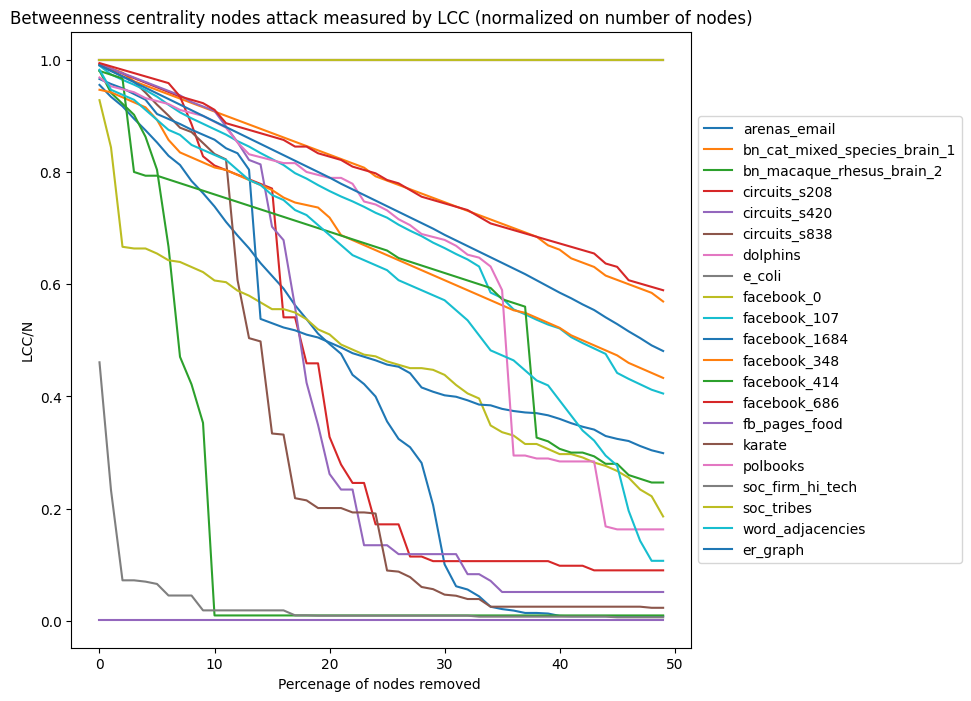

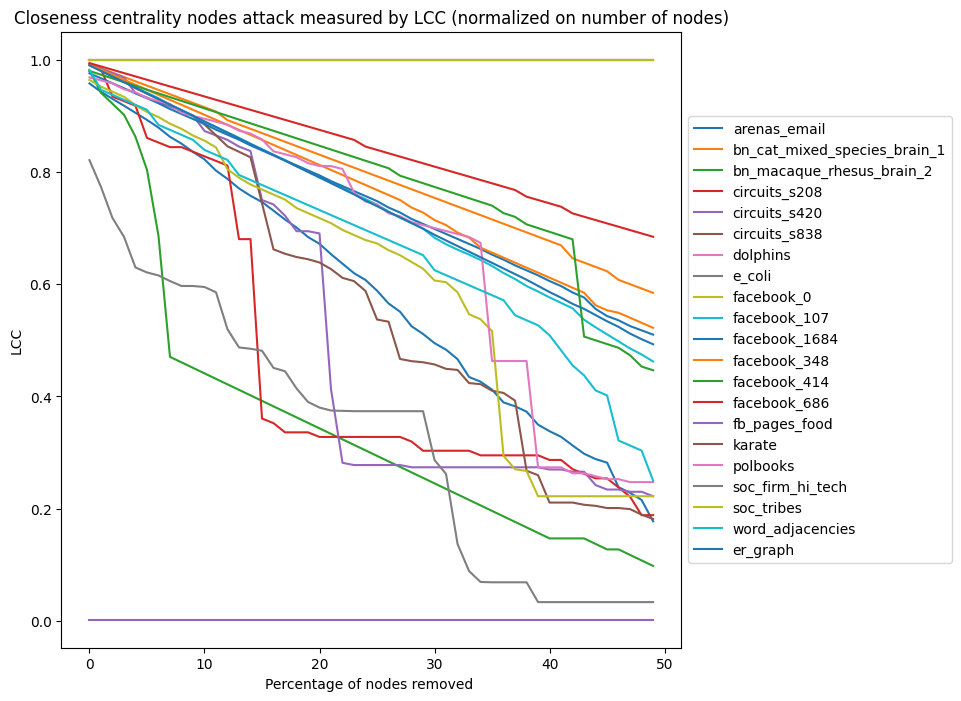

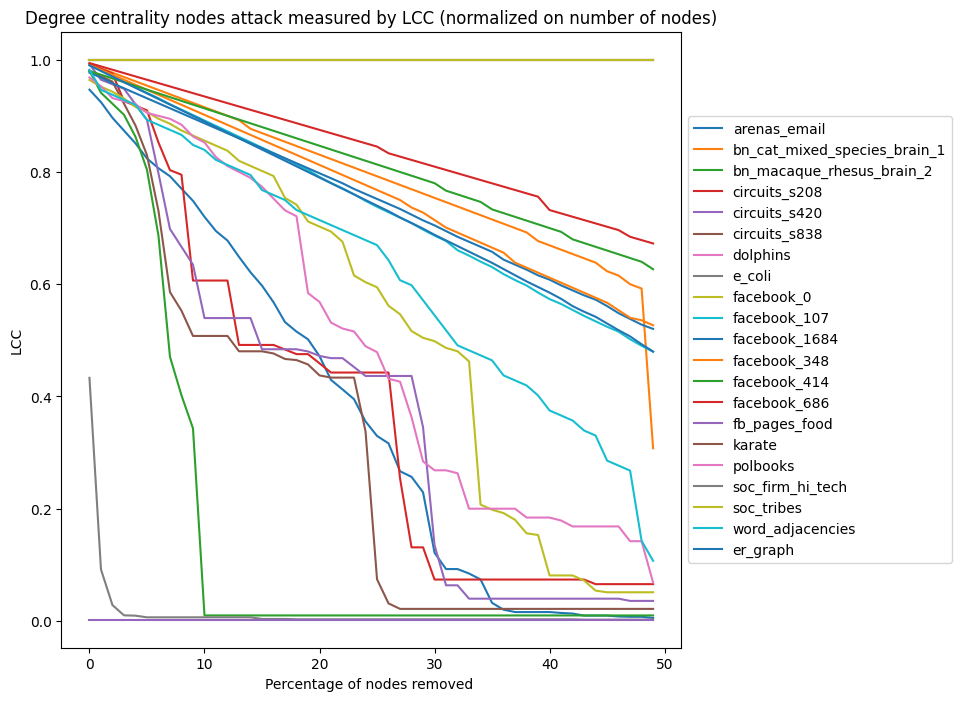

In [25]:
#plotting betweeness centrality attack
fig = plt.figure(figsize=(8,8))
plt.plot(list(bet_attack_arenas_email[0].keys()), list(bet_attack_arenas_email[0].values()), label='arenas_email')
plt.plot(list(bet_attack_bn_cat_mixed_species_brain_1[0].keys()), list(bet_attack_bn_cat_mixed_species_brain_1[0].values()), label='bn_cat_mixed_species_brain_1')
plt.plot(list(bet_attack_bn_macaque_rhesus_brain_2[0].keys()), list(bet_attack_bn_macaque_rhesus_brain_2[0].values()), label='bn_macaque_rhesus_brain_2')
plt.plot(list(bet_attack_circuits_s208[0].keys()), list(bet_attack_circuits_s208[0].values()), label='circuits_s208')
plt.plot(list(bet_attack_circuits_s420[0].keys()), list(bet_attack_circuits_s420[0].values()), label='circuits_s420')
plt.plot(list(bet_attack_circuits_s838[0].keys()), list(bet_attack_circuits_s838[0].values()), label='circuits_s838')
plt.plot(list(bet_attack_dolphins[0].keys()), list(bet_attack_dolphins[0].values()), label='dolphins')
plt.plot(list(bet_attack_e_coli[0].keys()), list(bet_attack_e_coli[0].values()), label='e_coli')
plt.plot(list(bet_attack_facebook_0[0].keys()), list(bet_attack_facebook_0[0].values()), label='facebook_0')
plt.plot(list(bet_attack_facebook_107[0].keys()), list(bet_attack_facebook_107[0].values()), label='facebook_107')
plt.plot(list(bet_attack_facebook_1684[0].keys()), list(bet_attack_facebook_1684[0].values()), label='facebook_1684')
plt.plot(list(bet_attack_facebook_348[0].keys()), list(bet_attack_facebook_348[0].values()), label='facebook_348')
plt.plot(list(bet_attack_facebook_414[0].keys()), list(bet_attack_facebook_414[0].values()), label='facebook_414')
plt.plot(list(bet_attack_facebook_686[0].keys()), list(bet_attack_facebook_686[0].values()), label='facebook_686')
plt.plot(list(bet_attack_fb_pages_food[0].keys()), list(bet_attack_fb_pages_food[0].values()), label='fb_pages_food')
plt.plot(list(bet_attack_karate[0].keys()), list(bet_attack_karate[0].values()), label='karate')
plt.plot(list(bet_attack_polbooks[0].keys()), list(bet_attack_polbooks[0].values()), label='polbooks')
plt.plot(list(bet_attack_soc_firm_hi_tech[0].keys()), list(bet_attack_soc_firm_hi_tech[0].values()), label='soc_firm_hi_tech')
plt.plot(list(bet_attack_soc_tribes[0].keys()), list(bet_attack_soc_tribes[0].values()), label='soc_tribes')
plt.plot(list(bet_attack_word_adjacencies[0].keys()), list(bet_attack_word_adjacencies[0].values()), label='word_adjacencies')
plt.plot(list(bet_attack_er_graph[0].keys()), list(bet_attack_er_graph[0].values()), label='er_graph')
plt.title("Betweenness centrality nodes attack measured by LCC (normalized on number of nodes)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Percenage of nodes removed ')
plt.ylabel('LCC/N')

#same for closeess centrality
fig = plt.figure(figsize=(8,8))
plt.plot(list(clos_attack_arenas_email[0].keys()), list(clos_attack_arenas_email[0].values()), label='arenas_email')
plt.plot(list(clos_attack_bn_cat_mixed_species_brain_1[0].keys()), list(clos_attack_bn_cat_mixed_species_brain_1[0].values()), label='bn_cat_mixed_species_brain_1')
plt.plot(list(clos_attack_bn_macaque_rhesus_brain_2[0].keys()), list(clos_attack_bn_macaque_rhesus_brain_2[0].values()), label='bn_macaque_rhesus_brain_2')
plt.plot(list(clos_attack_circuits_s208[0].keys()), list(clos_attack_circuits_s208[0].values()), label='circuits_s208')
plt.plot(list(clos_attack_circuits_s420[0].keys()), list(clos_attack_circuits_s420[0].values()), label='circuits_s420')
plt.plot(list(clos_attack_circuits_s838[0].keys()), list(clos_attack_circuits_s838[0].values()), label='circuits_s838')
plt.plot(list(clos_attack_dolphins[0].keys()), list(clos_attack_dolphins[0].values()), label='dolphins')
plt.plot(list(clos_attack_e_coli[0].keys()), list(clos_attack_e_coli[0].values()), label='e_coli')
plt.plot(list(clos_attack_facebook_0[0].keys()), list(clos_attack_facebook_0[0].values()), label='facebook_0')
plt.plot(list(clos_attack_facebook_107[0].keys()), list(clos_attack_facebook_107[0].values()), label='facebook_107')
plt.plot(list(clos_attack_facebook_1684[0].keys()), list(clos_attack_facebook_1684[0].values()), label='facebook_1684')
plt.plot(list(clos_attack_facebook_348[0].keys()), list(clos_attack_facebook_348[0].values()), label='facebook_348')
plt.plot(list(clos_attack_facebook_414[0].keys()), list(clos_attack_facebook_414[0].values()), label='facebook_414')
plt.plot(list(clos_attack_facebook_686[0].keys()), list(clos_attack_facebook_686[0].values()), label='facebook_686')
plt.plot(list(clos_attack_fb_pages_food[0].keys()), list(clos_attack_fb_pages_food[0].values()), label='fb_pages_food')
plt.plot(list(clos_attack_karate[0].keys()), list(clos_attack_karate[0].values()), label='karate')
plt.plot(list(clos_attack_polbooks[0].keys()), list(clos_attack_polbooks[0].values()), label='polbooks')
plt.plot(list(clos_attack_soc_firm_hi_tech[0].keys()), list(clos_attack_soc_firm_hi_tech[0].values()), label='soc_firm_hi_tech')
plt.plot(list(clos_attack_soc_tribes[0].keys()), list(clos_attack_soc_tribes[0].values()), label='soc_tribes')
plt.plot(list(clos_attack_word_adjacencies[0].keys()), list(clos_attack_word_adjacencies[0].values()), label='word_adjacencies')
plt.plot(list(clos_attack_er_graph[0].keys()), list(clos_attack_er_graph[0].values()), label='er_graph')
plt.title("Closeness centrality nodes attack measured by LCC (normalized on number of nodes)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Percentage of nodes removed ')  
plt.ylabel('LCC')

#same for degree centrality
fig = plt.figure(figsize=(8,8))
plt.plot(list(deg_attack_arenas_email[0].keys()), list(deg_attack_arenas_email[0].values()), label='arenas_email')
plt.plot(list(deg_attack_bn_cat_mixed_species_brain_1[0].keys()), list(deg_attack_bn_cat_mixed_species_brain_1[0].values()), label='bn_cat_mixed_species_brain_1')
plt.plot(list(deg_attack_bn_macaque_rhesus_brain_2[0].keys()), list(deg_attack_bn_macaque_rhesus_brain_2[0].values()), label='bn_macaque_rhesus_brain_2')
plt.plot(list(deg_attack_circuits_s208[0].keys()), list(deg_attack_circuits_s208[0].values()), label='circuits_s208')
plt.plot(list(deg_attack_circuits_s420[0].keys()), list(deg_attack_circuits_s420[0].values()), label='circuits_s420')
plt.plot(list(deg_attack_circuits_s838[0].keys()), list(deg_attack_circuits_s838[0].values()), label='circuits_s838')
plt.plot(list(deg_attack_dolphins[0].keys()), list(deg_attack_dolphins[0].values()), label='dolphins')
plt.plot(list(deg_attack_e_coli[0].keys()), list(deg_attack_e_coli[0].values()), label='e_coli')
plt.plot(list(deg_attack_facebook_0[0].keys()), list(deg_attack_facebook_0[0].values()), label='facebook_0')
plt.plot(list(deg_attack_facebook_107[0].keys()), list(deg_attack_facebook_107[0].values()), label='facebook_107')
plt.plot(list(deg_attack_facebook_1684[0].keys()), list(deg_attack_facebook_1684[0].values()), label='facebook_1684')
plt.plot(list(deg_attack_facebook_348[0].keys()), list(deg_attack_facebook_348[0].values()), label='facebook_348')
plt.plot(list(deg_attack_facebook_414[0].keys()), list(deg_attack_facebook_414[0].values()), label='facebook_414')
plt.plot(list(deg_attack_facebook_686[0].keys()), list(deg_attack_facebook_686[0].values()), label='facebook_686')
plt.plot(list(deg_attack_fb_pages_food[0].keys()), list(deg_attack_fb_pages_food[0].values()), label='fb_pages_food')
plt.plot(list(deg_attack_karate[0].keys()), list(deg_attack_karate[0].values()), label='karate')
plt.plot(list(deg_attack_polbooks[0].keys()), list(deg_attack_polbooks[0].values()), label='polbooks')
plt.plot(list(deg_attack_soc_firm_hi_tech[0].keys()), list(deg_attack_soc_firm_hi_tech[0].values()), label='soc_firm_hi_tech')
plt.plot(list(deg_attack_soc_tribes[0].keys()), list(deg_attack_soc_tribes[0].values()), label='soc_tribes')
plt.plot(list(deg_attack_word_adjacencies[0].keys()), list(deg_attack_word_adjacencies[0].values()), label='word_adjacencies')
# plt.plot(list(deg_attack_er_graph[0].keys()), list(deg_attack_er_graph[0].values()), label='er_graph')
plt.title("Degree centrality nodes attack measured by LCC (normalized on number of nodes)")
#put legend on the side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Percentage of nodes removed ')
plt.ylabel('LCC')


now putting 2 centralities next to each other

Text(0, 0.5, 'LCC/N')

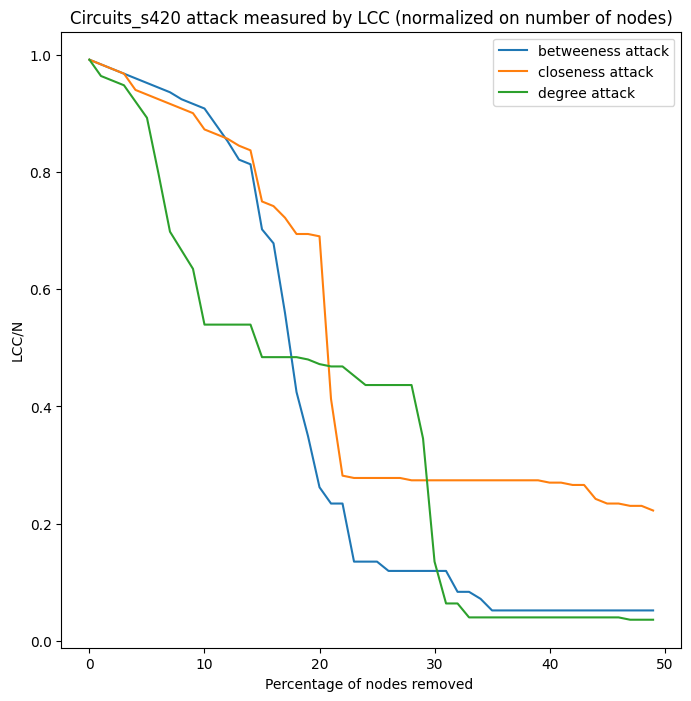

In [26]:
#circuits_s420 showed to be vulnerable
fig = plt.figure(figsize=(8,8))
plt.plot(list(bet_attack_circuits_s420[0].keys()), list(bet_attack_circuits_s420[0].values()), label='betweeness attack')
plt.plot(list(clos_attack_circuits_s420[0].keys()), list(clos_attack_circuits_s420[0].values()), label='closeness attack')
plt.plot(list(deg_attack_circuits_s420[0].keys()), list(deg_attack_circuits_s420[0].values()), label='degree attack')

plt.title("Circuits_s420 attack measured by LCC (normalized on number of nodes)")
plt.legend()
plt.xlabel('Percentage of nodes removed ')
plt.ylabel('LCC/N')

Text(0, 0.5, 'LCC/N')

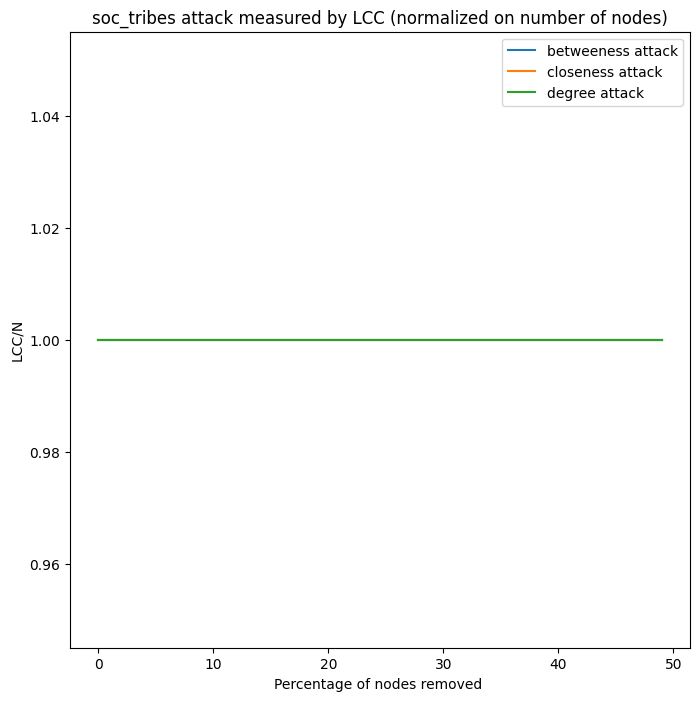

In [27]:
#do the same for soc_tribes
fig = plt.figure(figsize=(8,8))
plt.plot(list(bet_attack_soc_tribes[0].keys()), list(bet_attack_soc_tribes[0].values()), label='betweeness attack')
plt.plot(list(clos_attack_soc_tribes[0].keys()), list(clos_attack_soc_tribes[0].values()), label='closeness attack')
plt.plot(list(deg_attack_soc_tribes[0].keys()), list(deg_attack_soc_tribes[0].values()), label='degree attack')

plt.title("soc_tribes attack measured by LCC (normalized on number of nodes)")
plt.legend()
plt.xlabel('Percentage of nodes removed ')
plt.ylabel('LCC/N')

very robust to targeted attaks (probably put random next to it and analyze)

The LCC/N stayed 1 after 50% of nodes have been removed, this means that the graph is very robust to targeted attacks - largest component is till connected and still represents the whole graph

## complex contagion

This involves complex centrality and percolation

### extraction

In [28]:
arenas_email_complex_df = pd.read_csv('../results/resultsarenas_email.csv', skiprows=1, header=None)
plci_arenas_email = dict(zip(arenas_email_complex_df[0], arenas_email_complex_df[1]))
plci_arenas_email_sorted = sorted(plci_arenas_email.items(), key=lambda x: x[1], reverse=True)
plci_arenas_email_nodes =[x[0]-1 for x in plci_arenas_email_sorted]
percolation_arenas_email = dict(zip(arenas_email_complex_df[0], arenas_email_complex_df[2]))
percolation_arenas_email_sorted = sorted(percolation_arenas_email.items(), key=lambda x: x[1], reverse=True)
percolation_arenas_email_nodes =[x[0]-1 for x in percolation_arenas_email_sorted]

bn_cat_mixed_species_brain_1_complex_df = pd.read_csv('../results/resultsbn_cat_mixed_species_brain_1.csv', skiprows=1, header=None)
plci_bn_cat_mixed_species_brain_1 = dict(zip(bn_cat_mixed_species_brain_1_complex_df[0], bn_cat_mixed_species_brain_1_complex_df[1]))
plci_bn_cat_mixed_species_brain_1_sorted = sorted(plci_bn_cat_mixed_species_brain_1.items(), key=lambda x: x[1], reverse=True)
plci_bn_cat_mixed_species_brain_1_nodes =[x[0]-1 for x in plci_bn_cat_mixed_species_brain_1_sorted]
percolation_bn_cat_mixed_species_brain_1 = dict(zip(bn_cat_mixed_species_brain_1_complex_df[0], bn_cat_mixed_species_brain_1_complex_df[2]))
percolation_bn_cat_mixed_species_brain_1_sorted = sorted(percolation_bn_cat_mixed_species_brain_1.items(), key=lambda x: x[1], reverse=True)
percolation_bn_cat_mixed_species_brain_1_nodes =[x[0]-1 for x in percolation_bn_cat_mixed_species_brain_1_sorted]

bn_macaque_rhesus_brain_2_complex_df = pd.read_csv('../results/resultsbn_macaque_rhesus_brain_2.csv', skiprows=1, header=None)
plci_bn_macaque_rhesus_brain_2 = dict(zip(bn_macaque_rhesus_brain_2_complex_df[0], bn_macaque_rhesus_brain_2_complex_df[1]))
plci_bn_macaque_rhesus_brain_2_sorted = sorted(plci_bn_macaque_rhesus_brain_2.items(), key=lambda x: x[1], reverse=True)
plci_bn_macaque_rhesus_brain_2_nodes =[x[0]-1 for x in plci_bn_macaque_rhesus_brain_2_sorted]
percolation_bn_macaque_rhesus_brain_2 = dict(zip(bn_macaque_rhesus_brain_2_complex_df[0], bn_macaque_rhesus_brain_2_complex_df[2]))
percolation_bn_macaque_rhesus_brain_2_sorted = sorted(percolation_bn_macaque_rhesus_brain_2.items(), key=lambda x: x[1], reverse=True)
percolation_bn_macaque_rhesus_brain_2_nodes =[x[0]-1 for x in percolation_bn_macaque_rhesus_brain_2_sorted]

circuits_s208_complex_df = pd.read_csv('../results/resultscircuits s208.csv', skiprows=1, header=None)
plci_circuits_s208 = dict(zip(circuits_s208_complex_df[0], circuits_s208_complex_df[1]))
plci_circuits_s208_sorted = sorted(plci_circuits_s208.items(), key=lambda x: x[1], reverse=True)
plci_circuits_s208_nodes =[x[0]-1 for x in plci_circuits_s208_sorted]
percolation_circuits_s208 = dict(zip(circuits_s208_complex_df[0], circuits_s208_complex_df[2]))
percolation_circuits_s208_sorted = sorted(percolation_circuits_s208.items(), key=lambda x: x[1], reverse=True)
percolation_circuits_s208_nodes =[x[0]-1 for x in percolation_circuits_s208_sorted]

circuits_s420_complex_df = pd.read_csv('../results/resultscircuits s420.csv', skiprows=1, header=None)
plci_circuits_s420 = dict(zip(circuits_s420_complex_df[0], circuits_s420_complex_df[1]))
plci_circuits_s420_sorted = sorted(plci_circuits_s420.items(), key=lambda x: x[1], reverse=True)
plci_circuits_s420_nodes =[x[0]-1 for x in plci_circuits_s420_sorted]
percolation_circuits_s420 = dict(zip(circuits_s420_complex_df[0], circuits_s420_complex_df[2]))
percolation_circuits_s420_sorted = sorted(percolation_circuits_s420.items(), key=lambda x: x[1], reverse=True)
percolation_circuits_s420_nodes =[x[0]-1 for x in percolation_circuits_s420_sorted]

circuits_s838_complex_df = pd.read_csv('../results/resultscircuits s838.csv', skiprows=1, header=None)
plci_circuits_s838 = dict(zip(circuits_s838_complex_df[0], circuits_s838_complex_df[1]))
plci_circuits_s838_sorted = sorted(plci_circuits_s838.items(), key=lambda x: x[1], reverse=True)
plci_circuits_s838_nodes =[x[0]-1 for x in plci_circuits_s838_sorted]
percolation_circuits_s838 = dict(zip(circuits_s838_complex_df[0], circuits_s838_complex_df[2]))
percolation_circuits_s838_sorted = sorted(percolation_circuits_s838.items(), key=lambda x: x[1], reverse=True)
percolation_circuits_s838_nodes =[x[0]-1 for x in percolation_circuits_s838_sorted]

dolphins_complex_df = pd.read_csv('../results/resultsdolphins.csv', skiprows=1, header=None)
plci_dolphins = dict(zip(dolphins_complex_df[0], dolphins_complex_df[1]))
plci_dolphins_sorted = sorted(plci_dolphins.items(), key=lambda x: x[1], reverse=True)
plci_dolphins_nodes =[x[0]-1 for x in plci_dolphins_sorted]
percolation_dolphins = dict(zip(dolphins_complex_df[0], dolphins_complex_df[2]))
percolation_dolphins_sorted = sorted(percolation_dolphins.items(), key=lambda x: x[1], reverse=True)
percolation_dolphins_nodes =[x[0]-1 for x in percolation_dolphins_sorted]

e_coli_complex_df = pd.read_csv('../results/resultsE. coli.csv', skiprows=1, header=None)
plci_e_coli = dict(zip(e_coli_complex_df[0], e_coli_complex_df[1]))
plci_e_coli_sorted = sorted(plci_e_coli.items(), key=lambda x: x[1], reverse=True)
plci_e_coli_nodes =[x[0]-1 for x in plci_e_coli_sorted]
percolation_e_coli = dict(zip(e_coli_complex_df[0], e_coli_complex_df[2]))
percolation_e_coli_sorted = sorted(percolation_e_coli.items(), key=lambda x: x[1], reverse=True)
percolation_e_coli_nodes =[x[0]-1 for x in percolation_e_coli_sorted]

facebook_0_complex_df = pd.read_csv('../results/resultsfacebook 0.csv', skiprows=1, header=None)
plci_facebook_0 = dict(zip(facebook_0_complex_df[0], facebook_0_complex_df[1]))
plci_facebook_0_sorted = sorted(plci_facebook_0.items(), key=lambda x: x[1], reverse=True)
plci_facebook_0_nodes =[x[0]-1 for x in plci_facebook_0_sorted]
percolation_facebook_0 = dict(zip(facebook_0_complex_df[0], facebook_0_complex_df[2]))
percolation_facebook_0_sorted = sorted(percolation_facebook_0.items(), key=lambda x: x[1], reverse=True)
percolation_facebook_0_nodes =[x[0]-1 for x in percolation_facebook_0_sorted]

facebook_107_complex_df = pd.read_csv('../results/resultsfacebook 107.csv', skiprows=1, header=None)
plci_facebook_107 = dict(zip(facebook_107_complex_df[0], facebook_107_complex_df[1]))
plci_facebook_107_sorted = sorted(plci_facebook_107.items(), key=lambda x: x[1], reverse=True)
plci_facebook_107_nodes =[x[0]-1 for x in plci_facebook_107_sorted]
percolation_facebook_107 = dict(zip(facebook_107_complex_df[0], facebook_107_complex_df[2]))
percolation_facebook_107_sorted = sorted(percolation_facebook_107.items(), key=lambda x: x[1], reverse=True)
percolation_facebook_107_nodes =[x[0]-1 for x in percolation_facebook_107_sorted]

facebook_1684_complex_df = pd.read_csv('../results/resultsfacebook 1684.csv', skiprows=1, header=None)
plci_facebook_1684 = dict(zip(facebook_1684_complex_df[0], facebook_1684_complex_df[1]))
plci_facebook_1684_sorted = sorted(plci_facebook_1684.items(), key=lambda x: x[1], reverse=True)
plci_facebook_1684_nodes =[x[0]-1 for x in plci_facebook_1684_sorted]
percolation_facebook_1684 = dict(zip(facebook_1684_complex_df[0], facebook_1684_complex_df[2]))
percolation_facebook_1684_sorted = sorted(percolation_facebook_1684.items(), key=lambda x: x[1], reverse=True)
percolation_facebook_1684_nodes =[x[0]-1 for x in percolation_facebook_1684_sorted]

facebook_348_complex_df = pd.read_csv('../results/resultsfacebook 348.csv', skiprows=1, header=None)
plci_facebook_348 = dict(zip(facebook_348_complex_df[0], facebook_348_complex_df[1]))
plci_facebook_348_sorted = sorted(plci_facebook_348.items(), key=lambda x: x[1], reverse=True)
plci_facebook_348_nodes =[x[0]-1 for x in plci_facebook_348_sorted]
percolation_facebook_348 = dict(zip(facebook_348_complex_df[0], facebook_348_complex_df[2]))
percolation_facebook_348_sorted = sorted(percolation_facebook_348.items(), key=lambda x: x[1], reverse=True)
percolation_facebook_348_nodes =[x[0]-1 for x in percolation_facebook_348_sorted]

facebook_414_complex_df = pd.read_csv('../results/resultsfacebook 414.csv', skiprows=1, header=None)
plci_facebook_414 = dict(zip(facebook_414_complex_df[0], facebook_414_complex_df[1]))
plci_facebook_414_sorted = sorted(plci_facebook_414.items(), key=lambda x: x[1], reverse=True)
plci_facebook_414_nodes =[x[0]-1 for x in plci_facebook_414_sorted]
percolation_facebook_414 = dict(zip(facebook_414_complex_df[0], facebook_414_complex_df[2]))
percolation_facebook_414_sorted = sorted(percolation_facebook_414.items(), key=lambda x: x[1], reverse=True)
percolation_facebook_414_nodes =[x[0]-1 for x in percolation_facebook_414_sorted]

facebook_686_complex_df = pd.read_csv('../results/resultsfacebook 686.csv', skiprows=1, header=None)
plci_facebook_686 = dict(zip(facebook_686_complex_df[0], facebook_686_complex_df[1]))
plci_facebook_686_sorted = sorted(plci_facebook_686.items(), key=lambda x: x[1], reverse=True)  
plci_facebook_686_nodes =[x[0]-1 for x in plci_facebook_686_sorted]
percolation_facebook_686 = dict(zip(facebook_686_complex_df[0], facebook_686_complex_df[2]))
percolation_facebook_686_sorted = sorted(percolation_facebook_686.items(), key=lambda x: x[1], reverse=True)    
percolation_facebook_686_nodes =[x[0]-1 for x in percolation_facebook_686_sorted]

fb_pages_food_complex_df = pd.read_csv('../results/resultsfb_pages_food.csv', skiprows=1, header=None)
plci_fb_pages_food = dict(zip(fb_pages_food_complex_df[0], fb_pages_food_complex_df[1]))
plci_fb_pages_food_sorted = sorted(plci_fb_pages_food.items(), key=lambda x: x[1], reverse=True)
plci_fb_pages_food_nodes =[x[0]-1 for x in plci_fb_pages_food_sorted]
percolation_fb_pages_food = dict(zip(fb_pages_food_complex_df[0], fb_pages_food_complex_df[2]))
percolation_fb_pages_food_sorted = sorted(percolation_fb_pages_food.items(), key=lambda x: x[1], reverse=True)
percolation_fb_pages_food_nodes =[x[0]-1 for x in percolation_fb_pages_food_sorted]

karate_complex_df = pd.read_csv('../results/resultskarate.csv', skiprows=1, header=None)
plci_karate = dict(zip(karate_complex_df[0], karate_complex_df[1])) 
plci_karate_sorted = sorted(plci_karate.items(), key=lambda x: x[1], reverse=True)
plci_karate_nodes =[x[0]-1 for x in plci_karate_sorted]
percolation_karate = dict(zip(karate_complex_df[0], karate_complex_df[2]))
percolation_karate_sorted = sorted(percolation_karate.items(), key=lambda x: x[1], reverse=True)
percolation_karate_nodes =[x[0]-1 for x in percolation_karate_sorted]

polbooks_complex_df = pd.read_csv('../results/resultspolbooks.csv', skiprows=1, header=None)
plci_polbooks = dict(zip(polbooks_complex_df[0], polbooks_complex_df[1]))
plci_polbooks_sorted = sorted(plci_polbooks.items(), key=lambda x: x[1], reverse=True)
plci_polbooks_nodes =[x[0]-1 for x in plci_polbooks_sorted]
percolation_polbooks = dict(zip(polbooks_complex_df[0], polbooks_complex_df[2]))
percolation_polbooks_sorted = sorted(percolation_polbooks.items(), key=lambda x: x[1], reverse=True)
percolation_polbooks_nodes =[x[0]-1 for x in percolation_polbooks_sorted]

soc_firm_hi_tech_complex_df = pd.read_csv('../results/resultssoc_firm_hi_tech.csv', skiprows=1, header=None)
plci_soc_firm_hi_tech = dict(zip(soc_firm_hi_tech_complex_df[0], soc_firm_hi_tech_complex_df[1]))
plci_soc_firm_hi_tech_sorted = sorted(plci_soc_firm_hi_tech.items(), key=lambda x: x[1], reverse=True)
plci_soc_firm_hi_tech_nodes =[x[0]-1 for x in plci_soc_firm_hi_tech_sorted]
percolation_soc_firm_hi_tech = dict(zip(soc_firm_hi_tech_complex_df[0], soc_firm_hi_tech_complex_df[2]))
percolation_soc_firm_hi_tech_sorted = sorted(percolation_soc_firm_hi_tech.items(), key=lambda x: x[1], reverse=True)
percolation_soc_firm_hi_tech_nodes =[x[0]-1 for x in percolation_soc_firm_hi_tech_sorted]

soc_tribes_complex_df = pd.read_csv('../results/resultssoc_tribes.csv', skiprows=1, header=None)
plci_soc_tribes = dict(zip(soc_tribes_complex_df[0], soc_tribes_complex_df[1]))
plci_soc_tribes_sorted = sorted(plci_soc_tribes.items(), key=lambda x: x[1], reverse=True)
plci_soc_tribes_nodes =[x[0]-1 for x in plci_soc_tribes_sorted]
percolation_soc_tribes = dict(zip(soc_tribes_complex_df[0], soc_tribes_complex_df[2]))
percolation_soc_tribes_sorted = sorted(percolation_soc_tribes.items(), key=lambda x: x[1], reverse=True)
percolation_soc_tribes_nodes =[x[0]-1 for x in percolation_soc_tribes_sorted]

word_adjacencies_complex_df = pd.read_csv('../results/resultsword_adjacencies.csv', skiprows=1, header=None)
plci_word_adjacencies = dict(zip(word_adjacencies_complex_df[0], word_adjacencies_complex_df[1]))
plci_word_adjacencies_sorted = sorted(plci_word_adjacencies.items(), key=lambda x: x[1], reverse=True)
plci_word_adjacencies_nodes =[x[0]-1 for x in plci_word_adjacencies_sorted]
percolation_word_adjacencies = dict(zip(word_adjacencies_complex_df[0], word_adjacencies_complex_df[2]))
percolation_word_adjacencies_sorted = sorted(percolation_word_adjacencies.items(), key=lambda x: x[1], reverse=True)
percolation_word_adjacencies_nodes =[x[0]-1 for x in percolation_word_adjacencies_sorted]

# er_graph_complex_df = pd.read_csv('../results/resultser_graph.csv', skiprows=1, header=None)
# plci_er_graph = dict(zip(er_graph_complex_df[0], er_graph_complex_df[1]))
# plci_er_graph_sorted = sorted(plci_er_graph.items(), key=lambda x: x[1], reverse=True)
# plci_er_graph_nodes =[x[0]-1 for x in plci_er_graph_sorted]
# percolation_er_graph = dict(zip(er_graph_complex_df[0], er_graph_complex_df[2]))
# percolation_er_graph_sorted = sorted(percolation_er_graph.items(), key=lambda x: x[1], reverse=True)
# percolation_er_graph_nodes =[x[0]-1 for x in percolation_er_graph_sorted]

### PLCi attacks

In [31]:
#attacking by complex centrality on all graphs 

plci_attack_arenas_email = attack(arenas_email, plci_arenas_email_nodes)
plci_attack_bn_cat_mixed_species_brain_1 = attack(bn_cat_mixed_species_brain_1, plci_bn_cat_mixed_species_brain_1_nodes)
plci_attack_bn_macaque_rhesus_brain_2 = attack(bn_macaque_rhesus_brain_2, plci_bn_macaque_rhesus_brain_2_nodes)
plci_attack_circuits_s208 = attack(circuits_s208, plci_circuits_s208_nodes)
plci_attack_circuits_s420 = attack(circuits_s420, plci_circuits_s420_nodes)
plci_attack_circuits_s838 = attack(circuits_s838, plci_circuits_s838_nodes)
plci_attack_dolphins = attack(dolphins, plci_dolphins_nodes)
plci_attack_e_coli = attack(e_coli, plci_e_coli_nodes)
plci_attack_facebook_0 = attack(facebook_0, plci_facebook_0_nodes)
plci_attack_facebook_107 = attack(facebook_107, plci_facebook_107_nodes)
plci_attack_facebook_1684 = attack(facebook_1684, plci_facebook_1684_nodes)
plci_attack_facebook_348 = attack(facebook_348, plci_facebook_348_nodes)
plci_attack_facebook_414 = attack(facebook_414, plci_facebook_414_nodes)
plci_attack_facebook_686 = attack(facebook_686, plci_facebook_686_nodes)
plci_attack_fb_pages_food = attack(fb_pages_food, plci_fb_pages_food_nodes)
plci_attack_karate = attack(karate, plci_karate_nodes)
plci_attack_polbooks = attack(polbooks, plci_polbooks_nodes)
plci_attack_soc_firm_hi_tech = attack(soc_firm_hi_tech, plci_soc_firm_hi_tech_nodes)
plci_attack_soc_tribes = attack(soc_tribes, plci_soc_tribes_nodes)
plci_attack_word_adjacencies = attack(word_adjacencies, plci_word_adjacencies_nodes)
# plci_attack_er_graph = attack(er_graph, plci_er_graph_nodes)


Text(0, 0.5, 'LCC/N')

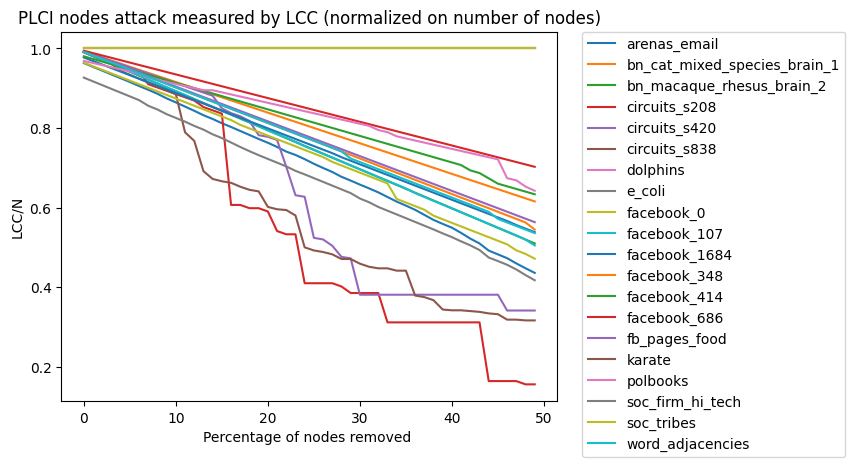

In [33]:
#plotting the attack by complex centrality

plt.plot(list(plci_attack_arenas_email[0].keys()), list(plci_attack_arenas_email[0].values()), label='arenas_email')
plt.plot(list(plci_attack_bn_cat_mixed_species_brain_1[0].keys()), list(plci_attack_bn_cat_mixed_species_brain_1[0].values()), label='bn_cat_mixed_species_brain_1')
plt.plot(list(plci_attack_bn_macaque_rhesus_brain_2[0].keys()), list(plci_attack_bn_macaque_rhesus_brain_2[0].values()), label='bn_macaque_rhesus_brain_2')
plt.plot(list(plci_attack_circuits_s208[0].keys()), list(plci_attack_circuits_s208[0].values()), label='circuits_s208')
plt.plot(list(plci_attack_circuits_s420[0].keys()), list(plci_attack_circuits_s420[0].values()), label='circuits_s420')
plt.plot(list(plci_attack_circuits_s838[0].keys()), list(plci_attack_circuits_s838[0].values()), label='circuits_s838')
plt.plot(list(plci_attack_dolphins[0].keys()), list(plci_attack_dolphins[0].values()), label='dolphins')
plt.plot(list(plci_attack_e_coli[0].keys()), list(plci_attack_e_coli[0].values()), label='e_coli')
plt.plot(list(plci_attack_facebook_0[0].keys()), list(plci_attack_facebook_0[0].values()), label='facebook_0')
plt.plot(list(plci_attack_facebook_107[0].keys()), list(plci_attack_facebook_107[0].values()), label='facebook_107')
plt.plot(list(plci_attack_facebook_1684[0].keys()), list(plci_attack_facebook_1684[0].values()), label='facebook_1684')
plt.plot(list(plci_attack_facebook_348[0].keys()), list(plci_attack_facebook_348[0].values()), label='facebook_348')
plt.plot(list(plci_attack_facebook_414[0].keys()), list(plci_attack_facebook_414[0].values()), label='facebook_414')
plt.plot(list(plci_attack_facebook_686[0].keys()), list(plci_attack_facebook_686[0].values()), label='facebook_686')
plt.plot(list(plci_attack_fb_pages_food[0].keys()), list(plci_attack_fb_pages_food[0].values()), label='fb_pages_food')
plt.plot(list(plci_attack_karate[0].keys()), list(plci_attack_karate[0].values()), label='karate')
plt.plot(list(plci_attack_polbooks[0].keys()), list(plci_attack_polbooks[0].values()), label='polbooks')
plt.plot(list(plci_attack_soc_firm_hi_tech[0].keys()), list(plci_attack_soc_firm_hi_tech[0].values()), label='soc_firm_hi_tech')
plt.plot(list(plci_attack_soc_tribes[0].keys()), list(plci_attack_soc_tribes[0].values()), label='soc_tribes')
plt.plot(list(plci_attack_word_adjacencies[0].keys()), list(plci_attack_word_adjacencies[0].values()), label='word_adjacencies')
# plt.plot(list(plci_attack_er_graph[0].keys()), list(plci_attack_er_graph[0].values()), label='er_graph')
plt.title("PLCI nodes attack measured by LCC (normalized on number of nodes)")

#legend on the side ;p
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Percentage of nodes removed ')
plt.ylabel('LCC/N')


### percolation attacks

In [32]:
#attacking by complex centrality on all graphs 

percolation_attack_arenas_email = attack(arenas_email, percolation_arenas_email_nodes)
percolation_attack_bn_cat_mixed_species_brain_1 = attack(bn_cat_mixed_species_brain_1, percolation_bn_cat_mixed_species_brain_1_nodes)
percolation_attack_bn_macaque_rhesus_brain_2 = attack(bn_macaque_rhesus_brain_2, percolation_bn_macaque_rhesus_brain_2_nodes)
percolation_attack_circuits_s208 = attack(circuits_s208, percolation_circuits_s208_nodes)
percolation_attack_circuits_s420 = attack(circuits_s420, percolation_circuits_s420_nodes)
percolation_attack_circuits_s838 = attack(circuits_s838, percolation_circuits_s838_nodes)
percolation_attack_dolphins = attack(dolphins, percolation_dolphins_nodes)
percolation_attack_e_coli = attack(e_coli, percolation_e_coli_nodes)
percolation_attack_facebook_0 = attack(facebook_0, percolation_facebook_0_nodes)
percolation_attack_facebook_107 = attack(facebook_107, percolation_facebook_107_nodes)
percolation_attack_facebook_1684 = attack(facebook_1684, percolation_facebook_1684_nodes)
percolation_attack_facebook_348 = attack(facebook_348, percolation_facebook_348_nodes)
percolation_attack_facebook_414 = attack(facebook_414, percolation_facebook_414_nodes)
percolation_attack_facebook_686 = attack(facebook_686, percolation_facebook_686_nodes)
percolation_attack_fb_pages_food = attack(fb_pages_food, percolation_fb_pages_food_nodes)
percolation_attack_karate = attack(karate, percolation_karate_nodes)
percolation_attack_polbooks = attack(polbooks, percolation_polbooks_nodes)
percolation_attack_soc_firm_hi_tech = attack(soc_firm_hi_tech, percolation_soc_firm_hi_tech_nodes)
percolation_attack_soc_tribes = attack(soc_tribes, percolation_soc_tribes_nodes)
percolation_attack_word_adjacencies = attack(word_adjacencies, percolation_word_adjacencies_nodes)
# percolation_attack_er_graph = attack(er_graph, percolation_er_graph_nodes)

Text(0, 0.5, 'LCC/N')

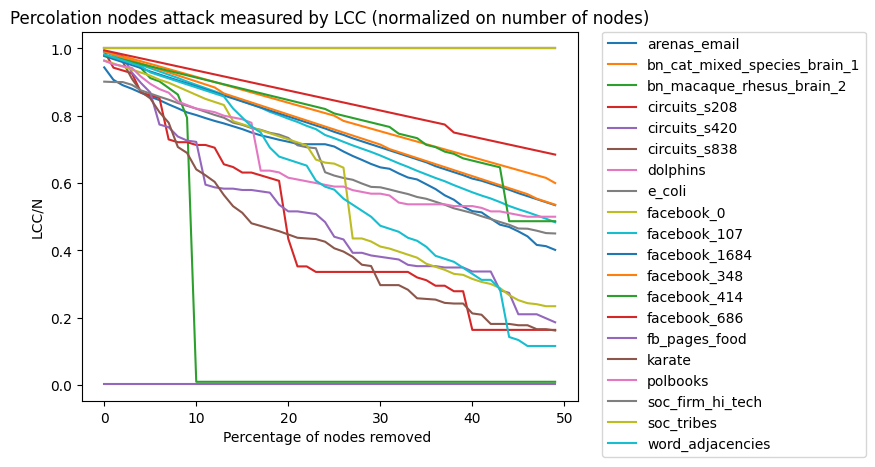

In [34]:
#plotting the attack by complex centrality

plt.plot(list(percolation_attack_arenas_email[0].keys()), list(percolation_attack_arenas_email[0].values()), label='arenas_email')
plt.plot(list(percolation_attack_bn_cat_mixed_species_brain_1[0].keys()), list(percolation_attack_bn_cat_mixed_species_brain_1[0].values()), label='bn_cat_mixed_species_brain_1')
plt.plot(list(percolation_attack_bn_macaque_rhesus_brain_2[0].keys()), list(percolation_attack_bn_macaque_rhesus_brain_2[0].values()), label='bn_macaque_rhesus_brain_2')
plt.plot(list(percolation_attack_circuits_s208[0].keys()), list(percolation_attack_circuits_s208[0].values()), label='circuits_s208')
plt.plot(list(percolation_attack_circuits_s420[0].keys()), list(percolation_attack_circuits_s420[0].values()), label='circuits_s420')
plt.plot(list(percolation_attack_circuits_s838[0].keys()), list(percolation_attack_circuits_s838[0].values()), label='circuits_s838')
plt.plot(list(percolation_attack_dolphins[0].keys()), list(percolation_attack_dolphins[0].values()), label='dolphins')
plt.plot(list(percolation_attack_e_coli[0].keys()), list(percolation_attack_e_coli[0].values()), label='e_coli')
plt.plot(list(percolation_attack_facebook_0[0].keys()), list(percolation_attack_facebook_0[0].values()), label='facebook_0')
plt.plot(list(percolation_attack_facebook_107[0].keys()), list(percolation_attack_facebook_107[0].values()), label='facebook_107')
plt.plot(list(percolation_attack_facebook_1684[0].keys()), list(percolation_attack_facebook_1684[0].values()), label='facebook_1684')
plt.plot(list(percolation_attack_facebook_348[0].keys()), list(percolation_attack_facebook_348[0].values()), label='facebook_348')
plt.plot(list(percolation_attack_facebook_414[0].keys()), list(percolation_attack_facebook_414[0].values()), label='facebook_414')
plt.plot(list(percolation_attack_facebook_686[0].keys()), list(percolation_attack_facebook_686[0].values()), label='facebook_686')
plt.plot(list(percolation_attack_fb_pages_food[0].keys()), list(percolation_attack_fb_pages_food[0].values()), label='fb_pages_food')
plt.plot(list(percolation_attack_karate[0].keys()), list(percolation_attack_karate[0].values()), label='karate')
plt.plot(list(percolation_attack_polbooks[0].keys()), list(percolation_attack_polbooks[0].values()), label='polbooks')
plt.plot(list(percolation_attack_soc_firm_hi_tech[0].keys()), list(percolation_attack_soc_firm_hi_tech[0].values()), label='soc_firm_hi_tech')
plt.plot(list(percolation_attack_soc_tribes[0].keys()), list(percolation_attack_soc_tribes[0].values()), label='soc_tribes')
plt.plot(list(percolation_attack_word_adjacencies[0].keys()), list(percolation_attack_word_adjacencies[0].values()), label='word_adjacencies')
# plt.plot(list(percolation_attack_er_graph[0].keys()), list(percolation_attack_er_graph[0].values()), label='er_graph')
plt.title("Percolation nodes attack measured by LCC (normalized on number of nodes)")

#legend on the side ;p
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Percentage of nodes removed ')
plt.ylabel('LCC/N')


### plots OON

Text(0, 0.5, 'LCC/N')

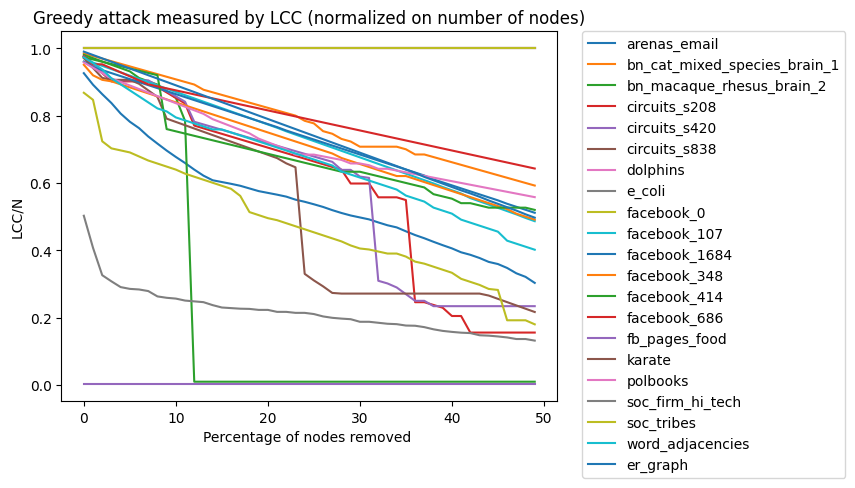

In [35]:
#plotting all networks
plt.plot(list(arenas_email_greedy_attack[0].keys()), list(arenas_email_greedy_attack[0].values()), label='arenas_email')
plt.plot(list(bn_cat_mixed_species_brain_1_greedy_attack[0].keys()), list(bn_cat_mixed_species_brain_1_greedy_attack[0].values()), label='bn_cat_mixed_species_brain_1')
plt.plot(list(bn_macaque_rhesus_brain_2_greedy_attack[0].keys()), list(bn_macaque_rhesus_brain_2_greedy_attack[0].values()), label='bn_macaque_rhesus_brain_2')
plt.plot(list(circuits_s208_greedy_attack[0].keys()), list(circuits_s208_greedy_attack[0].values()), label='circuits_s208')
plt.plot(list(circuits_s420_greedy_attack[0].keys()), list(circuits_s420_greedy_attack[0].values()), label='circuits_s420')
plt.plot(list(circuits_s838_greedy_attack[0].keys()), list(circuits_s838_greedy_attack[0].values()), label='circuits_s838')
plt.plot(list(dolphins_greedy_attack[0].keys()), list(dolphins_greedy_attack[0].values()), label='dolphins')
plt.plot(list(e_coli_greedy_attack[0].keys()), list(e_coli_greedy_attack[0].values()), label='e_coli')
plt.plot(list(facebook_0_greedy_attack[0].keys()), list(facebook_0_greedy_attack[0].values()), label='facebook_0')
plt.plot(list(facebook_107_greedy_attack[0].keys()), list(facebook_107_greedy_attack[0].values()), label='facebook_107')
plt.plot(list(facebook_1684_greedy_attack[0].keys()), list(facebook_1684_greedy_attack[0].values()), label='facebook_1684')
plt.plot(list(facebook_348_greedy_attack[0].keys()), list(facebook_348_greedy_attack[0].values()), label='facebook_348')
plt.plot(list(facebook_414_greedy_attack[0].keys()), list(facebook_414_greedy_attack[0].values()), label='facebook_414')
plt.plot(list(facebook_686_greedy_attack[0].keys()), list(facebook_686_greedy_attack[0].values()), label='facebook_686')
plt.plot(list(fb_pages_food_greedy_attack[0].keys()), list(fb_pages_food_greedy_attack[0].values()), label='fb_pages_food')
plt.plot(list(karate_greedy_attack[0].keys()), list(karate_greedy_attack[0].values()), label='karate')
plt.plot(list(polbooks_greedy_attack[0].keys()), list(polbooks_greedy_attack[0].values()), label='polbooks')
plt.plot(list(soc_firm_hi_tech_greedy_attack[0].keys()), list(soc_firm_hi_tech_greedy_attack[0].values()), label='soc_firm_hi_tech')
plt.plot(list(soc_tribes_greedy_attack[0].keys()), list(soc_tribes_greedy_attack[0].values()), label='soc_tribes')
plt.plot(list(word_adjacencies_greedy_attack[0].keys()), list(word_adjacencies_greedy_attack[0].values()), label='word_adjacencies')
plt.plot(list(er_graph_greedy_attack[0].keys()), list(er_graph_greedy_attack[0].values()), label='er_graph')

plt.title("Greedy attack measured by LCC (normalized on number of nodes)")
#make legend on the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Percentage of nodes removed ')
plt.ylabel('LCC/N')


Text(0, 0.5, 'LCC/N')

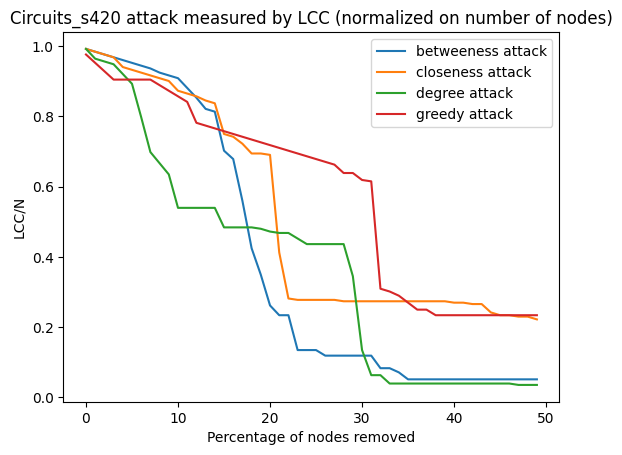

In [36]:
#do greedy, betweeness and closeness attack on circuits_s420

#plot them together
plt.plot(list(bet_attack_circuits_s420[0].keys()), list(bet_attack_circuits_s420[0].values()), label='betweeness attack')
plt.plot(list(clos_attack_circuits_s420[0].keys()), list(clos_attack_circuits_s420[0].values()), label='closeness attack')
plt.plot(list(deg_attack_circuits_s420[0].keys()), list(deg_attack_circuits_s420[0].values()), label='degree attack')
plt.plot(list(circuits_s420_greedy_attack[0].keys()), list(circuits_s420_greedy_attack[0].values()), label='greedy attack')

plt.title("Circuits_s420 attack measured by LCC (normalized on number of nodes)")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

## Mapping Entropy Betweenness

In [206]:

def get_MEB(G:nx.Graph, k:int, bet:dict)->float:
    '''
    takes a graph and a node k, returns the MEB centrality following this formula:
    MEBk= BCk * SUM(log(BCi)) for all i neighbor of k
    '''
    BCk = bet[k][1]
    neighbors = list(G.neighbors(k))
    BC_neighbors = [bet[x][1] for x in neighbors]
    sum_log_BC_neighbors = sum([math.log(x+1e-06)  for x in BC_neighbors]) #if betweeness is 0, consider log(0)=-50
    MEBk = BCk * sum_log_BC_neighbors
    return MEBk

def MEB_centrality(G:nx.Graph, bet)->dict:
    '''takes a graph and returns a dictionary of MEB centrality for each node'''
    MEB = {}
    for node in G.nodes():
        MEB[node] = get_MEB(G, node, bet)
    return MEB

In [207]:
meb_centrality_sorted_arenas_email = sorted(MEB_centrality(arenas_email, betweenness_centrality_sorted_arenas_email).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_arenas_email_nodes =[x[0] for x in meb_centrality_sorted_arenas_email]
print("done arenas_email")
meb_centrality_sorted_bn_cat_mixed_species_brain_1 = sorted(MEB_centrality(bn_cat_mixed_species_brain_1, betweenness_centrality_sorted_bn_cat_mixed_species_brain_1).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_bn_cat_mixed_species_brain_1_nodes =[x[0] for x in meb_centrality_sorted_bn_cat_mixed_species_brain_1]
print("done bn_cat_mixed_species_brain_1")
meb_centrality_sorted_bn_macaque_rhesus_brain_2 = sorted(MEB_centrality(bn_macaque_rhesus_brain_2, betweenness_centrality_sorted_bn_macaque_rhesus_brain_2).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_bn_macaque_rhesus_brain_2_nodes =[x[0] for x in meb_centrality_sorted_bn_macaque_rhesus_brain_2]
print("done bn_macaque_rhesus_brain_2")
meb_centrality_sorted_circuits_s208 = sorted(MEB_centrality(circuits_s208, betweenness_centrality_sorted_circuits_s208).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_circuits_s208_nodes =[x[0] for x in meb_centrality_sorted_circuits_s208]
print("done circuits_s208")
meb_centrality_sorted_circuits_s420 = sorted(MEB_centrality(circuits_s420, betweenness_centrality_sorted_circuits_s420).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_circuits_s420_nodes =[x[0] for x in meb_centrality_sorted_circuits_s420]
print("done circuits_s420")
meb_centrality_sorted_circuits_s838 = sorted(MEB_centrality(circuits_s838, betweenness_centrality_sorted_circuits_s838).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_circuits_s838_nodes =[x[0] for x in meb_centrality_sorted_circuits_s838]
print("done circuits_s838")
meb_centrality_sorted_dolphins = sorted(MEB_centrality(dolphins, betweenness_centrality_sorted_dolphins).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_dolphins_nodes =[x[0] for x in meb_centrality_sorted_dolphins]
print("done dolphins")
meb_centrality_sorted_e_coli = sorted(MEB_centrality(e_coli, betweenness_centrality_sorted_e_coli).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_e_coli_nodes =[x[0] for x in meb_centrality_sorted_e_coli]
print("done e_coli")
meb_centrality_sorted_facebook_0 = sorted(MEB_centrality(facebook_0, betweenness_centrality_sorted_facebook_0).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_facebook_0_nodes =[x[0] for x in meb_centrality_sorted_facebook_0]
print("done facebook_0")
meb_centrality_sorted_facebook_107 = sorted(MEB_centrality(facebook_107, betweenness_centrality_sorted_facebook_107).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_facebook_107_nodes =[x[0] for x in meb_centrality_sorted_facebook_107]
print("done facebook_107")
meb_centrality_sorted_facebook_1684 = sorted(MEB_centrality(facebook_1684, betweenness_centrality_sorted_facebook_1684).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_facebook_1684_nodes =[x[0] for x in meb_centrality_sorted_facebook_1684]
print("done facebook_1684")
meb_centrality_sorted_facebook_348 = sorted(MEB_centrality(facebook_348, betweenness_centrality_sorted_facebook_348).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_facebook_348_nodes =[x[0] for x in meb_centrality_sorted_facebook_348]
print("done facebook_348")
meb_centrality_sorted_facebook_414 = sorted(MEB_centrality(facebook_414, betweenness_centrality_sorted_facebook_414).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_facebook_414_nodes =[x[0] for x in meb_centrality_sorted_facebook_414]
print("done facebook_414")
meb_centrality_sorted_facebook_686 = sorted(MEB_centrality(facebook_686, betweenness_centrality_sorted_facebook_686).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_facebook_686_nodes =[x[0] for x in meb_centrality_sorted_facebook_686]
print("done facebook_686")
meb_centrality_sorted_fb_pages_food = sorted(MEB_centrality(fb_pages_food, betweenness_centrality_sorted_fb_pages_food).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_fb_pages_food_nodes =[x[0] for x in meb_centrality_sorted_fb_pages_food]
print("done fb_pages_food")
meb_centrality_sorted_karate = sorted(MEB_centrality(karate, betweenness_centrality_sorted_karate).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_karate_nodes =[x[0] for x in meb_centrality_sorted_karate]
print("done karate")
meb_centrality_sorted_polbooks = sorted(MEB_centrality(polbooks, betweenness_centrality_sorted_polbooks).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_polbooks_nodes =[x[0] for x in meb_centrality_sorted_polbooks]
print("done polbooks")
meb_centrality_sorted_soc_firm_hi_tech = sorted(MEB_centrality(soc_firm_hi_tech, betweenness_centrality_sorted_soc_firm_hi_tech).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_soc_firm_hi_tech_nodes =[x[0] for x in meb_centrality_sorted_soc_firm_hi_tech]
print("done soc_firm_hi_tech")
meb_centrality_sorted_soc_tribes = sorted(MEB_centrality(soc_tribes, betweenness_centrality_sorted_soc_tribes).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_soc_tribes_nodes =[x[0] for x in meb_centrality_sorted_soc_tribes]
print("done soc_tribes")
meb_centrality_sorted_word_adjacencies = sorted(MEB_centrality(word_adjacencies, betweenness_centrality_sorted_word_adjacencies).items(), key=lambda x: x[1], reverse=True)
meb_centrality_sorted_word_adjacencies_nodes =[x[0] for x in meb_centrality_sorted_word_adjacencies]
print("done word_adjacencies")


done arenas_email
done bn_cat_mixed_species_brain_1
done bn_macaque_rhesus_brain_2
done circuits_s208
done circuits_s420
done circuits_s838
done dolphins
done e_coli
done facebook_0
done facebook_107
done facebook_1684
done facebook_348
done facebook_414
done facebook_686
done fb_pages_food
done karate
done polbooks
done soc_firm_hi_tech
done soc_tribes
done word_adjacencies


Text(0, 0.5, 'LCC/N')

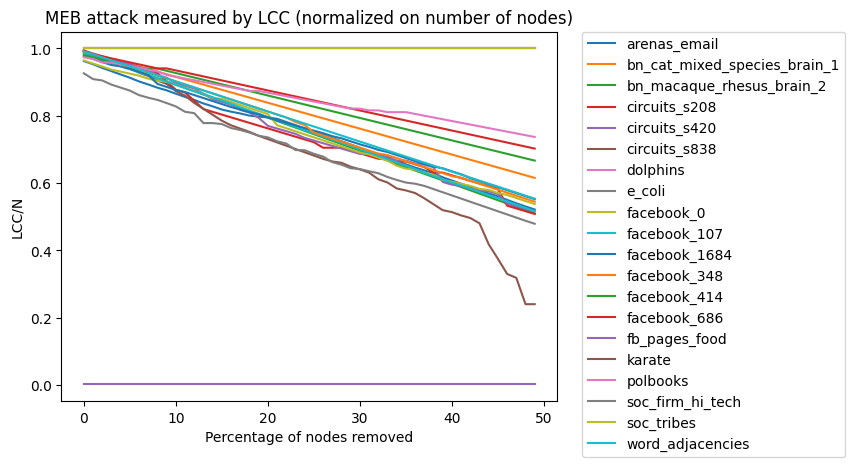

In [208]:
#attack 

meb_attack_arenas_email = attack(arenas_email, meb_centrality_sorted_arenas_email_nodes)
meb_attack_bn_cat_mixed_species_brain_1 = attack(bn_cat_mixed_species_brain_1, meb_centrality_sorted_bn_cat_mixed_species_brain_1_nodes)
meb_attack_bn_macaque_rhesus_brain_2 = attack(bn_macaque_rhesus_brain_2, meb_centrality_sorted_bn_macaque_rhesus_brain_2_nodes)
meb_attack_circuits_s208 = attack(circuits_s208, meb_centrality_sorted_circuits_s208_nodes)
meb_attack_circuits_s420 = attack(circuits_s420, meb_centrality_sorted_circuits_s420_nodes)
meb_attack_circuits_s838 = attack(circuits_s838, meb_centrality_sorted_circuits_s838_nodes)
meb_attack_dolphins = attack(dolphins, meb_centrality_sorted_dolphins_nodes)
meb_attack_e_coli = attack(e_coli, meb_centrality_sorted_e_coli_nodes)
meb_attack_facebook_0 = attack(facebook_0, meb_centrality_sorted_facebook_0_nodes)
meb_attack_facebook_107 = attack(facebook_107, meb_centrality_sorted_facebook_107_nodes)
meb_attack_facebook_1684 = attack(facebook_1684, meb_centrality_sorted_facebook_1684_nodes)
meb_attack_facebook_348 = attack(facebook_348, meb_centrality_sorted_facebook_348_nodes)
meb_attack_facebook_414 = attack(facebook_414, meb_centrality_sorted_facebook_414_nodes)    
meb_attack_facebook_686 = attack(facebook_686, meb_centrality_sorted_facebook_686_nodes)
meb_attack_fb_pages_food = attack(fb_pages_food, meb_centrality_sorted_fb_pages_food_nodes)
meb_attack_karate = attack(karate, meb_centrality_sorted_karate_nodes)
meb_attack_polbooks = attack(polbooks, meb_centrality_sorted_polbooks_nodes)
meb_attack_soc_firm_hi_tech = attack(soc_firm_hi_tech, meb_centrality_sorted_soc_firm_hi_tech_nodes)
meb_attack_soc_tribes = attack(soc_tribes, meb_centrality_sorted_soc_tribes_nodes)
meb_attack_word_adjacencies = attack(word_adjacencies, meb_centrality_sorted_word_adjacencies_nodes)

#plotting all networks
plt.plot(list(meb_attack_arenas_email[0].keys()), list(meb_attack_arenas_email[0].values()), label='arenas_email')
plt.plot(list(meb_attack_bn_cat_mixed_species_brain_1[0].keys()), list(meb_attack_bn_cat_mixed_species_brain_1[0].values()), label='bn_cat_mixed_species_brain_1')
plt.plot(list(meb_attack_bn_macaque_rhesus_brain_2[0].keys()), list(meb_attack_bn_macaque_rhesus_brain_2[0].values()), label='bn_macaque_rhesus_brain_2')
plt.plot(list(meb_attack_circuits_s208[0].keys()), list(meb_attack_circuits_s208[0].values()), label='circuits_s208')
plt.plot(list(meb_attack_circuits_s420[0].keys()), list(meb_attack_circuits_s420[0].values()), label='circuits_s420')
plt.plot(list(meb_attack_circuits_s838[0].keys()), list(meb_attack_circuits_s838[0].values()), label='circuits_s838')
plt.plot(list(meb_attack_dolphins[0].keys()), list(meb_attack_dolphins[0].values()), label='dolphins')
plt.plot(list(meb_attack_e_coli[0].keys()), list(meb_attack_e_coli[0].values()), label='e_coli')
plt.plot(list(meb_attack_facebook_0[0].keys()), list(meb_attack_facebook_0[0].values()), label='facebook_0')
plt.plot(list(meb_attack_facebook_107[0].keys()), list(meb_attack_facebook_107[0].values()), label='facebook_107')
plt.plot(list(meb_attack_facebook_1684[0].keys()), list(meb_attack_facebook_1684[0].values()), label='facebook_1684')
plt.plot(list(meb_attack_facebook_348[0].keys()), list(meb_attack_facebook_348[0].values()), label='facebook_348')
plt.plot(list(meb_attack_facebook_414[0].keys()), list(meb_attack_facebook_414[0].values()), label='facebook_414')
plt.plot(list(meb_attack_facebook_686[0].keys()), list(meb_attack_facebook_686[0].values()), label='facebook_686')
plt.plot(list(meb_attack_fb_pages_food[0].keys()), list(meb_attack_fb_pages_food[0].values()), label='fb_pages_food')
plt.plot(list(meb_attack_karate[0].keys()), list(meb_attack_karate[0].values()), label='karate')
plt.plot(list(meb_attack_polbooks[0].keys()), list(meb_attack_polbooks[0].values()), label='polbooks')
plt.plot(list(meb_attack_soc_firm_hi_tech[0].keys()), list(meb_attack_soc_firm_hi_tech[0].values()), label='soc_firm_hi_tech')
plt.plot(list(meb_attack_soc_tribes[0].keys()), list(meb_attack_soc_tribes[0].values()), label='soc_tribes')
plt.plot(list(meb_attack_word_adjacencies[0].keys()), list(meb_attack_word_adjacencies[0].values()), label='word_adjacencies')

plt.title("MEB attack measured by LCC (normalized on number of nodes)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')


## Mapping Entropy Closeness

In [202]:
def MEC(G:nx.Graph, k:int, clos:dict)->float:
    '''
    takes a graph and a node k, returns the MEC centrality following this formula:
    MECk= - CCk * SUM(log(CCi)) for all i neighbor of k
    '''
    CCk = clos[k][1]
    neighbors = list(G.neighbors(k))
    CC_neighbors = [clos[x][1] for x in neighbors]
    sum_log_CC_neighbors = sum([math.log(x+1e-06) for x in CC_neighbors]) 
    MECk = - CCk * sum_log_CC_neighbors
    return MECk

def MEC_centrality(G:nx.Graph, clos)->dict:
    '''takes a graph and returns a dictionary of MEC centrality for each node'''
    MEC_dict = {}
    for node in G.nodes():
        MEC_dict[node] = MEC(G, node, clos)
    return MEC_dict



In [204]:

mec_centrality_sorted_arenas_email = sorted(MEC_centrality(arenas_email, closeness_centrality_sorted_arenas_email).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_arenas_email_nodes =[x[0] for x in mec_centrality_sorted_arenas_email]
print("done arenas_email")
mec_centrality_sorted_bn_cat_mixed_species_brain_1 = sorted(MEC_centrality(bn_cat_mixed_species_brain_1, closeness_centrality_sorted_bn_cat_mixed_species_brain_1).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_bn_cat_mixed_species_brain_1_nodes =[x[0] for x in mec_centrality_sorted_bn_cat_mixed_species_brain_1]
print("done bn_cat_mixed_species_brain_1")
mec_centrality_sorted_bn_macaque_rhesus_brain_2 = sorted(MEC_centrality(bn_macaque_rhesus_brain_2, closeness_centrality_sorted_bn_macaque_rhesus_brain_2).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_bn_macaque_rhesus_brain_2_nodes =[x[0] for x in mec_centrality_sorted_bn_macaque_rhesus_brain_2]
print("done bn_macaque_rhesus_brain_2")
mec_centrality_sorted_circuits_s208 = sorted(MEC_centrality(circuits_s208, closeness_centrality_sorted_circuits_s208).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_circuits_s208_nodes =[x[0] for x in mec_centrality_sorted_circuits_s208]
print("done circuits_s208")
mec_centrality_sorted_circuits_s420 = sorted(MEC_centrality(circuits_s420, closeness_centrality_sorted_circuits_s420).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_circuits_s420_nodes =[x[0] for x in mec_centrality_sorted_circuits_s420]
print("done circuits_s420")
mec_centrality_sorted_circuits_s838 = sorted(MEC_centrality(circuits_s838, closeness_centrality_sorted_circuits_s838).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_circuits_s838_nodes =[x[0] for x in mec_centrality_sorted_circuits_s838]
print("done circuits_s838")
mec_centrality_sorted_dolphins = sorted(MEC_centrality(dolphins, closeness_centrality_sorted_dolphins).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_dolphins_nodes =[x[0] for x in mec_centrality_sorted_dolphins]
print("done dolphins")
mec_centrality_sorted_e_coli = sorted(MEC_centrality(e_coli, closeness_centrality_sorted_e_coli).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_e_coli_nodes =[x[0] for x in mec_centrality_sorted_e_coli]
print("done e_coli")
mec_centrality_sorted_facebook_0 = sorted(MEC_centrality(facebook_0, closeness_centrality_sorted_facebook_0).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_facebook_0_nodes =[x[0] for x in mec_centrality_sorted_facebook_0]
print("done facebook_0")
mec_centrality_sorted_facebook_107 = sorted(MEC_centrality(facebook_107, closeness_centrality_sorted_facebook_107).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_facebook_107_nodes =[x[0] for x in mec_centrality_sorted_facebook_107]
print("done facebook_107")
mec_centrality_sorted_facebook_1684 = sorted(MEC_centrality(facebook_1684, closeness_centrality_sorted_facebook_1684).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_facebook_1684_nodes =[x[0] for x in mec_centrality_sorted_facebook_1684]
print("done facebook_1684")
mec_centrality_sorted_facebook_348 = sorted(MEC_centrality(facebook_348, closeness_centrality_sorted_facebook_348).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_facebook_348_nodes =[x[0] for x in mec_centrality_sorted_facebook_348]
print("done facebook_348")
mec_centrality_sorted_facebook_414 = sorted(MEC_centrality(facebook_414, closeness_centrality_sorted_facebook_414).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_facebook_414_nodes =[x[0] for x in mec_centrality_sorted_facebook_414]
print("done facebook_414")
mec_centrality_sorted_facebook_686 = sorted(MEC_centrality(facebook_686, closeness_centrality_sorted_facebook_686).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_facebook_686_nodes =[x[0] for x in mec_centrality_sorted_facebook_686]
print("done facebook_686")
mec_centrality_sorted_fb_pages_food = sorted(MEC_centrality(fb_pages_food, closeness_centrality_sorted_fb_pages_food).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_fb_pages_food_nodes =[x[0] for x in mec_centrality_sorted_fb_pages_food]
print("done fb_pages_food")
mec_centrality_sorted_karate = sorted(MEC_centrality(karate, closeness_centrality_sorted_karate).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_karate_nodes =[x[0] for x in mec_centrality_sorted_karate]
print("done karate")
mec_centrality_sorted_polbooks = sorted(MEC_centrality(polbooks, closeness_centrality_sorted_polbooks).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_polbooks_nodes =[x[0] for x in mec_centrality_sorted_polbooks]
print("done polbooks")
mec_centrality_sorted_soc_firm_hi_tech = sorted(MEC_centrality(soc_firm_hi_tech, closeness_centrality_sorted_soc_firm_hi_tech).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_soc_firm_hi_tech_nodes =[x[0] for x in mec_centrality_sorted_soc_firm_hi_tech]
print("done soc_firm_hi_tech")
mec_centrality_sorted_soc_tribes = sorted(MEC_centrality(soc_tribes, closeness_centrality_sorted_soc_tribes).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_soc_tribes_nodes =[x[0] for x in mec_centrality_sorted_soc_tribes]
print("done soc_tribes")
mec_centrality_sorted_word_adjacencies = sorted(MEC_centrality(word_adjacencies, closeness_centrality_sorted_word_adjacencies).items(), key=lambda x: x[1], reverse=True)
mec_centrality_sorted_word_adjacencies_nodes =[x[0] for x in mec_centrality_sorted_word_adjacencies]
print("done word_adjacencies")


done arenas_email
done bn_cat_mixed_species_brain_1
done bn_macaque_rhesus_brain_2
done circuits_s208
done circuits_s420
done circuits_s838
done dolphins
done e_coli
done facebook_0
done facebook_107
done facebook_1684
done facebook_348
done facebook_414
done facebook_686
done fb_pages_food
done karate
done polbooks
done soc_firm_hi_tech
done soc_tribes
done word_adjacencies


In [205]:
mec_attack_arenas_email = attack(arenas_email, mec_centrality_sorted_arenas_email_nodes)
mec_attack_bn_cat_mixed_species_brain_1 = attack(bn_cat_mixed_species_brain_1, mec_centrality_sorted_bn_cat_mixed_species_brain_1_nodes)
mec_attack_bn_macaque_rhesus_brain_2 = attack(bn_macaque_rhesus_brain_2, mec_centrality_sorted_bn_macaque_rhesus_brain_2_nodes)
mec_attack_circuits_s208 = attack(circuits_s208, mec_centrality_sorted_circuits_s208_nodes)
mec_attack_circuits_s420 = attack(circuits_s420, mec_centrality_sorted_circuits_s420_nodes)
mec_attack_circuits_s838 = attack(circuits_s838, mec_centrality_sorted_circuits_s838_nodes)
mec_attack_dolphins = attack(dolphins, mec_centrality_sorted_dolphins_nodes)
mec_attack_e_coli = attack(e_coli, mec_centrality_sorted_e_coli_nodes)
mec_attack_facebook_0 = attack(facebook_0, mec_centrality_sorted_facebook_0_nodes)
mec_attack_facebook_107 = attack(facebook_107, mec_centrality_sorted_facebook_107_nodes)
mec_attack_facebook_1684 = attack(facebook_1684, mec_centrality_sorted_facebook_1684_nodes)
mec_attack_facebook_348 = attack(facebook_348, mec_centrality_sorted_facebook_348_nodes)
mec_attack_facebook_414 = attack(facebook_414, mec_centrality_sorted_facebook_414_nodes)
mec_attack_facebook_686 = attack(facebook_686, mec_centrality_sorted_facebook_686_nodes)
mec_attack_fb_pages_food = attack(fb_pages_food, mec_centrality_sorted_fb_pages_food_nodes)
mec_attack_karate = attack(karate, mec_centrality_sorted_karate_nodes)
mec_attack_polbooks = attack(polbooks, mec_centrality_sorted_polbooks_nodes)
mec_attack_soc_firm_hi_tech = attack(soc_firm_hi_tech, mec_centrality_sorted_soc_firm_hi_tech_nodes)
mec_attack_soc_tribes = attack(soc_tribes, mec_centrality_sorted_soc_tribes_nodes)
mec_attack_word_adjacencies = attack(word_adjacencies, mec_centrality_sorted_word_adjacencies_nodes)


Text(0, 0.5, 'LCC/N')

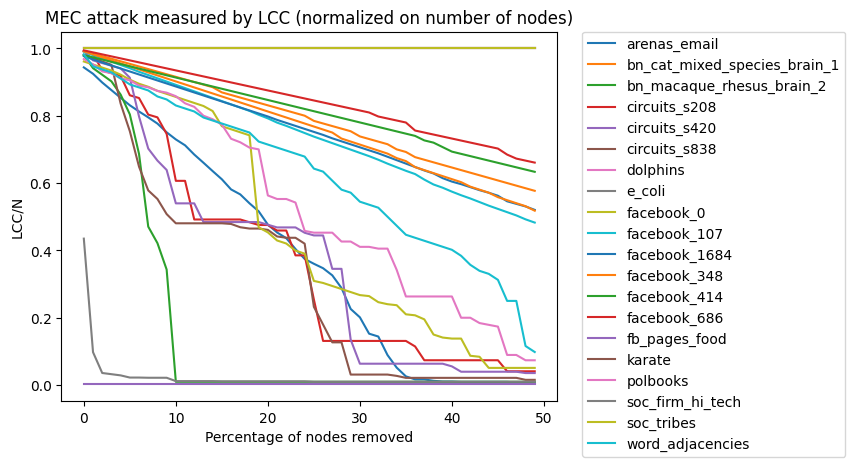

In [192]:
#plot
plt.plot(list(mec_attack_arenas_email[0].keys()), list(mec_attack_arenas_email[0].values()), label='arenas_email')
plt.plot(list(mec_attack_bn_cat_mixed_species_brain_1[0].keys()), list(mec_attack_bn_cat_mixed_species_brain_1[0].values()), label='bn_cat_mixed_species_brain_1')
plt.plot(list(mec_attack_bn_macaque_rhesus_brain_2[0].keys()), list(mec_attack_bn_macaque_rhesus_brain_2[0].values()), label='bn_macaque_rhesus_brain_2')
plt.plot(list(mec_attack_circuits_s208[0].keys()), list(mec_attack_circuits_s208[0].values()), label='circuits_s208')
plt.plot(list(mec_attack_circuits_s420[0].keys()), list(mec_attack_circuits_s420[0].values()), label='circuits_s420')
plt.plot(list(mec_attack_circuits_s838[0].keys()), list(mec_attack_circuits_s838[0].values()), label='circuits_s838')
plt.plot(list(mec_attack_dolphins[0].keys()), list(mec_attack_dolphins[0].values()), label='dolphins')
plt.plot(list(mec_attack_e_coli[0].keys()), list(mec_attack_e_coli[0].values()), label='e_coli')
plt.plot(list(mec_attack_facebook_0[0].keys()), list(mec_attack_facebook_0[0].values()), label='facebook_0')
plt.plot(list(mec_attack_facebook_107[0].keys()), list(mec_attack_facebook_107[0].values()), label='facebook_107')
plt.plot(list(mec_attack_facebook_1684[0].keys()), list(mec_attack_facebook_1684[0].values()), label='facebook_1684')
plt.plot(list(mec_attack_facebook_348[0].keys()), list(mec_attack_facebook_348[0].values()), label='facebook_348')
plt.plot(list(mec_attack_facebook_414[0].keys()), list(mec_attack_facebook_414[0].values()), label='facebook_414')
plt.plot(list(mec_attack_facebook_686[0].keys()), list(mec_attack_facebook_686[0].values()), label='facebook_686')
plt.plot(list(mec_attack_fb_pages_food[0].keys()), list(mec_attack_fb_pages_food[0].values()), label='fb_pages_food')
plt.plot(list(mec_attack_karate[0].keys()), list(mec_attack_karate[0].values()), label='karate')
plt.plot(list(mec_attack_polbooks[0].keys()), list(mec_attack_polbooks[0].values()), label='polbooks')
plt.plot(list(mec_attack_soc_firm_hi_tech[0].keys()), list(mec_attack_soc_firm_hi_tech[0].values()), label='soc_firm_hi_tech')
plt.plot(list(mec_attack_soc_tribes[0].keys()), list(mec_attack_soc_tribes[0].values()), label='soc_tribes')
plt.plot(list(mec_attack_word_adjacencies[0].keys()), list(mec_attack_word_adjacencies[0].values()), label='word_adjacencies')

plt.title("MEC attack measured by LCC (normalized on number of nodes)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

Text(0, 0.5, 'LCC/N')

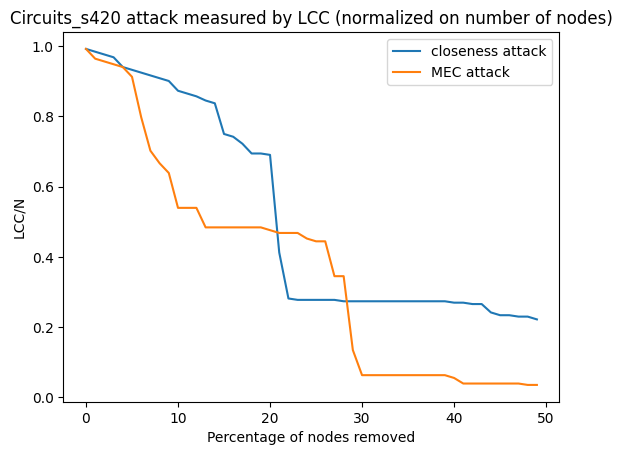

In [193]:
#plot closness and MEC on circuits s282
plt.plot(list(clos_attack_circuits_s420[0].keys()), list(clos_attack_circuits_s420[0].values()), label='closeness attack')
plt.plot(list(mec_attack_circuits_s420[0].keys()), list(mec_attack_circuits_s420[0].values()), label='MEC attack')

plt.title("Circuits_s420 attack measured by LCC (normalized on number of nodes)")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

Text(0, 0.5, 'LCC/N')

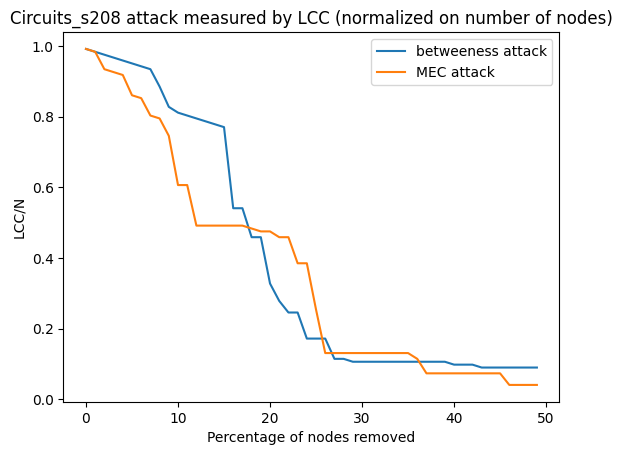

In [196]:
#with betweeness
plt.plot(list(bet_attack_circuits_s208[0].keys()), list(bet_attack_circuits_s208[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_circuits_s208[0].keys()), list(mec_attack_circuits_s208[0].values()), label='MEC attack')

plt.title("Circuits_s208 attack measured by LCC (normalized on number of nodes)")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

Text(0, 0.5, 'LCC/N')

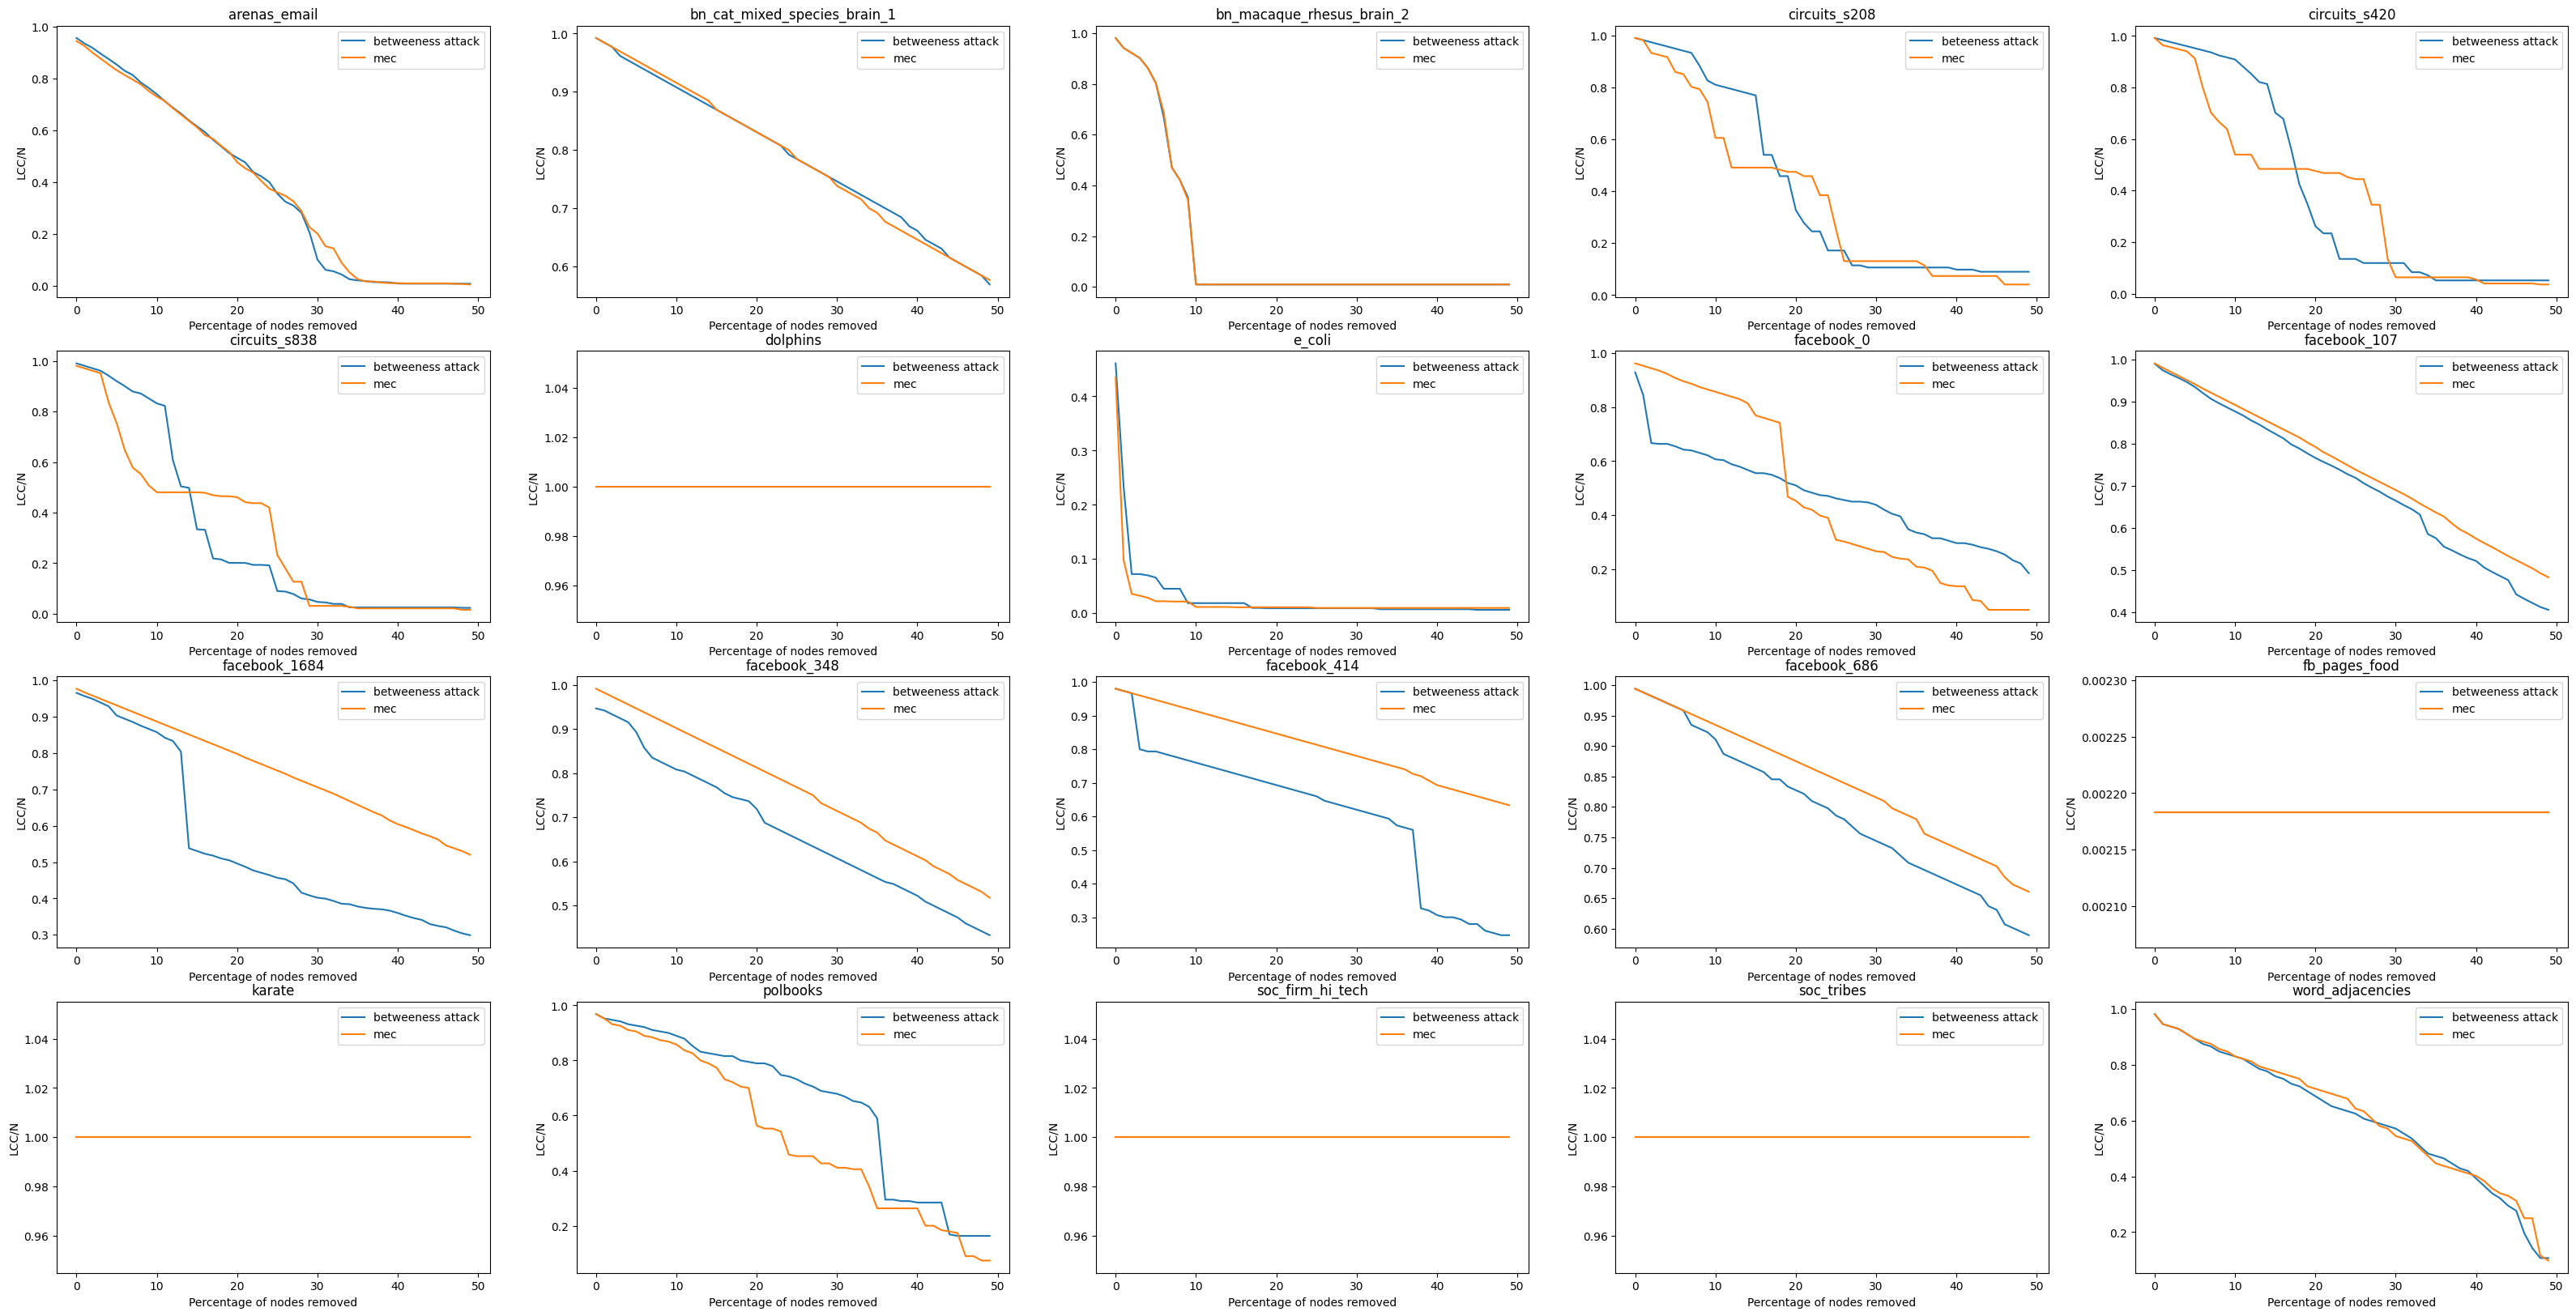

In [209]:
#make 10 plots, 5 on each row of betweeness and mec attacks on 10 different entworks
figure=plt.figure(figsize=(40, 20))
plt.subplot(4, 5, 1)
plt.plot(list(bet_attack_arenas_email[0].keys()), list(bet_attack_arenas_email[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_arenas_email[0].keys()), list(mec_attack_arenas_email[0].values()), label='mec')
plt.title("arenas_email")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 2)
plt.plot(list(bet_attack_bn_cat_mixed_species_brain_1[0].keys()), list(bet_attack_bn_cat_mixed_species_brain_1[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_bn_cat_mixed_species_brain_1[0].keys()), list(mec_attack_bn_cat_mixed_species_brain_1[0].values()), label='mec')
plt.title("bn_cat_mixed_species_brain_1")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 3)
plt.plot(list(bet_attack_bn_macaque_rhesus_brain_2[0].keys()), list(bet_attack_bn_macaque_rhesus_brain_2[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_bn_macaque_rhesus_brain_2[0].keys()), list(mec_attack_bn_macaque_rhesus_brain_2[0].values()), label='mec')
plt.title("bn_macaque_rhesus_brain_2")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 4)
plt.plot(list(bet_attack_circuits_s208[0].keys()), list(bet_attack_circuits_s208[0].values()), label='beteeness attack')
plt.plot(list(mec_attack_circuits_s208[0].keys()), list(mec_attack_circuits_s208[0].values()), label='mec')
plt.title("circuits_s208")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 5)
plt.plot(list(bet_attack_circuits_s420[0].keys()), list(bet_attack_circuits_s420[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_circuits_s420[0].keys()), list(mec_attack_circuits_s420[0].values()), label='mec')
plt.title("circuits_s420")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 6)
plt.plot(list(bet_attack_circuits_s838[0].keys()), list(bet_attack_circuits_s838[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_circuits_s838[0].keys()), list(mec_attack_circuits_s838[0].values()), label='mec')
plt.title("circuits_s838")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 7)
plt.plot(list(bet_attack_dolphins[0].keys()), list(bet_attack_dolphins[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_dolphins[0].keys()), list(mec_attack_dolphins[0].values()), label='mec')
plt.title("dolphins")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 8)
plt.plot(list(bet_attack_e_coli[0].keys()), list(bet_attack_e_coli[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_e_coli[0].keys()), list(mec_attack_e_coli[0].values()), label='mec')
plt.title("e_coli")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 9)
plt.plot(list(bet_attack_facebook_0[0].keys()), list(bet_attack_facebook_0[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_facebook_0[0].keys()), list(mec_attack_facebook_0[0].values()), label='mec')
plt.title("facebook_0")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 10)
plt.plot(list(bet_attack_facebook_107[0].keys()), list(bet_attack_facebook_107[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_facebook_107[0].keys()), list(mec_attack_facebook_107[0].values()), label='mec')
plt.title("facebook_107")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 11)
plt.plot(list(bet_attack_facebook_1684[0].keys()), list(bet_attack_facebook_1684[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_facebook_1684[0].keys()), list(mec_attack_facebook_1684[0].values()), label='mec')
plt.title("facebook_1684")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 12)
plt.plot(list(bet_attack_facebook_348[0].keys()), list(bet_attack_facebook_348[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_facebook_348[0].keys()), list(mec_attack_facebook_348[0].values()), label='mec')
plt.title("facebook_348")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 13)
plt.plot(list(bet_attack_facebook_414[0].keys()), list(bet_attack_facebook_414[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_facebook_414[0].keys()), list(mec_attack_facebook_414[0].values()), label='mec')
plt.title("facebook_414")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 14)
plt.plot(list(bet_attack_facebook_686[0].keys()), list(bet_attack_facebook_686[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_facebook_686[0].keys()), list(mec_attack_facebook_686[0].values()), label='mec')
plt.title("facebook_686")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 15)
plt.plot(list(bet_attack_fb_pages_food[0].keys()), list(bet_attack_fb_pages_food[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_fb_pages_food[0].keys()), list(mec_attack_fb_pages_food[0].values()), label='mec')
plt.title("fb_pages_food")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 16)
plt.plot(list(bet_attack_karate[0].keys()), list(bet_attack_karate[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_karate[0].keys()), list(mec_attack_karate[0].values()), label='mec')
plt.title("karate")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 17)
plt.plot(list(bet_attack_polbooks[0].keys()), list(bet_attack_polbooks[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_polbooks[0].keys()), list(mec_attack_polbooks[0].values()), label='mec')
plt.title("polbooks")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 18)
plt.plot(list(bet_attack_soc_firm_hi_tech[0].keys()), list(bet_attack_soc_firm_hi_tech[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_soc_firm_hi_tech[0].keys()), list(mec_attack_soc_firm_hi_tech[0].values()), label='mec')
plt.title("soc_firm_hi_tech")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 19)
plt.plot(list(bet_attack_soc_tribes[0].keys()), list(bet_attack_soc_tribes[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_soc_tribes[0].keys()), list(mec_attack_soc_tribes[0].values()), label='mec')
plt.title("soc_tribes")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(4, 5, 20)
plt.plot(list(bet_attack_word_adjacencies[0].keys()), list(bet_attack_word_adjacencies[0].values()), label='betweeness attack')
plt.plot(list(mec_attack_word_adjacencies[0].keys()), list(mec_attack_word_adjacencies[0].values()), label='mec')
plt.title("word_adjacencies")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

## Mapping Entropy Degree

In [211]:
def MED(G:nx.Graph, k:int, deg:dict)->float:
    '''
    takes a graph and a node k, returns the MED centrality following this formula:
    MEDk= - DEGk * SUM(log(DEGi)) for all i neighbor of k
    '''
    DEGk = deg[k][1]
    neighbors = list(G.neighbors(k))
    DEG_neighbors = [deg[x][1] for x in neighbors]
    sum_log_DEG_neighbors = sum([math.log(x+1e-06) for x in DEG_neighbors]) #if betweeness is 0, consider log(0)=-50
    MEDk = - DEGk * sum_log_DEG_neighbors
    return MEDk

def MED_centrality(G:nx.Graph, deg)->dict:
    '''takes a graph and returns a dictionary of MED centrality for each node'''
    MED_dict = {}
    for node in G.nodes():
        MED_dict[node] = MED(G, node, deg)
    return MED_dict

In [212]:
med_centrality_sorted_arenas_email = sorted(MED_centrality(arenas_email, degree_centrality_sorted_arenas_email).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_arenas_email_nodes =[x[0] for x in med_centrality_sorted_arenas_email]
print("done arenas_email")
med_centrality_sorted_bn_cat_mixed_species_brain_1 = sorted(MED_centrality(bn_cat_mixed_species_brain_1, degree_centrality_sorted_bn_cat_mixed_species_brain_1).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_bn_cat_mixed_species_brain_1_nodes =[x[0] for x in med_centrality_sorted_bn_cat_mixed_species_brain_1]
print("done bn_cat_mixed_species_brain_1")
med_centrality_sorted_bn_macaque_rhesus_brain_2 = sorted(MED_centrality(bn_macaque_rhesus_brain_2, degree_centrality_sorted_bn_macaque_rhesus_brain_2).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_bn_macaque_rhesus_brain_2_nodes =[x[0] for x in med_centrality_sorted_bn_macaque_rhesus_brain_2]
print("done bn_macaque_rhesus_brain_2")
med_centrality_sorted_circuits_s208 = sorted(MED_centrality(circuits_s208, degree_centrality_sorted_circuits_s208).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_circuits_s208_nodes =[x[0] for x in med_centrality_sorted_circuits_s208]
print("done circuits_s208")
med_centrality_sorted_circuits_s420 = sorted(MED_centrality(circuits_s420, degree_centrality_sorted_circuits_s420).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_circuits_s420_nodes =[x[0] for x in med_centrality_sorted_circuits_s420]
print("done circuits_s420")
med_centrality_sorted_circuits_s838 = sorted(MED_centrality(circuits_s838, degree_centrality_sorted_circuits_s838).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_circuits_s838_nodes =[x[0] for x in med_centrality_sorted_circuits_s838]
print("done circuits_s838")
med_centrality_sorted_dolphins = sorted(MED_centrality(dolphins, degree_centrality_sorted_dolphins).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_dolphins_nodes =[x[0] for x in med_centrality_sorted_dolphins]
print("done dolphins")
med_centrality_sorted_e_coli = sorted(MED_centrality(e_coli, degree_centrality_sorted_e_coli).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_e_coli_nodes =[x[0] for x in med_centrality_sorted_e_coli]
print("done e_coli")
med_centrality_sorted_facebook_0 = sorted(MED_centrality(facebook_0, degree_centrality_sorted_facebook_0).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_facebook_0_nodes =[x[0] for x in med_centrality_sorted_facebook_0]
print("done facebook_0")
med_centrality_sorted_facebook_107 = sorted(MED_centrality(facebook_107, degree_centrality_sorted_facebook_107).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_facebook_107_nodes =[x[0] for x in med_centrality_sorted_facebook_107]
print("done facebook_107")
med_centrality_sorted_facebook_1684 = sorted(MED_centrality(facebook_1684, degree_centrality_sorted_facebook_1684).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_facebook_1684_nodes =[x[0] for x in med_centrality_sorted_facebook_1684]
print("done facebook_1684")
med_centrality_sorted_facebook_348 = sorted(MED_centrality(facebook_348, degree_centrality_sorted_facebook_348).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_facebook_348_nodes =[x[0] for x in med_centrality_sorted_facebook_348]
print("done facebook_348")
med_centrality_sorted_facebook_414 = sorted(MED_centrality(facebook_414, degree_centrality_sorted_facebook_414).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_facebook_414_nodes =[x[0] for x in med_centrality_sorted_facebook_414]
print("done facebook_414")
med_centrality_sorted_facebook_686 = sorted(MED_centrality(facebook_686, degree_centrality_sorted_facebook_686).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_facebook_686_nodes =[x[0] for x in med_centrality_sorted_facebook_686]
print("done facebook_686")
med_centrality_sorted_fb_pages_food = sorted(MED_centrality(fb_pages_food, degree_centrality_sorted_fb_pages_food).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_fb_pages_food_nodes =[x[0] for x in med_centrality_sorted_fb_pages_food]
print("done fb_pages_food")
med_centrality_sorted_karate = sorted(MED_centrality(karate, degree_centrality_sorted_karate).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_karate_nodes =[x[0] for x in med_centrality_sorted_karate]
print("done karate")
med_centrality_sorted_polbooks = sorted(MED_centrality(polbooks, degree_centrality_sorted_polbooks).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_polbooks_nodes =[x[0] for x in med_centrality_sorted_polbooks]
print("done polbooks")
med_centrality_sorted_soc_firm_hi_tech = sorted(MED_centrality(soc_firm_hi_tech, degree_centrality_sorted_soc_firm_hi_tech).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_soc_firm_hi_tech_nodes =[x[0] for x in med_centrality_sorted_soc_firm_hi_tech]
print("done soc_firm_hi_tech")
med_centrality_sorted_soc_tribes = sorted(MED_centrality(soc_tribes, degree_centrality_sorted_soc_tribes).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_soc_tribes_nodes =[x[0] for x in med_centrality_sorted_soc_tribes]
print("done soc_tribes")
med_centrality_sorted_word_adjacencies = sorted(MED_centrality(word_adjacencies, degree_centrality_sorted_word_adjacencies).items(), key=lambda x: x[1], reverse=True)
med_centrality_sorted_word_adjacencies_nodes =[x[0] for x in med_centrality_sorted_word_adjacencies]
print("done word_adjacencies")


done arenas_email
done bn_cat_mixed_species_brain_1
done bn_macaque_rhesus_brain_2
done circuits_s208
done circuits_s420
done circuits_s838
done dolphins
done e_coli
done facebook_0
done facebook_107
done facebook_1684
done facebook_348
done facebook_414
done facebook_686
done fb_pages_food
done karate
done polbooks
done soc_firm_hi_tech
done soc_tribes
done word_adjacencies


In [213]:
med_attack_arenas_email = attack(arenas_email, med_centrality_sorted_arenas_email_nodes)
med_attack_bn_cat_mixed_species_brain_1 = attack(bn_cat_mixed_species_brain_1, med_centrality_sorted_bn_cat_mixed_species_brain_1_nodes)
med_attack_bn_macaque_rhesus_brain_2 = attack(bn_macaque_rhesus_brain_2, med_centrality_sorted_bn_macaque_rhesus_brain_2_nodes)
med_attack_circuits_s208 = attack(circuits_s208, med_centrality_sorted_circuits_s208_nodes)
med_attack_circuits_s420 = attack(circuits_s420, med_centrality_sorted_circuits_s420_nodes)
med_attack_circuits_s838 = attack(circuits_s838, med_centrality_sorted_circuits_s838_nodes)
med_attack_dolphins = attack(dolphins, med_centrality_sorted_dolphins_nodes)
med_attack_e_coli = attack(e_coli, med_centrality_sorted_e_coli_nodes)
med_attack_facebook_0 = attack(facebook_0, med_centrality_sorted_facebook_0_nodes)
med_attack_facebook_107 = attack(facebook_107, med_centrality_sorted_facebook_107_nodes)
med_attack_facebook_1684 = attack(facebook_1684, med_centrality_sorted_facebook_1684_nodes)
med_attack_facebook_348 = attack(facebook_348, med_centrality_sorted_facebook_348_nodes)
med_attack_facebook_414 = attack(facebook_414, med_centrality_sorted_facebook_414_nodes)
med_attack_facebook_686 = attack(facebook_686, med_centrality_sorted_facebook_686_nodes)
med_attack_fb_pages_food = attack(fb_pages_food, med_centrality_sorted_fb_pages_food_nodes)
med_attack_karate = attack(karate, med_centrality_sorted_karate_nodes)
med_attack_polbooks = attack(polbooks, med_centrality_sorted_polbooks_nodes)
med_attack_soc_firm_hi_tech = attack(soc_firm_hi_tech, med_centrality_sorted_soc_firm_hi_tech_nodes)
med_attack_soc_tribes = attack(soc_tribes, med_centrality_sorted_soc_tribes_nodes)
med_attack_word_adjacencies = attack(word_adjacencies, med_centrality_sorted_word_adjacencies_nodes)


Text(0, 0.5, 'LCC/N')

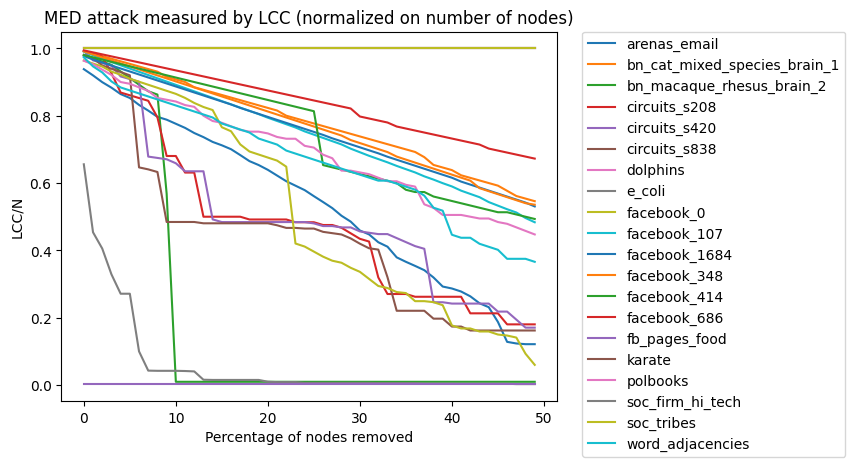

In [214]:
#plot against degree

plt.plot(list(med_attack_arenas_email[0].keys()), list(med_attack_arenas_email[0].values()), label='arenas_email')
plt.plot(list(med_attack_bn_cat_mixed_species_brain_1[0].keys()), list(med_attack_bn_cat_mixed_species_brain_1[0].values()), label='bn_cat_mixed_species_brain_1')
plt.plot(list(med_attack_bn_macaque_rhesus_brain_2[0].keys()), list(med_attack_bn_macaque_rhesus_brain_2[0].values()), label='bn_macaque_rhesus_brain_2')
plt.plot(list(med_attack_circuits_s208[0].keys()), list(med_attack_circuits_s208[0].values()), label='circuits_s208')
plt.plot(list(med_attack_circuits_s420[0].keys()), list(med_attack_circuits_s420[0].values()), label='circuits_s420')
plt.plot(list(med_attack_circuits_s838[0].keys()), list(med_attack_circuits_s838[0].values()), label='circuits_s838')
plt.plot(list(med_attack_dolphins[0].keys()), list(med_attack_dolphins[0].values()), label='dolphins')
plt.plot(list(med_attack_e_coli[0].keys()), list(med_attack_e_coli[0].values()), label='e_coli')
plt.plot(list(med_attack_facebook_0[0].keys()), list(med_attack_facebook_0[0].values()), label='facebook_0')
plt.plot(list(med_attack_facebook_107[0].keys()), list(med_attack_facebook_107[0].values()), label='facebook_107')
plt.plot(list(med_attack_facebook_1684[0].keys()), list(med_attack_facebook_1684[0].values()), label='facebook_1684')
plt.plot(list(med_attack_facebook_348[0].keys()), list(med_attack_facebook_348[0].values()), label='facebook_348')
plt.plot(list(med_attack_facebook_414[0].keys()), list(med_attack_facebook_414[0].values()), label='facebook_414')
plt.plot(list(med_attack_facebook_686[0].keys()), list(med_attack_facebook_686[0].values()), label='facebook_686')
plt.plot(list(med_attack_fb_pages_food[0].keys()), list(med_attack_fb_pages_food[0].values()), label='fb_pages_food')
plt.plot(list(med_attack_karate[0].keys()), list(med_attack_karate[0].values()), label='karate')
plt.plot(list(med_attack_polbooks[0].keys()), list(med_attack_polbooks[0].values()), label='polbooks')
plt.plot(list(med_attack_soc_firm_hi_tech[0].keys()), list(med_attack_soc_firm_hi_tech[0].values()), label='soc_firm_hi_tech')
plt.plot(list(med_attack_soc_tribes[0].keys()), list(med_attack_soc_tribes[0].values()), label='soc_tribes')
plt.plot(list(med_attack_word_adjacencies[0].keys()), list(med_attack_word_adjacencies[0].values()), label='word_adjacencies')

plt.title("MED attack measured by LCC (normalized on number of nodes)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')


Text(0, 0.5, 'LCC/N')

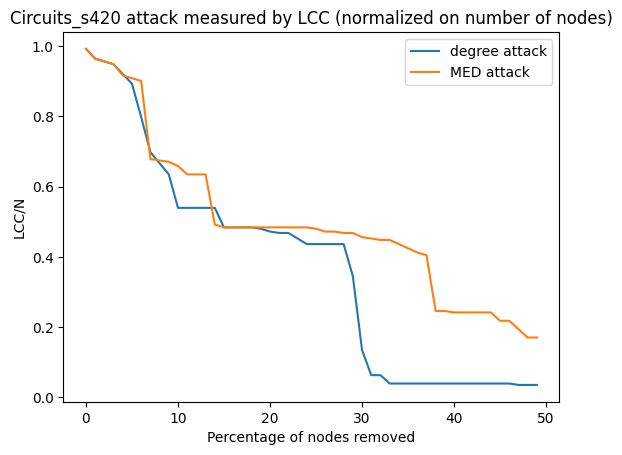

In [215]:
#plot circuits s282 agaisnt degree
plt.plot(list(deg_attack_circuits_s420[0].keys()), list(deg_attack_circuits_s420[0].values()), label='degree attack')
plt.plot(list(med_attack_circuits_s420[0].keys()), list(med_attack_circuits_s420[0].values()), label='MED attack')

plt.title("Circuits_s420 attack measured by LCC (normalized on number of nodes)")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')


Text(0, 0.5, 'LCC/N')

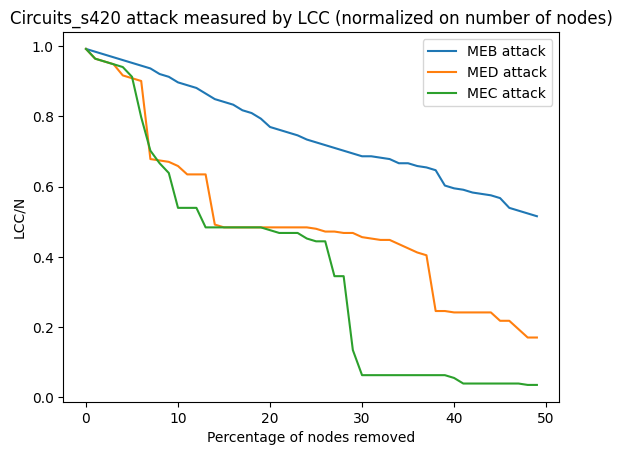

In [217]:
#plot meb, med and mec on circuits s282
plt.plot(list(meb_attack_circuits_s420[0].keys()), list(meb_attack_circuits_s420[0].values()), label='MEB attack')
plt.plot(list(med_attack_circuits_s420[0].keys()), list(med_attack_circuits_s420[0].values()), label='MED attack')
plt.plot(list(mec_attack_circuits_s420[0].keys()), list(mec_attack_circuits_s420[0].values()), label='MEC attack')

plt.title("Circuits_s420 attack measured by LCC (normalized on number of nodes)")
plt.legend()
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')


## proximity centrality

In [40]:
def proximity(node, shortest_paths):
    '''
    takes a graph and a node, returns the proximity centrality of that node
    '''
    sum_of_shortest_paths = sum(shortest_paths[node])
    # print(sum_of_shortest_paths)
    sum_of_all_pairs_shortest_paths = sum(sum(shortest_paths))
    proximity = sum_of_all_pairs_shortest_paths / sum_of_shortest_paths 
    return proximity

def proximity_centrality(G:nx.Graph)->dict:
    '''takes a graph and returns a dictionary of proximity centrality for each node'''
    pr = {}
    shortest_paths = nx.floyd_warshall_numpy(G)
    for node in G.nodes():
        pr[node] = proximity(node, shortest_paths)
    return pr

proximity_centrality_sorted_arenas_email = sorted(proximity_centrality(arenas_email).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_arenas_email_nodes =[x[0] for x in proximity_centrality_sorted_arenas_email]
print("done arenas_email")
proximity_centrality_sorted_bn_cat_mixed_species_brain_1 = sorted(proximity_centrality(bn_cat_mixed_species_brain_1).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_bn_cat_mixed_species_brain_1_nodes =[x[0] for x in proximity_centrality_sorted_bn_cat_mixed_species_brain_1]
print("done bn_cat_mixed_species_brain_1")
proximity_centrality_sorted_bn_macaque_rhesus_brain_2 = sorted(proximity_centrality(bn_macaque_rhesus_brain_2).items(), key=lambda x: x[1], reverse=True)   
proximity_centrality_sorted_bn_macaque_rhesus_brain_2_nodes =[x[0] for x in proximity_centrality_sorted_bn_macaque_rhesus_brain_2]
print("done bn_macaque_rhesus_brain_2")
proximity_centrality_sorted_circuits_s208 = sorted(proximity_centrality(circuits_s208).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_circuits_s208_nodes =[x[0] for x in proximity_centrality_sorted_circuits_s208]
print("done circuits_s208")
proximity_centrality_sorted_circuits_s420 = sorted(proximity_centrality(circuits_s420).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_circuits_s420_nodes =[x[0] for x in proximity_centrality_sorted_circuits_s420]
print("done circuits_s420")
proximity_centrality_sorted_circuits_s838 = sorted(proximity_centrality(circuits_s838).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_circuits_s838_nodes =[x[0] for x in proximity_centrality_sorted_circuits_s838]
print("done circuits_s838")
proximity_centrality_sorted_dolphins = sorted(proximity_centrality(dolphins).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_dolphins_nodes =[x[0] for x in proximity_centrality_sorted_dolphins]
print("done dolphins")
proximity_centrality_sorted_e_coli = sorted(proximity_centrality(e_coli).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_e_coli_nodes =[x[0] for x in proximity_centrality_sorted_e_coli]
print("done e_coli")
proximity_centrality_sorted_facebook_0 = sorted(proximity_centrality(facebook_0).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_facebook_0_nodes =[x[0] for x in proximity_centrality_sorted_facebook_0]
print("done facebook_0")
proximity_centrality_sorted_facebook_107 = sorted(proximity_centrality(facebook_107).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_facebook_107_nodes =[x[0] for x in proximity_centrality_sorted_facebook_107]
print("done facebook_107")
proximity_centrality_sorted_facebook_1684 = sorted(proximity_centrality(facebook_1684).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_facebook_1684_nodes =[x[0] for x in proximity_centrality_sorted_facebook_1684]
print("done facebook_1684")
proximity_centrality_sorted_facebook_348 = sorted(proximity_centrality(facebook_348).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_facebook_348_nodes =[x[0] for x in proximity_centrality_sorted_facebook_348]
print("done facebook_348")
proximity_centrality_sorted_facebook_414 = sorted(proximity_centrality(facebook_414).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_facebook_414_nodes =[x[0] for x in proximity_centrality_sorted_facebook_414]
print("done facebook_414")
proximity_centrality_sorted_facebook_686 = sorted(proximity_centrality(facebook_686).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_facebook_686_nodes =[x[0] for x in proximity_centrality_sorted_facebook_686]
print("done facebook_686")
proximity_centrality_sorted_fb_pages_food = sorted(proximity_centrality(fb_pages_food).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_fb_pages_food_nodes =[x[0] for x in proximity_centrality_sorted_fb_pages_food]
print("done fb_pages_food")
proximity_centrality_sorted_karate = sorted(proximity_centrality(karate).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_karate_nodes =[x[0] for x in proximity_centrality_sorted_karate]
print("done karate")
proximity_centrality_sorted_polbooks = sorted(proximity_centrality(polbooks).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_polbooks_nodes =[x[0] for x in proximity_centrality_sorted_polbooks]
print("done polbooks")
proximity_centrality_sorted_soc_firm_hi_tech = sorted(proximity_centrality(soc_firm_hi_tech).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_soc_firm_hi_tech_nodes =[x[0] for x in proximity_centrality_sorted_soc_firm_hi_tech]
print("done soc_firm_hi_tech")
proximity_centrality_sorted_soc_tribes = sorted(proximity_centrality(soc_tribes).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_soc_tribes_nodes =[x[0] for x in proximity_centrality_sorted_soc_tribes]
print("done soc_tribes")
proximity_centrality_sorted_word_adjacencies = sorted(proximity_centrality(word_adjacencies).items(), key=lambda x: x[1], reverse=True)
proximity_centrality_sorted_word_adjacencies_nodes =[x[0] for x in proximity_centrality_sorted_word_adjacencies]
print("done word_adjacencies")


C:\Users\Joelle\AppData\Local\Temp\ipykernel_10748\1178817341.py:8: RuntimeWarning: invalid value encountered in scalar divide
  proximity = sum_of_all_pairs_shortest_paths / sum_of_shortest_paths


done arenas_email
done bn_cat_mixed_species_brain_1
done bn_macaque_rhesus_brain_2
done circuits_s208
done circuits_s420
done circuits_s838
done dolphins
done e_coli
done facebook_0
done facebook_107
done facebook_1684
done facebook_348
done facebook_414
done facebook_686
done fb_pages_food
done karate
done polbooks
done soc_firm_hi_tech
done soc_tribes
done word_adjacencies


Text(0, 0.5, 'LCC/N')

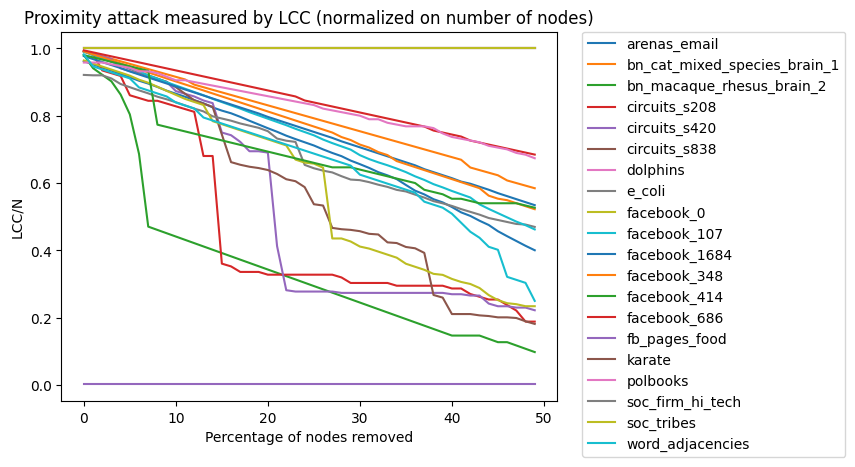

In [41]:
#attacks:::;

proximity_attack_arenas_email = attack(arenas_email, proximity_centrality_sorted_arenas_email_nodes)
proximity_attack_bn_cat_mixed_species_brain_1 = attack(bn_cat_mixed_species_brain_1, proximity_centrality_sorted_bn_cat_mixed_species_brain_1_nodes)
proximity_attack_bn_macaque_rhesus_brain_2 = attack(bn_macaque_rhesus_brain_2, proximity_centrality_sorted_bn_macaque_rhesus_brain_2_nodes)
proximity_attack_circuits_s208 = attack(circuits_s208, proximity_centrality_sorted_circuits_s208_nodes)
proximity_attack_circuits_s420 = attack(circuits_s420, proximity_centrality_sorted_circuits_s420_nodes)
proximity_attack_circuits_s838 = attack(circuits_s838, proximity_centrality_sorted_circuits_s838_nodes)
proximity_attack_dolphins = attack(dolphins, proximity_centrality_sorted_dolphins_nodes)
proximity_attack_e_coli = attack(e_coli, proximity_centrality_sorted_e_coli_nodes)
proximity_attack_facebook_0 = attack(facebook_0, proximity_centrality_sorted_facebook_0_nodes)
proximity_attack_facebook_107 = attack(facebook_107, proximity_centrality_sorted_facebook_107_nodes)
proximity_attack_facebook_1684 = attack(facebook_1684, proximity_centrality_sorted_facebook_1684_nodes)
proximity_attack_facebook_348 = attack(facebook_348, proximity_centrality_sorted_facebook_348_nodes)
proximity_attack_facebook_414 = attack(facebook_414, proximity_centrality_sorted_facebook_414_nodes)
proximity_attack_facebook_686 = attack(facebook_686, proximity_centrality_sorted_facebook_686_nodes)
proximity_attack_fb_pages_food = attack(fb_pages_food, proximity_centrality_sorted_fb_pages_food_nodes)
proximity_attack_karate = attack(karate, proximity_centrality_sorted_karate_nodes)
proximity_attack_polbooks = attack(polbooks, proximity_centrality_sorted_polbooks_nodes)
proximity_attack_soc_firm_hi_tech = attack(soc_firm_hi_tech, proximity_centrality_sorted_soc_firm_hi_tech_nodes)
proximity_attack_soc_tribes = attack(soc_tribes, proximity_centrality_sorted_soc_tribes_nodes)
proximity_attack_word_adjacencies = attack(word_adjacencies, proximity_centrality_sorted_word_adjacencies_nodes)

#plotting all networks
plt.plot(list(proximity_attack_arenas_email[0].keys()), list(proximity_attack_arenas_email[0].values()), label='arenas_email')
plt.plot(list(proximity_attack_bn_cat_mixed_species_brain_1[0].keys()), list(proximity_attack_bn_cat_mixed_species_brain_1[0].values()), label='bn_cat_mixed_species_brain_1')
plt.plot(list(proximity_attack_bn_macaque_rhesus_brain_2[0].keys()), list(proximity_attack_bn_macaque_rhesus_brain_2[0].values()), label='bn_macaque_rhesus_brain_2')
plt.plot(list(proximity_attack_circuits_s208[0].keys()), list(proximity_attack_circuits_s208[0].values()), label='circuits_s208')
plt.plot(list(proximity_attack_circuits_s420[0].keys()), list(proximity_attack_circuits_s420[0].values()), label='circuits_s420')
plt.plot(list(proximity_attack_circuits_s838[0].keys()), list(proximity_attack_circuits_s838[0].values()), label='circuits_s838')
plt.plot(list(proximity_attack_dolphins[0].keys()), list(proximity_attack_dolphins[0].values()), label='dolphins')
plt.plot(list(proximity_attack_e_coli[0].keys()), list(proximity_attack_e_coli[0].values()), label='e_coli')
plt.plot(list(proximity_attack_facebook_0[0].keys()), list(proximity_attack_facebook_0[0].values()), label='facebook_0')
plt.plot(list(proximity_attack_facebook_107[0].keys()), list(proximity_attack_facebook_107[0].values()), label='facebook_107')
plt.plot(list(proximity_attack_facebook_1684[0].keys()), list(proximity_attack_facebook_1684[0].values()), label='facebook_1684')
plt.plot(list(proximity_attack_facebook_348[0].keys()), list(proximity_attack_facebook_348[0].values()), label='facebook_348')
plt.plot(list(proximity_attack_facebook_414[0].keys()), list(proximity_attack_facebook_414[0].values()), label='facebook_414')
plt.plot(list(proximity_attack_facebook_686[0].keys()), list(proximity_attack_facebook_686[0].values()), label='facebook_686')
plt.plot(list(proximity_attack_fb_pages_food[0].keys()), list(proximity_attack_fb_pages_food[0].values()), label='fb_pages_food')
plt.plot(list(proximity_attack_karate[0].keys()), list(proximity_attack_karate[0].values()), label='karate')
plt.plot(list(proximity_attack_polbooks[0].keys()), list(proximity_attack_polbooks[0].values()), label='polbooks')
plt.plot(list(proximity_attack_soc_firm_hi_tech[0].keys()), list(proximity_attack_soc_firm_hi_tech[0].values()), label='soc_firm_hi_tech')
plt.plot(list(proximity_attack_soc_tribes[0].keys()), list(proximity_attack_soc_tribes[0].values()), label='soc_tribes')
plt.plot(list(proximity_attack_word_adjacencies[0].keys()), list(proximity_attack_word_adjacencies[0].values()), label='word_adjacencies')

plt.title("Proximity attack measured by LCC (normalized on number of nodes)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')


## saving as csv

In [42]:
data_frame_lcc = pd.DataFrame(columns=['network', 'betweeness', 'closeness','degree', 'plci', 'percolation','proximity','MEB'])
data_frame_lcc["network"] = ['arenas_email', 'bn_cat_mixed_species_brain_1', 'bn_macaque_rhesus_brain_2', 'circuits_s208', 'circuits_s420', 'circuits_s838', 'dolphins', 'e_coli', 'facebook_0', 'facebook_107', 'facebook_1684', 'facebook_348', 'facebook_414', 'facebook_686', 'fb_pages_food', 'karate', 'polbooks', 'soc_firm_hi_tech', 'soc_tribes', 'word_adjacencies']
data_frame_lcc['betweeness']=[list(bet_attack_arenas_email[0].values()), list(bet_attack_bn_cat_mixed_species_brain_1[0].values()), list(bet_attack_bn_macaque_rhesus_brain_2[0].values()), list(bet_attack_circuits_s208[0].values()), list(bet_attack_circuits_s420[0].values()), list(bet_attack_circuits_s838[0].values()), list(bet_attack_dolphins[0].values()), list(bet_attack_e_coli[0].values()), list(bet_attack_facebook_0[0].values()), list(bet_attack_facebook_107[0].values()), list(bet_attack_facebook_1684[0].values()), list(bet_attack_facebook_348[0].values()), list(bet_attack_facebook_414[0].values()), list(bet_attack_facebook_686[0].values()), list(bet_attack_fb_pages_food[0].values()), list(bet_attack_karate[0].values()), list(bet_attack_polbooks[0].values()), list(bet_attack_soc_firm_hi_tech[0].values()), list(bet_attack_soc_tribes[0].values()), list(bet_attack_word_adjacencies[0].values())]
data_frame_lcc['closeness']=[list(clos_attack_arenas_email[0].values()), list(clos_attack_bn_cat_mixed_species_brain_1[0].values()), list(clos_attack_bn_macaque_rhesus_brain_2[0].values()), list(clos_attack_circuits_s208[0].values()), list(clos_attack_circuits_s420[0].values()), list(clos_attack_circuits_s838[0].values()), list(clos_attack_dolphins[0].values()), list(clos_attack_e_coli[0].values()), list(clos_attack_facebook_0[0].values()), list(clos_attack_facebook_107[0].values()), list(clos_attack_facebook_1684[0].values()), list(clos_attack_facebook_348[0].values()), list(clos_attack_facebook_414[0].values()), list(clos_attack_facebook_686[0].values()), list(clos_attack_fb_pages_food[0].values()), list(clos_attack_karate[0].values()), list(clos_attack_polbooks[0].values()), list(clos_attack_soc_firm_hi_tech[0].values()), list(clos_attack_soc_tribes[0].values()), list(clos_attack_word_adjacencies[0].values())]
data_frame_lcc['degree']=[list(deg_attack_arenas_email[0].values()), list(deg_attack_bn_cat_mixed_species_brain_1[0].values()), list(deg_attack_bn_macaque_rhesus_brain_2[0].values()), list(deg_attack_circuits_s208[0].values()), list(deg_attack_circuits_s420[0].values()), list(deg_attack_circuits_s838[0].values()), list(deg_attack_dolphins[0].values()), list(deg_attack_e_coli[0].values()), list(deg_attack_facebook_0[0].values()), list(deg_attack_facebook_107[0].values()), list(deg_attack_facebook_1684[0].values()), list(deg_attack_facebook_348[0].values()), list(deg_attack_facebook_414[0].values()), list(deg_attack_facebook_686[0].values()), list(deg_attack_fb_pages_food[0].values()), list(deg_attack_karate[0].values()), list(deg_attack_polbooks[0].values()), list(deg_attack_soc_firm_hi_tech[0].values()), list(deg_attack_soc_tribes[0].values()), list(deg_attack_word_adjacencies[0].values())]
data_frame_lcc['plci']=[list(plci_attack_arenas_email[0].values()), list(plci_attack_bn_cat_mixed_species_brain_1[0].values()), list(plci_attack_bn_macaque_rhesus_brain_2[0].values()), list(plci_attack_circuits_s208[0].values()), list(plci_attack_circuits_s420[0].values()), list(plci_attack_circuits_s838[0].values()), list(plci_attack_dolphins[0].values()), list(plci_attack_e_coli[0].values()), list(plci_attack_facebook_0[0].values()), list(plci_attack_facebook_107[0].values()), list(plci_attack_facebook_1684[0].values()), list(plci_attack_facebook_348[0].values()), list(plci_attack_facebook_414[0].values()), list(plci_attack_facebook_686[0].values()), list(plci_attack_fb_pages_food[0].values()), list(plci_attack_karate[0].values()), list(plci_attack_polbooks[0].values()), list(plci_attack_soc_firm_hi_tech[0].values()), list(plci_attack_soc_tribes[0].values()), list(plci_attack_word_adjacencies[0].values())]
data_frame_lcc['percolation']=[list(percolation_attack_arenas_email[0].values()), list(percolation_attack_bn_cat_mixed_species_brain_1[0].values()), list(percolation_attack_bn_macaque_rhesus_brain_2[0].values()), list(percolation_attack_circuits_s208[0].values()), list(percolation_attack_circuits_s420[0].values()), list(percolation_attack_circuits_s838[0].values()), list(percolation_attack_dolphins[0].values()), list(percolation_attack_e_coli[0].values()), list(percolation_attack_facebook_0[0].values()), list(percolation_attack_facebook_107[0].values()), list(percolation_attack_facebook_1684[0].values()), list(percolation_attack_facebook_348[0].values()), list(percolation_attack_facebook_414[0].values()), list(percolation_attack_facebook_686[0].values()), list(percolation_attack_fb_pages_food[0].values()), list(percolation_attack_karate[0].values()), list(percolation_attack_polbooks[0].values()), list(percolation_attack_soc_firm_hi_tech[0].values()), list(percolation_attack_soc_tribes[0].values()), list(percolation_attack_word_adjacencies[0].values())]
data_frame_lcc['proximity']= [list(proximity_attack_arenas_email[0].values()), list(proximity_attack_bn_cat_mixed_species_brain_1[0].values()), list(proximity_attack_bn_macaque_rhesus_brain_2[0].values()), list(proximity_attack_circuits_s208[0].values()), list(proximity_attack_circuits_s420[0].values()), list(proximity_attack_circuits_s838[0].values()), list(proximity_attack_dolphins[0].values()), list(proximity_attack_e_coli[0].values()), list(proximity_attack_facebook_0[0].values()), list(proximity_attack_facebook_107[0].values()), list(proximity_attack_facebook_1684[0].values()), list(proximity_attack_facebook_348[0].values()), list(proximity_attack_facebook_414[0].values()), list(proximity_attack_facebook_686[0].values()), list(proximity_attack_fb_pages_food[0].values()), list(proximity_attack_karate[0].values()), list(proximity_attack_polbooks[0].values()), list(proximity_attack_soc_firm_hi_tech[0].values()), list(proximity_attack_soc_tribes[0].values()), list(proximity_attack_word_adjacencies[0].values())]
data_frame_lcc['MEB']=[list(meb_attack_arenas_email[0].values()), list(meb_attack_bn_cat_mixed_species_brain_1[0].values()), list(meb_attack_bn_macaque_rhesus_brain_2[0].values()), list(meb_attack_circuits_s208[0].values()), list(meb_attack_circuits_s420[0].values()), list(meb_attack_circuits_s838[0].values()), list(meb_attack_dolphins[0].values()), list(meb_attack_e_coli[0].values()), list(meb_attack_facebook_0[0].values()), list(meb_attack_facebook_107[0].values()), list(meb_attack_facebook_1684[0].values()), list(meb_attack_facebook_348[0].values()), list(meb_attack_facebook_414[0].values()), list(meb_attack_facebook_686[0].values()), list(meb_attack_fb_pages_food[0].values()), list(meb_attack_karate[0].values()), list(meb_attack_polbooks[0].values()), list(meb_attack_soc_firm_hi_tech[0].values()), list(meb_attack_soc_tribes[0].values()), list(meb_attack_word_adjacencies[0].values())]
data_frame_lcc['greedy']= [list(arenas_email_greedy_attack[0].values()), list(bn_cat_mixed_species_brain_1_greedy_attack[0].values()), list(bn_macaque_rhesus_brain_2_greedy_attack[0].values()), list(circuits_s208_greedy_attack[0].values()), list(circuits_s420_greedy_attack[0].values()), list(circuits_s838_greedy_attack[0].values()), list(dolphins_greedy_attack[0].values()), list(e_coli_greedy_attack[0].values()), list(facebook_0_greedy_attack[0].values()), list(facebook_107_greedy_attack[0].values()), list(facebook_1684_greedy_attack[0].values()), list(facebook_348_greedy_attack[0].values()), list(facebook_414_greedy_attack[0].values()), list(facebook_686_greedy_attack[0].values()), list(fb_pages_food_greedy_attack[0].values()), list(karate_greedy_attack[0].values()), list(polbooks_greedy_attack[0].values()), list(soc_firm_hi_tech_greedy_attack[0].values()), list(soc_tribes_greedy_attack[0].values()), list(word_adjacencies_greedy_attack[0].values())]
data_frame_lcc['random']=[list(random_arenas_email_attack[0].values()), list(random_bn_cat_mixed_species_brain_1_attack[0].values()), list(random_bn_macaque_rhesus_brain_2_attack[0].values()), list(random_circuits_s208_attack[0].values()), list(random_circuits_s420_attack[0].values()), list(random_circuits_s838_attack[0].values()), list(random_dolphins_attack[0].values()), list(random_e_coli_attack[0].values()), list(random_facebook_0_attack[0].values()), list(random_facebook_107_attack[0].values()), list(random_facebook_1684_attack[0].values()), list(random_facebook_348_attack[0].values()), list(random_facebook_414_attack[0].values()), list(random_facebook_686_attack[0].values()), list(random_fb_pages_food_attack[0].values()), list(random_karate_attack[0].values()), list(random_polbooks_attack[0].values()), list(random_soc_firm_hi_tech_attack[0].values()), list(random_soc_tribes_attack[0].values()), list(random_word_adjacencies_attack[0].values())]


data_frame_lcc.to_csv('../results/networks_lcc_list.csv', index=False)
data_frame_lcc

network  \
0                   arenas_email   
1   bn_cat_mixed_species_brain_1   
2      bn_macaque_rhesus_brain_2   
3                  circuits_s208   
4                  circuits_s420   
5                  circuits_s838   
6                       dolphins   
7                         e_coli   
8                     facebook_0   
9                   facebook_107   
10                 facebook_1684   
11                  facebook_348   
12                  facebook_414   
13                  facebook_686   
14                 fb_pages_food   
15                        karate   
16                      polbooks   
17              soc_firm_hi_tech   
18                    soc_tribes   
19              word_adjacencies   

                                           betweeness  \
0   [0.9550977284733227, 0.9339672477548864, 0.917...   
1   [0.9923076923076923, 0.9846153846153847, 0.976...   
2   [0.9803921568627451, 0.9411764705882353, 0.921...   
3   [0.9918032786885246, 0.9836065573770492, 0.975...   
4   [0.9920634920634921, 0.9841269841269841, 0.976...   
5   [0.990234375, 0.98046875, 0.970703125, 0.96093...   
6   [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
7   [0.4608593290170689, 0.23307828134196587, 0.07...   
8   [0.9279279279279279, 0.8438438438438438, 0.666...   
9   [0.9893617021276596, 0.9738878143133463, 0.964...   
10  [0.9656488549618321, 0.9567430025445293, 0.949...   
11  [0.9464285714285714, 0.9419642857142857, 0.933...   
12  [0.98, 0.9733333333333334, 0.9666666666666667,...   
13  [0.9940476190476191, 0.9880952380952381, 0.982...   
14  [0.002183406113537118, 0.002183406113537118, 0...   
15  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
16  [0.968421052631579, 0.9526315789473684, 0.9473...   
17  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
18  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
19  [0.9821428571428571, 0.9464285714285714, 0.937...   

                                            closeness  \
0   [0.9577390385631274, 0.9429477020602218, 0.930...   
1   [0.9923076923076923, 0.9846153846153847, 0.976...   
2   [0.9803921568627451, 0.9411764705882353, 0.921...   
3   [0.9918032786885246, 0.9836065573770492, 0.934...   
4   [0.9920634920634921, 0.9841269841269841, 0.976...   
5   [0.990234375, 0.98046875, 0.970703125, 0.96093...   
6   [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
7   [0.8210712183637434, 0.7733961153619776, 0.718...   
8   [0.963963963963964, 0.9519519519519519, 0.9429...   
9   [0.9903288201160542, 0.9806576402321083, 0.970...   
10  [0.9758269720101781, 0.9669211195928753, 0.958...   
11  [0.9910714285714286, 0.9821428571428571, 0.973...   
12  [0.98, 0.9733333333333334, 0.9666666666666667,...   
13  [0.9940476190476191, 0.9880952380952381, 0.982...   
14  [0.002183406113537118, 0.002183406113537118, 0...   
15  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
16  [0.968421052631579, 0.9631578947368421, 0.9578...   
17  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
18  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
19  [0.9821428571428571, 0.9464285714285714, 0.937...   

                                               degree  \
0   [0.9466455361859483, 0.9244585314315901, 0.896...   
1   [0.9923076923076923, 0.9846153846153847, 0.976...   
2   [0.9803921568627451, 0.9411764705882353, 0.921...   
3   [0.9918032786885246, 0.9836065573770492, 0.975...   
4   [0.9920634920634921, 0.9642857142857143, 0.956...   
5   [0.98046875, 0.970703125, 0.9609375, 0.921875,...   
6   [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
7   [0.4331959976456739, 0.09181871689228958, 0.02...   
8   [0.963963963963964, 0.9519519519519519, 0.9429...   
9   [0.9903288201160542, 0.9806576402321083, 0.970...   
10  [0.9770992366412213, 0.9681933842239185, 0.958...   
11  [0.9910714285714286, 0.9821428571428571, 0.973...   
12  [0.98, 0.9733333333333334, 0.9666666666666667,...   
13  [0.9940476190476191, 0.9880952380952381, 0.982...   
14  [0.0021834061

In [43]:
data_frame_Inter = pd.DataFrame(columns=['network', 'betweeness', 'closeness','degree', 'plci', 'percolation','proximity','MEB','greedy','random'])
data_frame_Inter["network"] = ['arenas_email', 'bn_cat_mixed_species_brain_1', 'bn_macaque_rhesus_brain_2', 'circuits_s208', 'circuits_s420', 'circuits_s838', 'dolphins', 'e_coli', 'facebook_0', 'facebook_107', 'facebook_1684', 'facebook_348', 'facebook_414', 'facebook_686', 'fb_pages_food', 'karate', 'polbooks', 'soc_firm_hi_tech', 'soc_tribes', 'word_adjacencies']
data_frame_Inter["betweeness"] = [list(bet_attack_arenas_email[1].values()), list(bet_attack_bn_cat_mixed_species_brain_1[1].values()), list(bet_attack_bn_macaque_rhesus_brain_2[1].values()), list(bet_attack_circuits_s208[1].values()), list(bet_attack_circuits_s420[1].values()), list(bet_attack_circuits_s838[1].values()), list(bet_attack_dolphins[1].values()), list(bet_attack_e_coli[1].values()), list(bet_attack_facebook_0[1].values()), list(bet_attack_facebook_107[1].values()), list(bet_attack_facebook_1684[1].values()), list(bet_attack_facebook_348[1].values()), list(bet_attack_facebook_414[1].values()), list(bet_attack_facebook_686[1].values()), list(bet_attack_fb_pages_food[1].values()), list(bet_attack_karate[1].values()), list(bet_attack_polbooks[1].values()), list(bet_attack_soc_firm_hi_tech[1].values()), list(bet_attack_soc_tribes[1].values()), list(bet_attack_word_adjacencies[1].values())]
data_frame_Inter["closeness"] = [list(clos_attack_arenas_email[1].values()), list(clos_attack_bn_cat_mixed_species_brain_1[1].values()), list(clos_attack_bn_macaque_rhesus_brain_2[1].values()), list(clos_attack_circuits_s208[1].values()), list(clos_attack_circuits_s420[1].values()), list(clos_attack_circuits_s838[1].values()), list(clos_attack_dolphins[1].values()), list(clos_attack_e_coli[1].values()), list(clos_attack_facebook_0[1].values()), list(clos_attack_facebook_107[1].values()), list(clos_attack_facebook_1684[1].values()), list(clos_attack_facebook_348[1].values()), list(clos_attack_facebook_414[1].values()), list(clos_attack_facebook_686[1].values()), list(clos_attack_fb_pages_food[1].values()), list(clos_attack_karate[1].values()), list(clos_attack_polbooks[1].values()), list(clos_attack_soc_firm_hi_tech[1].values()), list(clos_attack_soc_tribes[1].values()), list(clos_attack_word_adjacencies[1].values())]
data_frame_Inter["degree"] = [list(deg_attack_arenas_email[1].values()), list(deg_attack_bn_cat_mixed_species_brain_1[1].values()), list(deg_attack_bn_macaque_rhesus_brain_2[1].values()), list(deg_attack_circuits_s208[1].values()), list(deg_attack_circuits_s420[1].values()), list(deg_attack_circuits_s838[1].values()), list(deg_attack_dolphins[1].values()), list(deg_attack_e_coli[1].values()), list(deg_attack_facebook_0[1].values()), list(deg_attack_facebook_107[1].values()), list(deg_attack_facebook_1684[1].values()), list(deg_attack_facebook_348[1].values()), list(deg_attack_facebook_414[1].values()), list(deg_attack_facebook_686[1].values()), list(deg_attack_fb_pages_food[1].values()), list(deg_attack_karate[1].values()), list(deg_attack_polbooks[1].values()), list(deg_attack_soc_firm_hi_tech[1].values()), list(deg_attack_soc_tribes[1].values()), list(deg_attack_word_adjacencies[1].values())]
data_frame_Inter["plci"] = [list(plci_attack_arenas_email[1].values()), list(plci_attack_bn_cat_mixed_species_brain_1[1].values()), list(plci_attack_bn_macaque_rhesus_brain_2[1].values()), list(plci_attack_circuits_s208[1].values()), list(plci_attack_circuits_s420[1].values()), list(plci_attack_circuits_s838[1].values()), list(plci_attack_dolphins[1].values()), list(plci_attack_e_coli[1].values()), list(plci_attack_facebook_0[1].values()), list(plci_attack_facebook_107[1].values()), list(plci_attack_facebook_1684[1].values()), list(plci_attack_facebook_348[1].values()), list(plci_attack_facebook_414[1].values()), list(plci_attack_facebook_686[1].values()), list(plci_attack_fb_pages_food[1].values()), list(plci_attack_karate[1].values()), list(plci_attack_polbooks[1].values()), list(plci_attack_soc_firm_hi_tech[1].values()), list(plci_attack_soc_tribes[1].values()), list(plci_attack_word_adjacencies[1].values())]
data_frame_Inter["percolation"] = [list(percolation_attack_arenas_email[1].values()), list(percolation_attack_bn_cat_mixed_species_brain_1[1].values()), list(percolation_attack_bn_macaque_rhesus_brain_2[1].values()), list(percolation_attack_circuits_s208[1].values()), list(percolation_attack_circuits_s420[1].values()), list(percolation_attack_circuits_s838[1].values()), list(percolation_attack_dolphins[1].values()), list(percolation_attack_e_coli[1].values()), list(percolation_attack_facebook_0[1].values()), list(percolation_attack_facebook_107[1].values()), list(percolation_attack_facebook_1684[1].values()), list(percolation_attack_facebook_348[1].values()), list(percolation_attack_facebook_414[1].values()), list(percolation_attack_facebook_686[1].values()), list(percolation_attack_fb_pages_food[1].values()), list(percolation_attack_karate[1].values()), list(percolation_attack_polbooks[1].values()), list(percolation_attack_soc_firm_hi_tech[1].values()), list(percolation_attack_soc_tribes[1].values()), list(percolation_attack_word_adjacencies[1].values())]
data_frame_Inter["proximity"] = [list(proximity_attack_arenas_email[1].values()), list(proximity_attack_bn_cat_mixed_species_brain_1[1].values()), list(proximity_attack_bn_macaque_rhesus_brain_2[1].values()), list(proximity_attack_circuits_s208[1].values()), list(proximity_attack_circuits_s420[1].values()), list(proximity_attack_circuits_s838[1].values()), list(proximity_attack_dolphins[1].values()), list(proximity_attack_e_coli[1].values()), list(proximity_attack_facebook_0[1].values()), list(proximity_attack_facebook_107[1].values()), list(proximity_attack_facebook_1684[1].values()), list(proximity_attack_facebook_348[1].values()), list(proximity_attack_facebook_414[1].values()), list(proximity_attack_facebook_686[1].values()), list(proximity_attack_fb_pages_food[1].values()), list(proximity_attack_karate[1].values()), list(proximity_attack_polbooks[1].values()), list(proximity_attack_soc_firm_hi_tech[1].values()), list(proximity_attack_soc_tribes[1].values()), list(proximity_attack_word_adjacencies[1].values())]
data_frame_Inter["MEB"] = [list(meb_attack_arenas_email[1].values()), list(meb_attack_bn_cat_mixed_species_brain_1[1].values()), list(meb_attack_bn_macaque_rhesus_brain_2[1].values()), list(meb_attack_circuits_s208[1].values()), list(meb_attack_circuits_s420[1].values()), list(meb_attack_circuits_s838[1].values()), list(meb_attack_dolphins[1].values()), list(meb_attack_e_coli[1].values()), list(meb_attack_facebook_0[1].values()), list(meb_attack_facebook_107[1].values()), list(meb_attack_facebook_1684[1].values()), list(meb_attack_facebook_348[1].values()), list(meb_attack_facebook_414[1].values()), list(meb_attack_facebook_686[1].values()), list(meb_attack_fb_pages_food[1].values()), list(meb_attack_karate[1].values()), list(meb_attack_polbooks[1].values()), list(meb_attack_soc_firm_hi_tech[1].values()), list(meb_attack_soc_tribes[1].values()), list(meb_attack_word_adjacencies[1].values())]
data_frame_Inter['greedy']= [list(arenas_email_greedy_attack[1].values()), list(bn_cat_mixed_species_brain_1_greedy_attack[1].values()), list(bn_macaque_rhesus_brain_2_greedy_attack[1].values()), list(circuits_s208_greedy_attack[1].values()), list(circuits_s420_greedy_attack[1].values()), list(circuits_s838_greedy_attack[1].values()), list(dolphins_greedy_attack[1].values()), list(e_coli_greedy_attack[1].values()), list(facebook_0_greedy_attack[1].values()), list(facebook_107_greedy_attack[1].values()), list(facebook_1684_greedy_attack[1].values()), list(facebook_348_greedy_attack[1].values()), list(facebook_414_greedy_attack[1].values()), list(facebook_686_greedy_attack[1].values()), list(fb_pages_food_greedy_attack[1].values()), list(karate_greedy_attack[1].values()), list(polbooks_greedy_attack[1].values()), list(soc_firm_hi_tech_greedy_attack[1].values()), list(soc_tribes_greedy_attack[1].values()), list(word_adjacencies_greedy_attack[1].values())]
data_frame_Inter['random']=[list(random_arenas_email_attack[1].values()), list(random_bn_cat_mixed_species_brain_1_attack[1].values()), list(random_bn_macaque_rhesus_brain_2_attack[1].values()), list(random_circuits_s208_attack[1].values()), list(random_circuits_s420_attack[1].values()), list(random_circuits_s838_attack[1].values()), list(random_dolphins_attack[1].values()), list(random_e_coli_attack[1].values()), list(random_facebook_0_attack[1].values()), list(random_facebook_107_attack[1].values()), list(random_facebook_1684_attack[1].values()), list(random_facebook_348_attack[1].values()), list(random_facebook_414_attack[1].values()), list(random_facebook_686_attack[1].values()), list(random_fb_pages_food_attack[1].values()), list(random_karate_attack[1].values()), list(random_polbooks_attack[1].values()), list(random_soc_firm_hi_tech_attack[1].values()), list(random_soc_tribes_attack[1].values()), list(random_word_adjacencies_attack[1].values())]


data_frame_Inter.to_csv('../results/networks_Inter_list.csv', index=False)
data_frame_Inter

network  \
0                   arenas_email   
1   bn_cat_mixed_species_brain_1   
2      bn_macaque_rhesus_brain_2   
3                  circuits_s208   
4                  circuits_s420   
5                  circuits_s838   
6                       dolphins   
7                         e_coli   
8                     facebook_0   
9                   facebook_107   
10                 facebook_1684   
11                  facebook_348   
12                  facebook_414   
13                  facebook_686   
14                 fb_pages_food   
15                        karate   
16                      polbooks   
17              soc_firm_hi_tech   
18                    soc_tribes   
19              word_adjacencies   

                                           betweeness  \
0   [0.9820749592612711, 0.9603476371537208, 0.942...   
1   [0.9923076923076923, 0.9846153846153847, 0.976...   
2   [0.9803921568627451, 0.9411764705882353, 0.921...   
3   [0.9918032786885246, 0.9836065573770492, 0.975...   
4   [0.9920634920634921, 0.9841269841269841, 0.976...   
5   [0.990234375, 0.98046875, 0.970703125, 0.96093...   
6   [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
7   [0.49245283018867925, 0.2490566037735849, 0.07...   
8   [0.9537037037037037, 0.8672839506172839, 0.685...   
9   [0.9893617021276596, 0.9738878143133463, 0.964...   
10  [0.9793548387096774, 0.9703225806451613, 0.962...   
11  [0.9464285714285714, 0.9419642857142857, 0.933...   
12  [0.9932432432432432, 0.9864864864864865, 0.979...   
13  [0.9940476190476191, 0.9880952380952381, 0.982...   
14  [0.002183406113537118, 0.002183406113537118, 0...   
15  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
16  [0.9945945945945946, 0.9783783783783784, 0.972...   
17  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
18  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
19  [0.9821428571428571, 0.9464285714285714, 0.937...   

                                            closeness  \
0   [0.9847908745247148, 0.9695817490494296, 0.956...   
1   [0.9923076923076923, 0.9846153846153847, 0.976...   
2   [0.9803921568627451, 0.9411764705882353, 0.921...   
3   [0.9918032786885246, 0.9836065573770492, 0.934...   
4   [0.9920634920634921, 0.9841269841269841, 0.976...   
5   [0.990234375, 0.98046875, 0.970703125, 0.96093...   
6   [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
7   [0.8773584905660378, 0.8264150943396227, 0.767...   
8   [0.9907407407407407, 0.9783950617283951, 0.969...   
9   [0.9903288201160542, 0.9806576402321083, 0.970...   
10  [0.9896774193548387, 0.9806451612903225, 0.971...   
11  [0.9910714285714286, 0.9821428571428571, 0.973...   
12  [0.9932432432432432, 0.9864864864864865, 0.979...   
13  [0.9940476190476191, 0.9880952380952381, 0.982...   
14  [0.002183406113537118, 0.002183406113537118, 0...   
15  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
16  [0.9945945945945946, 0.9891891891891892, 0.983...   
17  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
18  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
19  [0.9821428571428571, 0.9464285714285714, 0.937...   

                                               degree  \
0   [0.973384030418251, 0.9505703422053232, 0.9217...   
1   [0.9923076923076923, 0.9846153846153847, 0.976...   
2   [0.9803921568627451, 0.9411764705882353, 0.921...   
3   [0.9918032786885246, 0.9836065573770492, 0.975...   
4   [0.9920634920634921, 0.9642857142857143, 0.956...   
5   [0.98046875, 0.970703125, 0.9609375, 0.921875,...   
6   [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
7   [0.4628930817610063, 0.09811320754716982, 0.03...   
8   [0.9907407407407407, 0.9783950617283951, 0.969...   
9   [0.9903288201160542, 0.9806576402321083, 0.970...   
10  [0.9909677419354839, 0.9819354838709677, 0.971...   
11  [0.9910714285714286, 0.9821428571428571, 0.973...   
12  [0.9932432432432432, 0.9864864864864865, 0.979...   
13  [0.9940476190476191, 0.9880952380952381, 0.982...   
14  [0.0021834061

In [44]:
data_fram_eff = pd.DataFrame(columns=['network', 'betweeness', 'closeness','degree', 'plci', 'percolation', 'proximity','MEB', 'greedy','random'])
data_fram_eff["network"] = ['arenas_email', 'bn_cat_mixed_species_brain_1', 'bn_macaque_rhesus_brain_2', 'circuits_s208', 'circuits_s420', 'circuits_s838', 'dolphins', 'e_coli', 'facebook_0', 'facebook_107', 'facebook_1684', 'facebook_348', 'facebook_414', 'facebook_686', 'fb_pages_food', 'karate', 'polbooks', 'soc_firm_hi_tech', 'soc_tribes', 'word_adjacencies']
data_fram_eff["betweeness"] = [list(bet_attack_arenas_email[2].values()), list(bet_attack_bn_cat_mixed_species_brain_1[2].values()), list(bet_attack_bn_macaque_rhesus_brain_2[2].values()), list(bet_attack_circuits_s208[2].values()), list(bet_attack_circuits_s420[2].values()), list(bet_attack_circuits_s838[2].values()), list(bet_attack_dolphins[2].values()), list(bet_attack_e_coli[2].values()), list(bet_attack_facebook_0[2].values()), list(bet_attack_facebook_107[2].values()), list(bet_attack_facebook_1684[2].values()), list(bet_attack_facebook_348[2].values()), list(bet_attack_facebook_414[2].values()), list(bet_attack_facebook_686[2].values()), list(bet_attack_fb_pages_food[2].values()), list(bet_attack_karate[2].values()), list(bet_attack_polbooks[2].values()), list(bet_attack_soc_firm_hi_tech[2].values()), list(bet_attack_soc_tribes[2].values()), list(bet_attack_word_adjacencies[2].values())]
data_fram_eff["closeness"] = [list(clos_attack_arenas_email[2].values()), list(clos_attack_bn_cat_mixed_species_brain_1[2].values()), list(clos_attack_bn_macaque_rhesus_brain_2[2].values()), list(clos_attack_circuits_s208[2].values()), list(clos_attack_circuits_s420[2].values()), list(clos_attack_circuits_s838[2].values()), list(clos_attack_dolphins[2].values()), list(clos_attack_e_coli[2].values()), list(clos_attack_facebook_0[2].values()), list(clos_attack_facebook_107[2].values()), list(clos_attack_facebook_1684[2].values()), list(clos_attack_facebook_348[2].values()), list(clos_attack_facebook_414[2].values()), list(clos_attack_facebook_686[2].values()), list(clos_attack_fb_pages_food[2].values()), list(clos_attack_karate[2].values()), list(clos_attack_polbooks[2].values()), list(clos_attack_soc_firm_hi_tech[2].values()), list(clos_attack_soc_tribes[2].values()), list(clos_attack_word_adjacencies[2].values())]
data_fram_eff["degree"] = [list(deg_attack_arenas_email[2].values()), list(deg_attack_bn_cat_mixed_species_brain_1[2].values()), list(deg_attack_bn_macaque_rhesus_brain_2[2].values()), list(deg_attack_circuits_s208[2].values()), list(deg_attack_circuits_s420[2].values()), list(deg_attack_circuits_s838[2].values()), list(deg_attack_dolphins[2].values()), list(deg_attack_e_coli[2].values()), list(deg_attack_facebook_0[2].values()), list(deg_attack_facebook_107[2].values()), list(deg_attack_facebook_1684[2].values()), list(deg_attack_facebook_348[2].values()), list(deg_attack_facebook_414[2].values()), list(deg_attack_facebook_686[2].values()), list(deg_attack_fb_pages_food[2].values()), list(deg_attack_karate[2].values()), list(deg_attack_polbooks[2].values()), list(deg_attack_soc_firm_hi_tech[2].values()), list(deg_attack_soc_tribes[2].values()), list(deg_attack_word_adjacencies[2].values())]
data_fram_eff["plci"] = [list(plci_attack_arenas_email[2].values()), list(plci_attack_bn_cat_mixed_species_brain_1[2].values()), list(plci_attack_bn_macaque_rhesus_brain_2[2].values()), list(plci_attack_circuits_s208[2].values()), list(plci_attack_circuits_s420[2].values()), list(plci_attack_circuits_s838[2].values()), list(plci_attack_dolphins[2].values()), list(plci_attack_e_coli[2].values()), list(plci_attack_facebook_0[2].values()), list(plci_attack_facebook_107[2].values()), list(plci_attack_facebook_1684[2].values()), list(plci_attack_facebook_348[2].values()), list(plci_attack_facebook_414[2].values()), list(plci_attack_facebook_686[2].values()), list(plci_attack_fb_pages_food[2].values()), list(plci_attack_karate[2].values()), list(plci_attack_polbooks[2].values()), list(plci_attack_soc_firm_hi_tech[2].values()), list(plci_attack_soc_tribes[2].values()), list(plci_attack_word_adjacencies[2].values())]
data_fram_eff["percolation"] = [list(percolation_attack_arenas_email[2].values()), list(percolation_attack_bn_cat_mixed_species_brain_1[2].values()), list(percolation_attack_bn_macaque_rhesus_brain_2[2].values()), list(percolation_attack_circuits_s208[2].values()), list(percolation_attack_circuits_s420[2].values()), list(percolation_attack_circuits_s838[2].values()), list(percolation_attack_dolphins[2].values()), list(percolation_attack_e_coli[2].values()), list(percolation_attack_facebook_0[2].values()), list(percolation_attack_facebook_107[2].values()), list(percolation_attack_facebook_1684[2].values()), list(percolation_attack_facebook_348[2].values()), list(percolation_attack_facebook_414[2].values()), list(percolation_attack_facebook_686[2].values()), list(percolation_attack_fb_pages_food[2].values()), list(percolation_attack_karate[2].values()), list(percolation_attack_polbooks[2].values()), list(percolation_attack_soc_firm_hi_tech[2].values()), list(percolation_attack_soc_tribes[2].values()), list(percolation_attack_word_adjacencies[2].values())]
data_fram_eff["proximity"] = [list(proximity_attack_arenas_email[2].values()), list(proximity_attack_bn_cat_mixed_species_brain_1[2].values()), list(proximity_attack_bn_macaque_rhesus_brain_2[2].values()), list(proximity_attack_circuits_s208[2].values()), list(proximity_attack_circuits_s420[2].values()), list(proximity_attack_circuits_s838[2].values()), list(proximity_attack_dolphins[2].values()), list(proximity_attack_e_coli[2].values()), list(proximity_attack_facebook_0[2].values()), list(proximity_attack_facebook_107[2].values()), list(proximity_attack_facebook_1684[2].values()), list(proximity_attack_facebook_348[2].values()), list(proximity_attack_facebook_414[2].values()), list(proximity_attack_facebook_686[2].values()), list(proximity_attack_fb_pages_food[2].values()), list(proximity_attack_karate[2].values()), list(proximity_attack_polbooks[2].values()), list(proximity_attack_soc_firm_hi_tech[2].values()), list(proximity_attack_soc_tribes[2].values()), list(proximity_attack_word_adjacencies[2].values())]
data_fram_eff["MEB"]= [list(meb_attack_arenas_email[2].values()), list(meb_attack_bn_cat_mixed_species_brain_1[2].values()), list(meb_attack_bn_macaque_rhesus_brain_2[2].values()), list(meb_attack_circuits_s208[2].values()), list(meb_attack_circuits_s420[2].values()), list(meb_attack_circuits_s838[2].values()), list(meb_attack_dolphins[2].values()), list(meb_attack_e_coli[2].values()), list(meb_attack_facebook_0[2].values()), list(meb_attack_facebook_107[2].values()), list(meb_attack_facebook_1684[2].values()), list(meb_attack_facebook_348[2].values()), list(meb_attack_facebook_414[2].values()), list(meb_attack_facebook_686[2].values()), list(meb_attack_fb_pages_food[2].values()), list(meb_attack_karate[2].values()), list(meb_attack_polbooks[2].values()), list(meb_attack_soc_firm_hi_tech[2].values()), list(meb_attack_soc_tribes[2].values()), list(meb_attack_word_adjacencies[2].values())]
data_fram_eff['greedy']= [list(arenas_email_greedy_attack[2].values()), list(bn_cat_mixed_species_brain_1_greedy_attack[2].values()), list(bn_macaque_rhesus_brain_2_greedy_attack[2].values()), list(circuits_s208_greedy_attack[2].values()), list(circuits_s420_greedy_attack[2].values()), list(circuits_s838_greedy_attack[2].values()), list(dolphins_greedy_attack[2].values()), list(e_coli_greedy_attack[2].values()), list(facebook_0_greedy_attack[2].values()), list(facebook_107_greedy_attack[2].values()), list(facebook_1684_greedy_attack[2].values()), list(facebook_348_greedy_attack[2].values()), list(facebook_414_greedy_attack[2].values()), list(facebook_686_greedy_attack[2].values()), list(fb_pages_food_greedy_attack[2].values()), list(karate_greedy_attack[2].values()), list(polbooks_greedy_attack[2].values()), list(soc_firm_hi_tech_greedy_attack[2].values()), list(soc_tribes_greedy_attack[2].values()), list(word_adjacencies_greedy_attack[2].values())]
data_fram_eff['random']=[list(random_arenas_email_attack[2].values()), list(random_bn_cat_mixed_species_brain_1_attack[2].values()), list(random_bn_macaque_rhesus_brain_2_attack[2].values()), list(random_circuits_s208_attack[2].values()), list(random_circuits_s420_attack[2].values()), list(random_circuits_s838_attack[2].values()), list(random_dolphins_attack[2].values()), list(random_e_coli_attack[2].values()), list(random_facebook_0_attack[2].values()), list(random_facebook_107_attack[2].values()), list(random_facebook_1684_attack[2].values()), list(random_facebook_348_attack[2].values()), list(random_facebook_414_attack[2].values()), list(random_facebook_686_attack[2].values()), list(random_fb_pages_food_attack[2].values()), list(random_karate_attack[2].values()), list(random_polbooks_attack[2].values()), list(random_soc_firm_hi_tech_attack[2].values()), list(random_soc_tribes_attack[2].values()), list(random_word_adjacencies_attack[2].values())]

data_fram_eff.to_csv('../results/networks_eff_list.csv', index=False)
data_fram_eff

network  \
0                   arenas_email   
1   bn_cat_mixed_species_brain_1   
2      bn_macaque_rhesus_brain_2   
3                  circuits_s208   
4                  circuits_s420   
5                  circuits_s838   
6                       dolphins   
7                         e_coli   
8                     facebook_0   
9                   facebook_107   
10                 facebook_1684   
11                  facebook_348   
12                  facebook_414   
13                  facebook_686   
14                 fb_pages_food   
15                        karate   
16                      polbooks   
17              soc_firm_hi_tech   
18                    soc_tribes   
19              word_adjacencies   

                                           betweeness  \
0   [0.19635336207253276, 0.18435340419315172, 0.1...   
1   [0.48743540051675127, 0.48165805446189836, 0.4...   
2   [0.5265181518151782, 0.4832491582491574, 0.464...   
3   [0.23118702272627661, 0.20939890602705952, 0.1...   
4   [0.17625178248796644, 0.16594453842564094, 0.1...   
5   [0.13726501697865925, 0.12631596111674517, 0.1...   
6   [0.37921419757749875, 0.37921419757749875, 0.3...   
7   [0.03886282854028239, 0.010354378637174758, 0....   
8   [0.2955324983676288, 0.25866035112251046, 0.21...   
9   [0.3701468606102109, 0.36257479663898473, 0.35...   
10  [0.3541803649102231, 0.34623764039271987, 0.34...   
11  [0.4536259271552571, 0.45425339500674267, 0.44...   
12  [0.44077030050184535, 0.4425916441222564, 0.43...   
13  [0.4702680697126323, 0.4657163719815113, 0.464...   
14  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
15  [0.4920083184789052, 0.4920083184789052, 0.492...   
16  [0.2498552774979454, 0.23884626091217365, 0.23...   
17  [0.5081439393939378, 0.5081439393939378, 0.508...   
18  [0.7375, 0.7375, 0.7375, 0.7375, 0.7375, 0.737...   
19  [0.4170297570297475, 0.3872254656658399, 0.374...   

                                            closeness  \
0   [0.19830517157353364, 0.19040945121527966, 0.1...   
1   [0.48817829457359785, 0.48432988845139957, 0.4...   
2   [0.5265181518151782, 0.4832491582491574, 0.464...   
3   [0.23118702272627661, 0.20939890602705952, 0.1...   
4   [0.17625178248796644, 0.16594453842564094, 0.1...   
5   [0.13610094670676784, 0.13381734983093263, 0.1...   
6   [0.37921419757749875, 0.37921419757749875, 0.3...   
7   [0.1677177059387689, 0.1441189684933956, 0.118...   
8   [0.3009453393925375, 0.29202344546392073, 0.28...   
9   [0.3714949650705805, 0.36638400088084494, 0.36...   
10  [0.35808045177338893, 0.35391038876601055, 0.3...   
11  [0.47310542604653727, 0.4629361784840765, 0.45...   
12  [0.45031527212736355, 0.4474268729370809, 0.43...   
13  [0.4702680697126323, 0.4657163719815113, 0.461...   
14  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
15  [0.4920083184789052, 0.4920083184789052, 0.492...   
16  [0.2526195032780466, 0.25204178383150205, 0.24...   
17  [0.5081439393939378, 0.5081439393939378, 0.508...   
18  [0.7375, 0.7375, 0.7375, 0.7375, 0.7375, 0.737...   
19  [0.4170297570297475, 0.3872254656658399, 0.376...   

                                               degree  \
0   [0.1954950767443035, 0.18263397669254394, 0.17...   
1   [0.48817829457359785, 0.48432988845139957, 0.4...   
2   [0.5265181518151782, 0.4832491582491574, 0.464...   
3   [0.23284596257736437, 0.20939890602705952, 0.2...   
4   [0.17736190003662683, 0.16927160747196232, 0.1...   
5   [0.14537169176947334, 0.14104664391333618, 0.1...   
6   [0.37921419757749875, 0.37921419757749875, 0.3...   
7   [0.03231247821285814, 0.003703929034169234, 0....   
8   [0.31635238023468615, 0.3072083595160985, 0.29...   
9   [0.3757994905600055, 0.3724020608321392, 0.369...   
10  [0.3627260278744029, 0.36005799561053425, 0.35...   
11  [0.47310542604653727, 0.4668562006232676, 0.46...   
12  [0.4505964257642225, 0.4473211549742214, 0.445...   
13  [0.47538657624518066, 0.4657163719815113, 0.46...   
14  [0.0, 0.0, 0.

## computing robustness metrics:

In [137]:
bet_arenas_email_R = compute_r(arenas_email, betweenness_centrality_sorted_arenas_email)
print("betwenness done")
clos_arenas_email_R = compute_r(arenas_email, closeness_centrality_sorted_arenas_email)
print("closeness done")
deg_arenas_email_R = compute_r(arenas_email, degree_centrality_sorted_arenas_email)
print("degree done")
plci_arenas_email_R = compute_r(arenas_email, plci_arenas_email_nodes)
print("plci done")
percolation_arenas_email_R = compute_r(arenas_email, percolation_arenas_email_nodes)
print("percolation done")
proximity_arenas_email_R = compute_r(arenas_email, proximity_centrality_sorted_arenas_email)
print("proximity done")
meb_arenas_email_R = compute_r(arenas_email, meb_centrality_sorted_arenas_email)
print("meb done")
#adding them to a dictionary
arenas_email_R = {"betweenness":bet_arenas_email_R, "closeness":clos_arenas_email_R, "degree":deg_arenas_email_R, "plci":plci_arenas_email_R, "percolation":percolation_arenas_email_R, "proximity":proximity_arenas_email_R, "meb":meb_arenas_email_R}
#making it a data frame for vi
arenas_email_R_df = pd.DataFrame.from_dict(arenas_email_R, orient='index')


betwenness done
closeness done
degree done
plci done
percolation done
proximity done
meb done


In [138]:
bet_arenas_email_R_100_batches = compute_r_100_batches(arenas_email, betweenness_centrality_sorted_arenas_email)
print("betwenness done")
clos_arenas_email_R_100_batches = compute_r_100_batches(arenas_email, closeness_centrality_sorted_arenas_email)
print("closeness done")
deg_arenas_email_R_100_batches = compute_r_100_batches(arenas_email, degree_centrality_sorted_arenas_email)
print("degree done")
plci_arenas_email_R_100_batches = compute_r_100_batches(arenas_email, plci_arenas_email_nodes)
print("plci done")
percolation_arenas_email_R_100_batches = compute_r_100_batches(arenas_email, percolation_arenas_email_nodes)
print("percolation done")
proximity_arenas_email_R_100_batches = compute_r_100_batches(arenas_email, proximity_centrality_sorted_arenas_email)
print("proximity done")
meb_arenas_email_R_100_batches = compute_r_100_batches(arenas_email, meb_centrality_sorted_arenas_email)
print("meb done")
#adding them to a dictionary
arenas_email_R_100_batches = {"betweenness":bet_arenas_email_R_100_batches, "closeness":clos_arenas_email_R_100_batches, "degree":deg_arenas_email_R_100_batches, "plci":plci_arenas_email_R_100_batches, "percolation":percolation_arenas_email_R_100_batches, "proximity":proximity_arenas_email_R_100_batches, "meb":meb_arenas_email_R_100_batches}
#making it a data frame for vi
arenas_email_R_100_batches_df = pd.DataFrame.from_dict(arenas_email_R_100_batches, orient='index')

betwenness done
closeness done
degree done
plci done
percolation done
proximity done
meb done


In [139]:
#merge arenas_email_R_df and arenas_email_R_batches_df (they have common rows)
arenas_email_R_df.columns=["arenas_email R (seq)"]
arenas_email_R_100_batches_df.columns=["arenas_email R (100 batches)"]
arenas_email_R_df.merge(arenas_email_R_100_batches_df, left_index=True, right_index=True)


arenas_email R (seq)  arenas_email R (100 batches)
betweenness              0.186482                      0.190343
closeness                0.302658                      0.293439
degree                   0.182993                      0.186397
plci                     0.407373                      0.355283
percolation              0.387690                      0.338558
proximity                0.403005                      0.351992
meb                      0.345548                      0.310423

In [164]:
#circuits s208 R
bet_circuits_s208_R = compute_r(circuits_s208, betweenness_centrality_sorted_circuits_s208)
# print("betwenness done")
clos_circuits_s208_R = compute_r(circuits_s208, closeness_centrality_sorted_circuits_s208)
# print("closeness done")
deg_circuits_s208_R = compute_r(circuits_s208, degree_centrality_sorted_circuits_s208)
# print("degree done")
plci_circuits_s208_R = compute_r(circuits_s208, plci_circuits_s208_nodes)
# print("plci done")
percolation_circuits_s208_R = compute_r(circuits_s208, percolation_circuits_s208_nodes)
# print("percolation done")
proximity_circuits_s208_R = compute_r(circuits_s208, proximity_centrality_sorted_circuits_s208)
# print("proximity done")
meb_circuits_s208_R = compute_r(circuits_s208, meb_centrality_sorted_circuits_s208)
# print("meb done")
circuits_s208_R = {"betweenness":bet_circuits_s208_R, "closeness":clos_circuits_s208_R, "degree":deg_circuits_s208_R, "plci":plci_circuits_s208_R, "percolation":percolation_circuits_s208_R, "proximity":proximity_circuits_s208_R, "meb":meb_circuits_s208_R}
circuits_s208_R_df = pd.DataFrame.from_dict(circuits_s208_R, orient='index')
circuits_s208_R_df.columns=["circuits_s208 R"]
circuits_s208_R_df

circuits_s208 R
betweenness         0.184897
closeness           0.243214
degree              0.172601
plci                0.257592
percolation         0.222252
proximity           0.243214
meb                 0.396668

In [165]:
#facebook
bet_facebook_0_R = compute_r(facebook_0, betweenness_centrality_sorted_facebook_0)
# print("betwenness done")
clos_facebook_0_R = compute_r(facebook_0, closeness_centrality_sorted_facebook_0)
# print("closeness done")
deg_facebook_0_R = compute_r(facebook_0, degree_centrality_sorted_facebook_0)
# print("degree done")
plci_facebook_0_R = compute_r(facebook_0, plci_facebook_0_nodes)
# print("plci done")
percolation_facebook_0_R = compute_r(facebook_0, percolation_facebook_0_nodes)
# print("percolation done")
proximity_facebook_0_R = compute_r(facebook_0, proximity_centrality_sorted_facebook_0)
# print("proximity done")
meb_facebook_0_R = compute_r(facebook_0, meb_centrality_sorted_facebook_0)
# print("meb done")
facebook_0_R = {"betweenness":bet_facebook_0_R, "closeness":clos_facebook_0_R, "degree":deg_facebook_0_R, "plci":plci_facebook_0_R, "percolation":percolation_facebook_0_R, "proximity":proximity_facebook_0_R, "meb":meb_facebook_0_R}
facebook_0_R_df = pd.DataFrame.from_dict(facebook_0_R, orient='index')
facebook_0_R_df.columns=["facebook_0 R"]
facebook_0_R_df


facebook_0 R
betweenness      0.226704
closeness        0.322845
degree           0.256806
plci             0.408940
percolation      0.301202
proximity        0.300914
meb              0.486414

In [151]:
#facebook 414

bet_facebook_414_R = compute_r(facebook_414, betweenness_centrality_sorted_facebook_414)
clos_facebook_414_R = compute_r(facebook_414, closeness_centrality_sorted_facebook_414)
deg_facebook_414_R = compute_r(facebook_414, degree_centrality_sorted_facebook_414)
plci_facebook_414_R = compute_r(facebook_414, plci_facebook_414_nodes)
percolation_facebook_414_R = compute_r(facebook_414, percolation_facebook_414_nodes)
proximity_facebook_414_R = compute_r(facebook_414, proximity_centrality_sorted_facebook_414)
meb_facebook_414_R = compute_r(facebook_414, meb_centrality_sorted_facebook_414)
facebook_414_R = {"betweenness":bet_facebook_414_R, "closeness":clos_facebook_414_R, "degree":deg_facebook_414_R, "plci":plci_facebook_414_R, "percolation":percolation_facebook_414_R, "proximity":proximity_facebook_414_R, "meb":meb_facebook_414_R}
facebook_414_R_df = pd.DataFrame.from_dict(facebook_414_R, orient='index')
facebook_414_R_df.columns=["facebook_414 R"]
facebook_414_R_df

facebook_414 R
betweenness        0.262267
closeness          0.369600
degree             0.377244
plci               0.450844
percolation        0.402933
proximity          0.367600
meb                0.362978

In [156]:
print(sorted([x[1] for x in betweenness_centrality_sorted_karate]))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006313131313131313, 0.0006313131313131313, 0.0008477633477633478, 0.0017947330447330447, 0.0022095959595959595, 0.0029220779220779218, 0.0038404882154882154, 0.011909271284271283, 0.014411976911976909, 0.017613636363636363, 0.02233345358345358, 0.029987373737373736, 0.02998737373737374, 0.03247504810004811, 0.04586339586339586, 0.053936688311688304, 0.05592682780182781, 0.13827561327561325, 0.14365680615680618, 0.145247113997114, 0.30407497594997596, 0.43763528138528146]


# Statistical analysis

# Viz

### line graphs

Text(0, 0.5, 'Relative size of LCC')

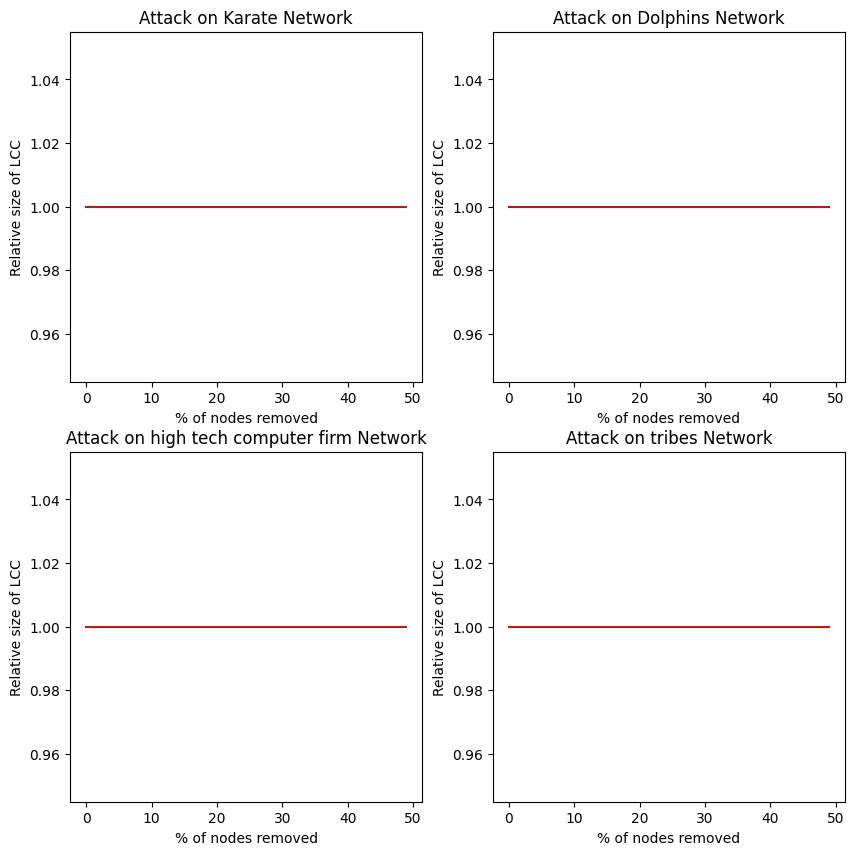

In [232]:
figure=plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
#plot betweeness attack for karate
plt.plot(list(bet_attack_karate[0].keys()), list(bet_attack_karate[0].values()), label="attack", color="#AE2012")
plt.title("Attack on Karate Network")
plt.xlabel("% of nodes removed")
plt.ylabel("Relative size of LCC")

#plt on deolphins
plt.subplot(2, 2, 2)
plt.plot(list(bet_attack_dolphins[0].keys()), list(bet_attack_dolphins[0].values()), label="attack", color="#AE2012")
plt.title("Attack on Dolphins Network")
plt.xlabel("% of nodes removed")
plt.ylabel("Relative size of LCC")

#plt on soc_firm_hi_tech
plt.subplot(2, 2, 3)
plt.plot(list(bet_attack_soc_firm_hi_tech[0].keys()), list(bet_attack_soc_firm_hi_tech[0].values()), label="attack", color="#AE2012")
plt.title("Attack on high tech computer firm Network")
plt.xlabel("% of nodes removed")
plt.ylabel("Relative size of LCC")

#plot on soc tribes
plt.subplot(2, 2, 4)
plt.plot(list(bet_attack_soc_tribes[0].keys()), list(bet_attack_soc_tribes[0].values()), label="attack", color="#AE2012")
plt.title("Attack on tribes Network")
plt.xlabel("% of nodes removed")
plt.ylabel("Relative size of LCC")


Text(0, 0.5, 'LCC/N')

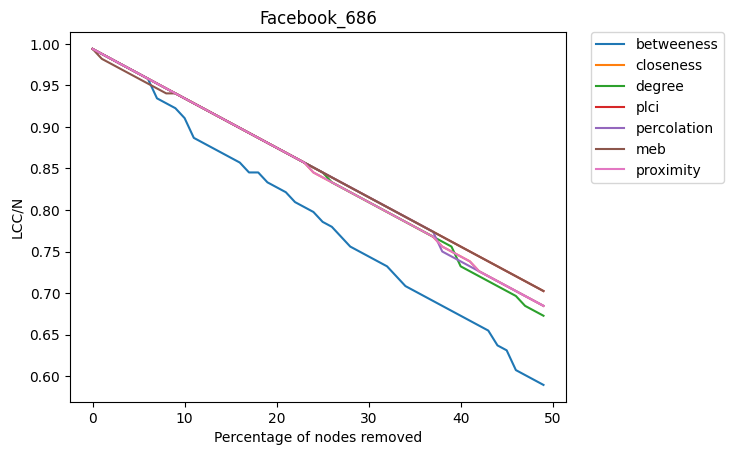

In [45]:
#plot all centralities on facebook_686
plt.plot(list(bet_attack_facebook_686[0].keys()), list(bet_attack_facebook_686[0].values()), label='betweeness')
plt.plot(list(clos_attack_facebook_686[0].keys()), list(clos_attack_facebook_686[0].values()), label='closeness')
plt.plot(list(deg_attack_facebook_686[0].keys()), list(deg_attack_facebook_686[0].values()), label='degree')
plt.plot(list(plci_attack_facebook_686[0].keys()), list(plci_attack_facebook_686[0].values()), label='plci')
plt.plot(list(percolation_attack_facebook_686[0].keys()), list(percolation_attack_facebook_686[0].values()), label='percolation')
plt.plot(list(meb_attack_facebook_686[0].keys()), list(meb_attack_facebook_686[0].values()), label='meb')
plt.plot(list(proximity_attack_facebook_686[0].keys()), list(proximity_attack_facebook_686[0].values()), label='proximity')
plt.title("Facebook_686")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

Text(0, 0.5, 'global topological efficiency')

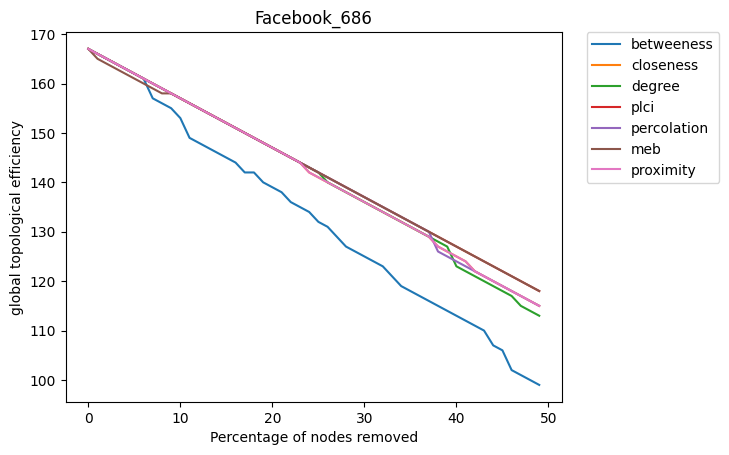

In [46]:
#same but use attacl[2] for efficiency
plt.plot(list(bet_attack_facebook_686[3].keys()), list(bet_attack_facebook_686[3].values()), label='betweeness')
plt.plot(list(clos_attack_facebook_686[3].keys()), list(clos_attack_facebook_686[3].values()), label='closeness')
plt.plot(list(deg_attack_facebook_686[3].keys()), list(deg_attack_facebook_686[3].values()), label='degree')    
plt.plot(list(plci_attack_facebook_686[3].keys()), list(plci_attack_facebook_686[3].values()), label='plci')
plt.plot(list(percolation_attack_facebook_686[3].keys()), list(percolation_attack_facebook_686[3].values()), label='percolation')
plt.plot(list(meb_attack_facebook_686[3].keys()), list(meb_attack_facebook_686[3].values()), label='meb')
plt.plot(list(proximity_attack_facebook_686[3].keys()), list(proximity_attack_facebook_686[3].values()), label='proximity') 
plt.title("Facebook_686")   
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Percentage of nodes removed')   
plt.ylabel('global topological efficiency')


Text(0, 0.5, 'global topological efficiency')

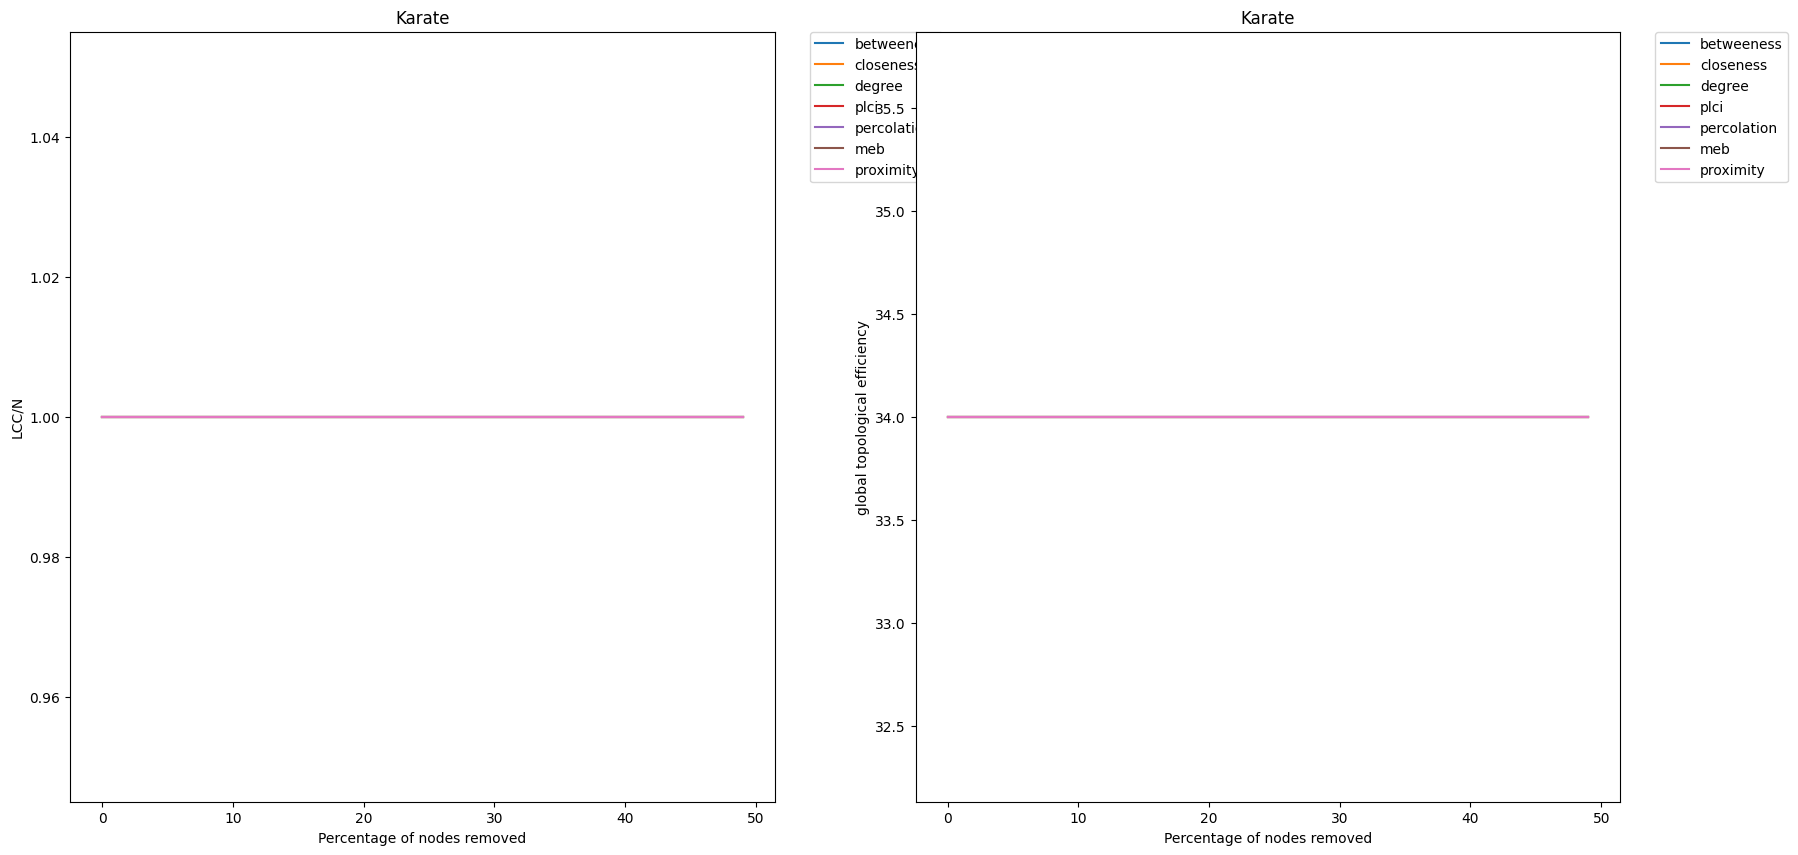

In [47]:
#plotting karate using efficnecy and lcc uing 2 plots next to each otehr:

#increase figure size
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(list(bet_attack_karate[0].keys()), list(bet_attack_karate[0].values()), label='betweeness')
plt.plot(list(clos_attack_karate[0].keys()), list(clos_attack_karate[0].values()), label='closeness')
plt.plot(list(deg_attack_karate[0].keys()), list(deg_attack_karate[0].values()), label='degree')
plt.plot(list(plci_attack_karate[0].keys()), list(plci_attack_karate[0].values()), label='plci')
plt.plot(list(percolation_attack_karate[0].keys()), list(percolation_attack_karate[0].values()), label='percolation')
plt.plot(list(meb_attack_karate[0].keys()), list(meb_attack_karate[0].values()), label='meb')
plt.plot(list(proximity_attack_karate[0].keys()), list(proximity_attack_karate[0].values()), label='proximity')
plt.title("Karate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Percentage of nodes removed')
plt.ylabel('LCC/N')

plt.subplot(1,2,2)
plt.plot(list(bet_attack_karate[3].keys()), list(bet_attack_karate[3].values()), label='betweeness')
plt.plot(list(clos_attack_karate[3].keys()), list(clos_attack_karate[3].values()), label='closeness')
plt.plot(list(deg_attack_karate[3].keys()), list(deg_attack_karate[3].values()), label='degree')
plt.plot(list(plci_attack_karate[3].keys()), list(plci_attack_karate[3].values()), label='plci')
plt.plot(list(percolation_attack_karate[3].keys()), list(percolation_attack_karate[3].values()), label='percolation')
plt.plot(list(meb_attack_karate[3].keys()), list(meb_attack_karate[3].values()), label='meb')
plt.plot(list(proximity_attack_karate[3].keys()), list(proximity_attack_karate[3].values()), label='proximity')
plt.title("Karate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Percentage of nodes removed')
plt.ylabel('global topological efficiency')


### boxplots

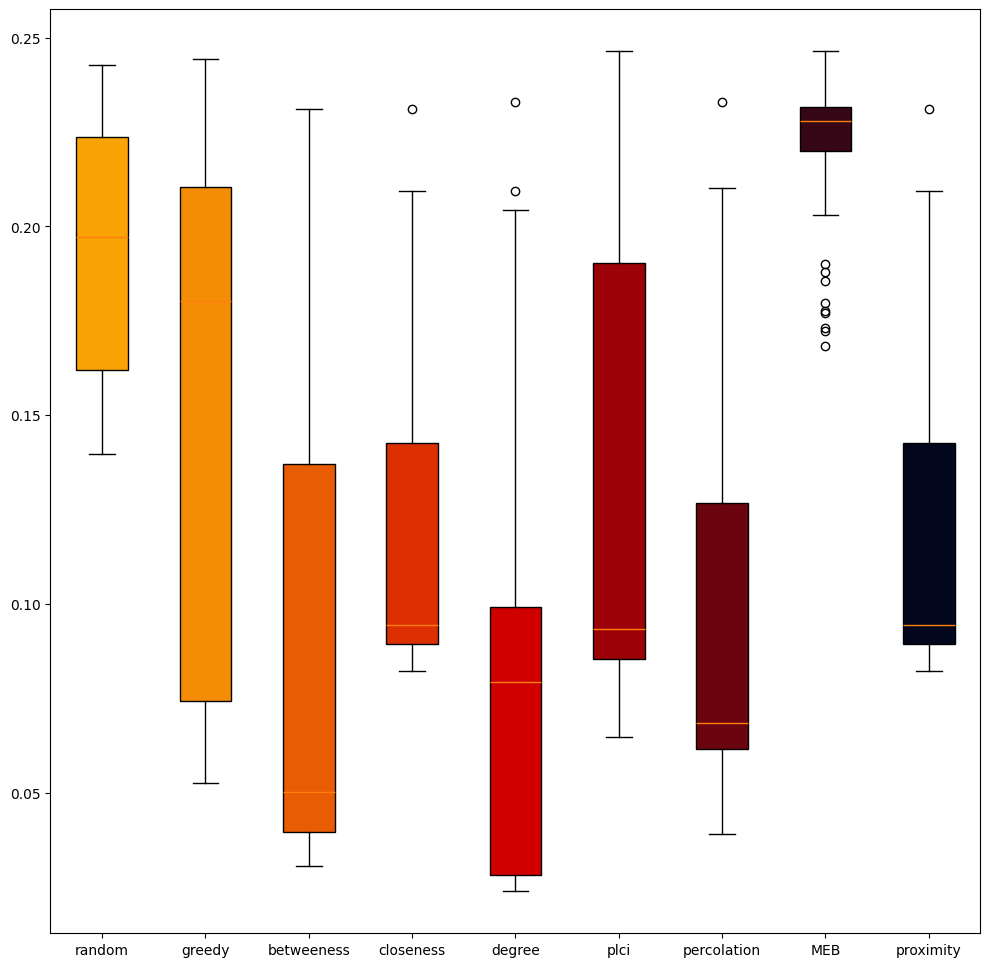

In [58]:
#whiskers plot of effieciency in different attacks on circuits_s208
plt.figure(figsize=(12,12))


box = plt.boxplot([list(random_circuits_s208_attack[2].values()), 
                   list(circuits_s208_greedy_attack[2].values()),
                   list(bet_attack_circuits_s208[2].values()), 
                   list(clos_attack_circuits_s208[2].values()), 
                   list(deg_attack_circuits_s208[2].values()), 
                   list(plci_attack_circuits_s208[2].values()), 
                   list(percolation_attack_circuits_s208[2].values()), 
                   list(meb_attack_circuits_s208[2].values()), 
                   list(proximity_attack_circuits_s208[2].values())], 
                  labels=['random', 'greedy','betweeness', 'closeness', 'degree', 'plci', 'percolation', 'MEB', 'proximity'], 
                  patch_artist=True)

colors = ['#faa307', '#f48c06', '#e85d04', '#dc2f02', '#d00000', '#9d0208', '#6a040f', '#370617', '#03071e']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

### network viz

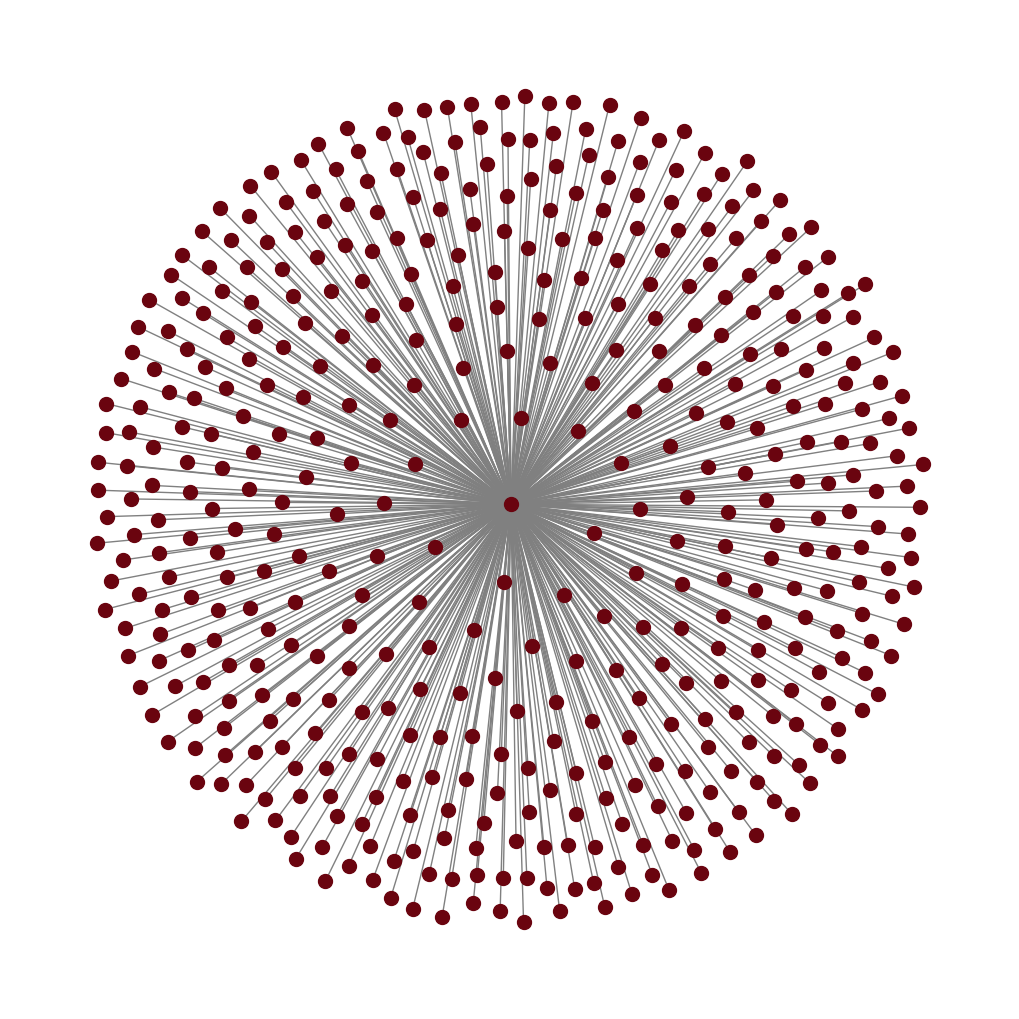

In [61]:
#enlarge the figure size
plt.figure(figsize=(10,10))
nx.draw(fb_pages_food,  node_size=100, node_color='#6a040f', edge_color='grey')

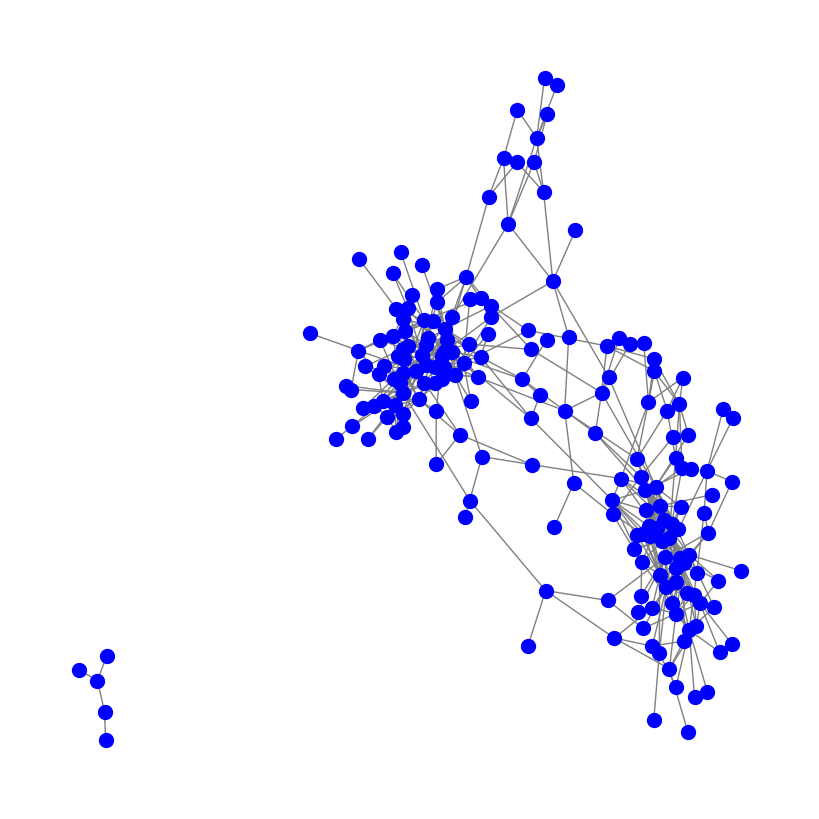

In [50]:
figura = plt.figure(figsize=(8,8))
layout= nx.spring_layout(polbooks)
nx.draw(polbooks, font_weight='bold', node_size=100, node_color='blue', edge_color='grey', pos=layout)

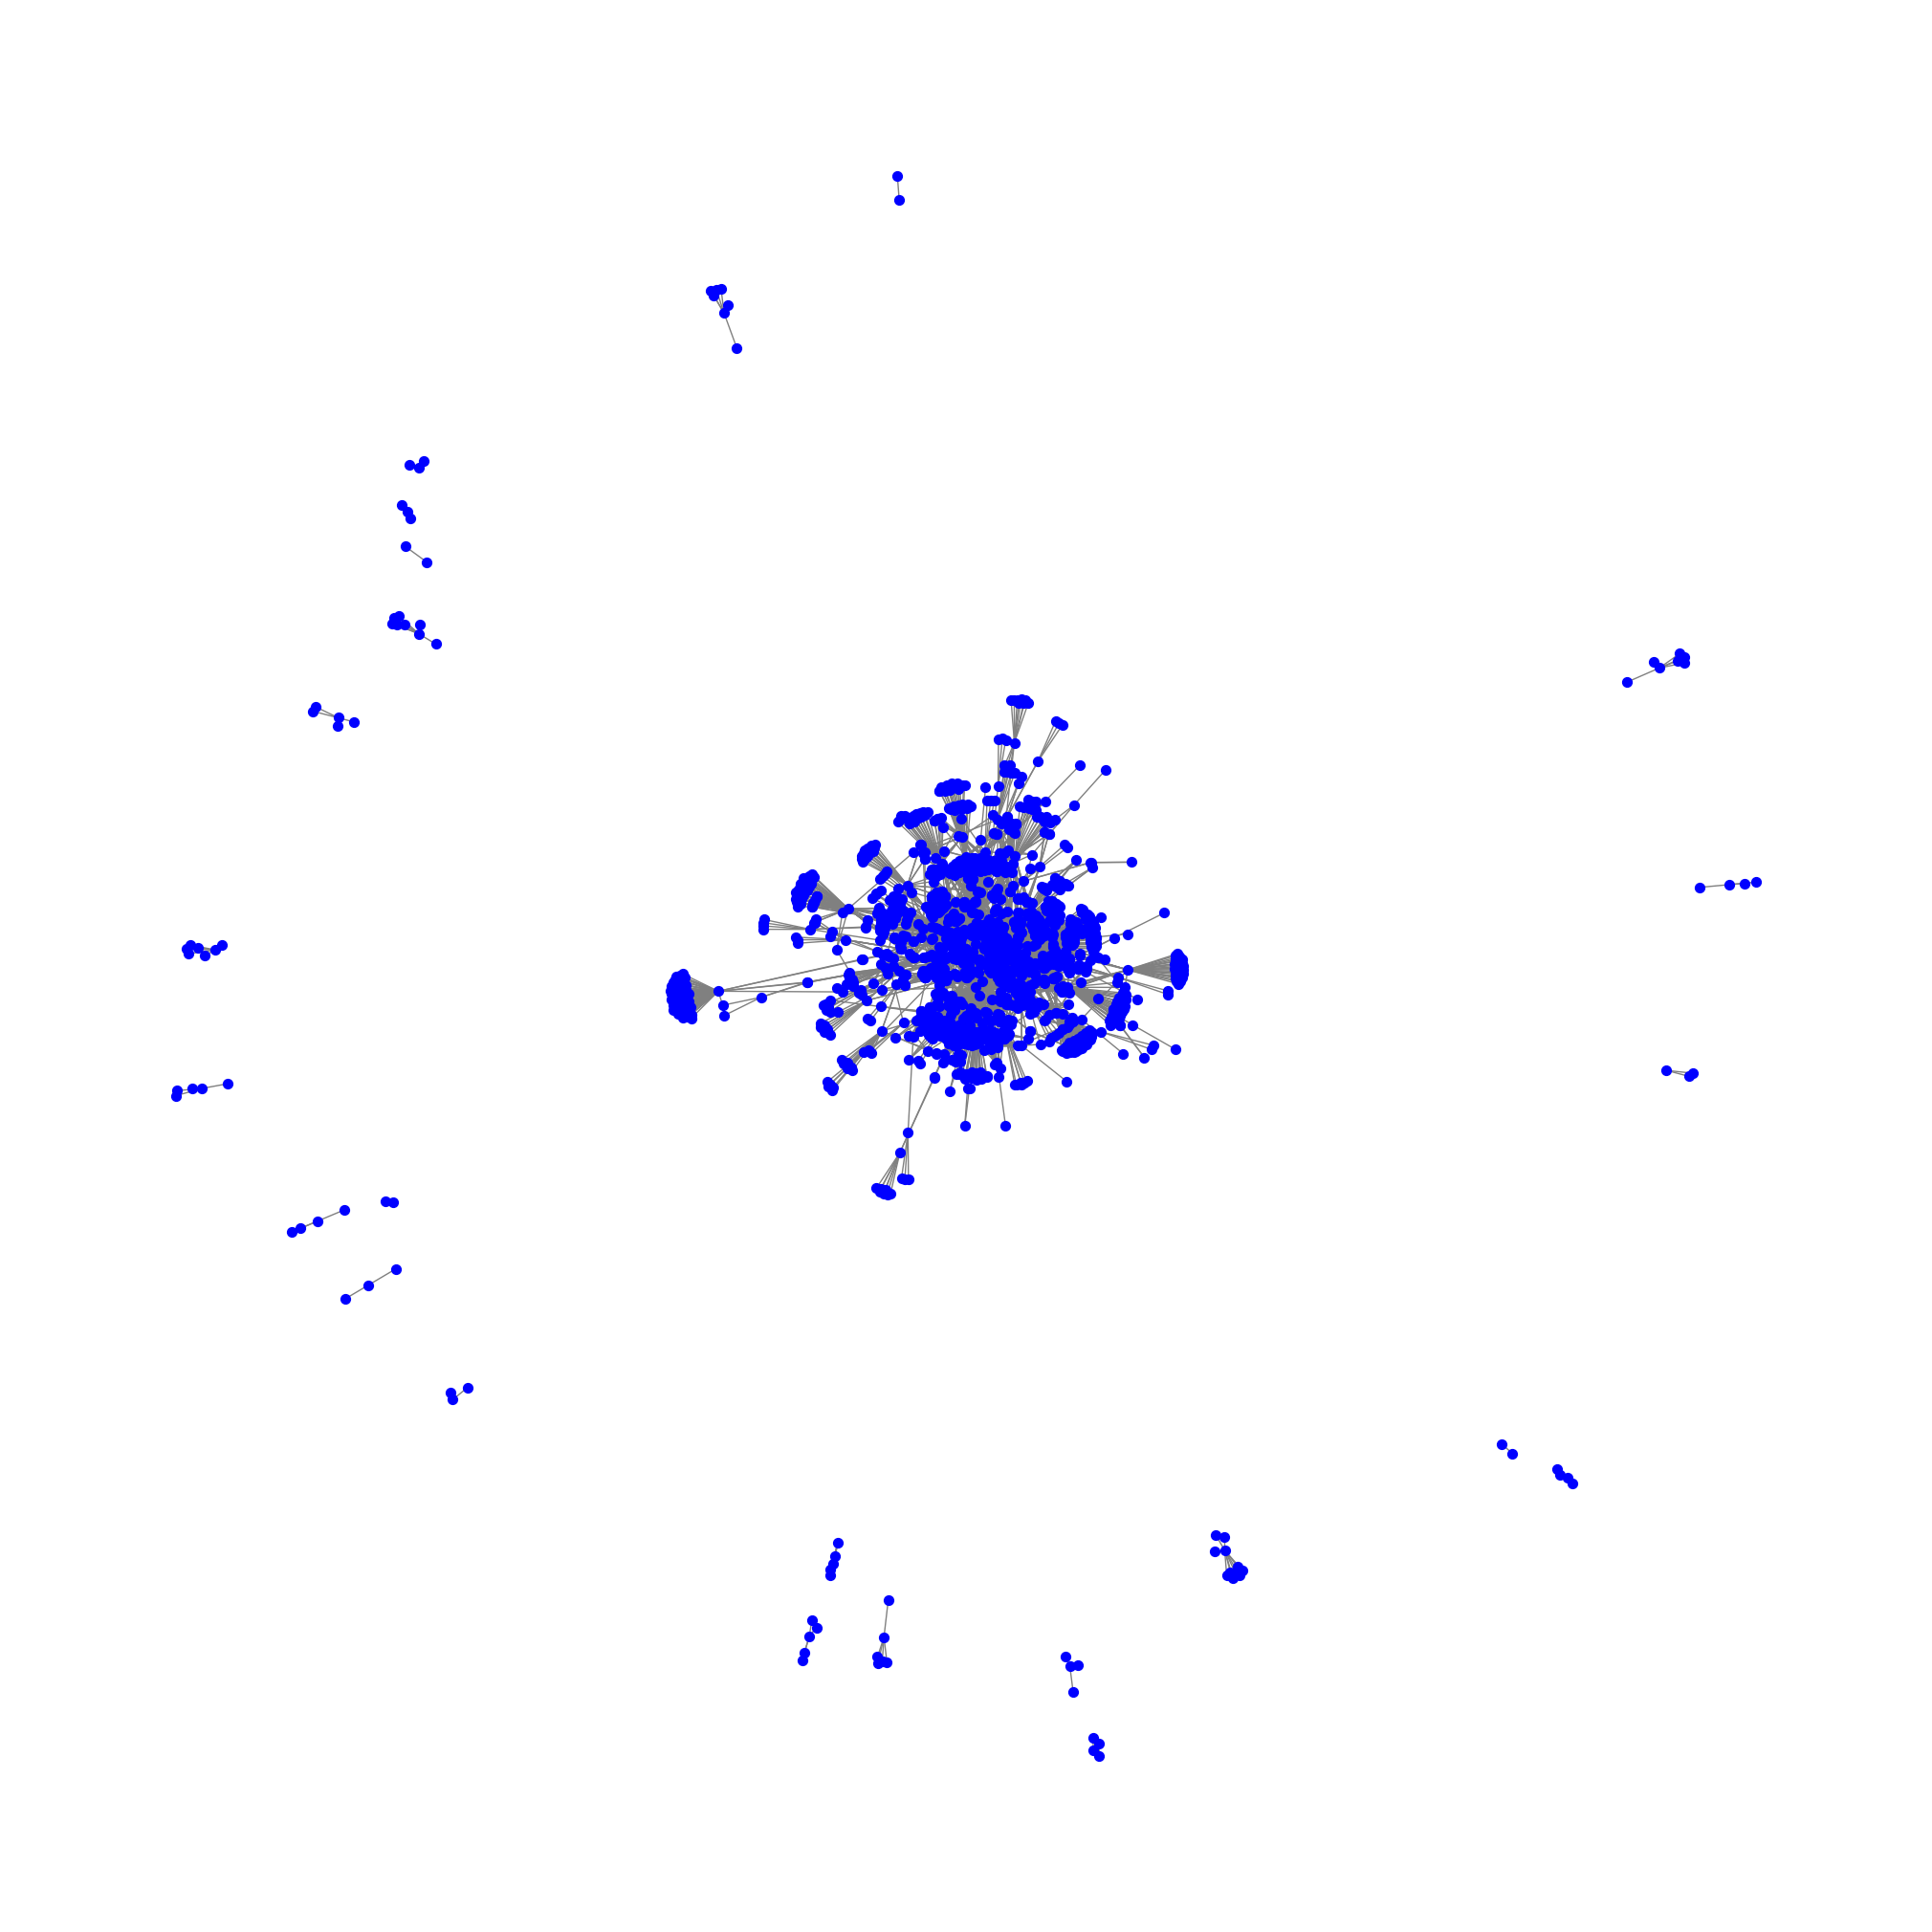

In [51]:
figure = plt.figure(figsize=(20,20))
layout= nx.spring_layout(e_coli)
nx.draw(e_coli, node_size=50, node_color='blue', edge_color='grey', pos=layout)

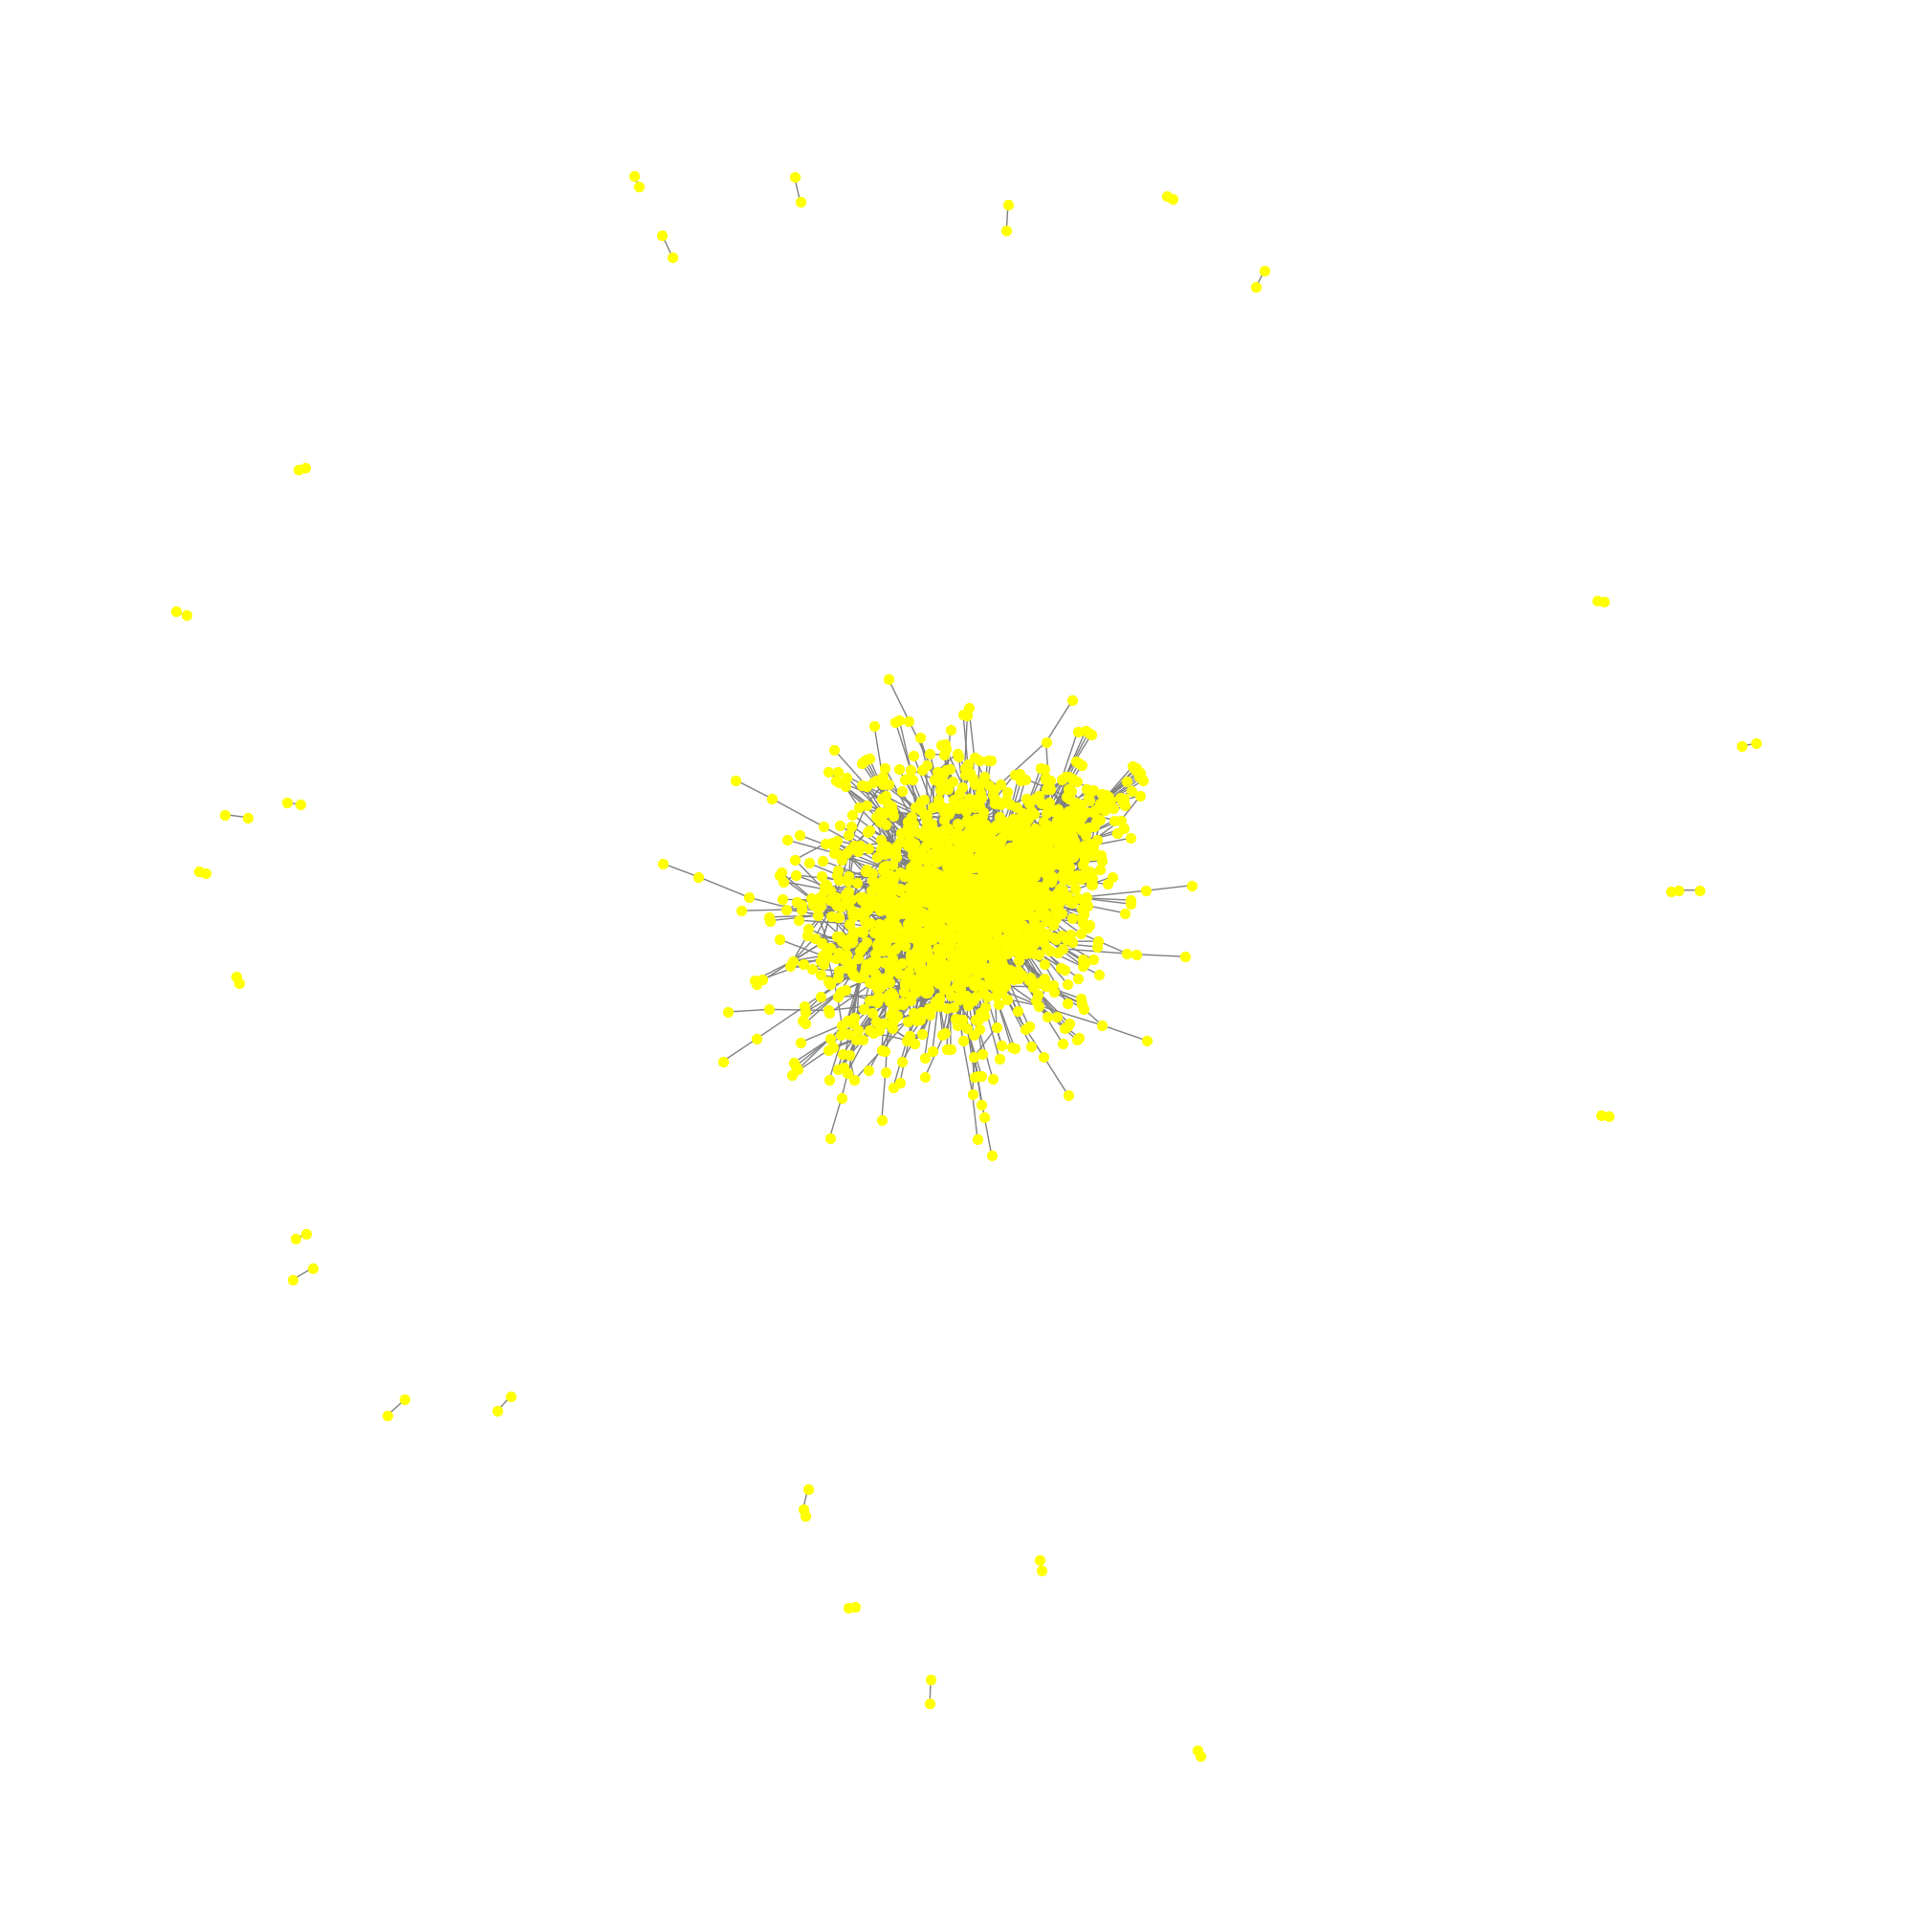

In [52]:
figure= plt.figure(figsize=(20,20))
layout= nx.spring_layout(arenas_email)
nx.draw(arenas_email, node_size=50, node_color='yellow', edge_color='grey', pos=layout)

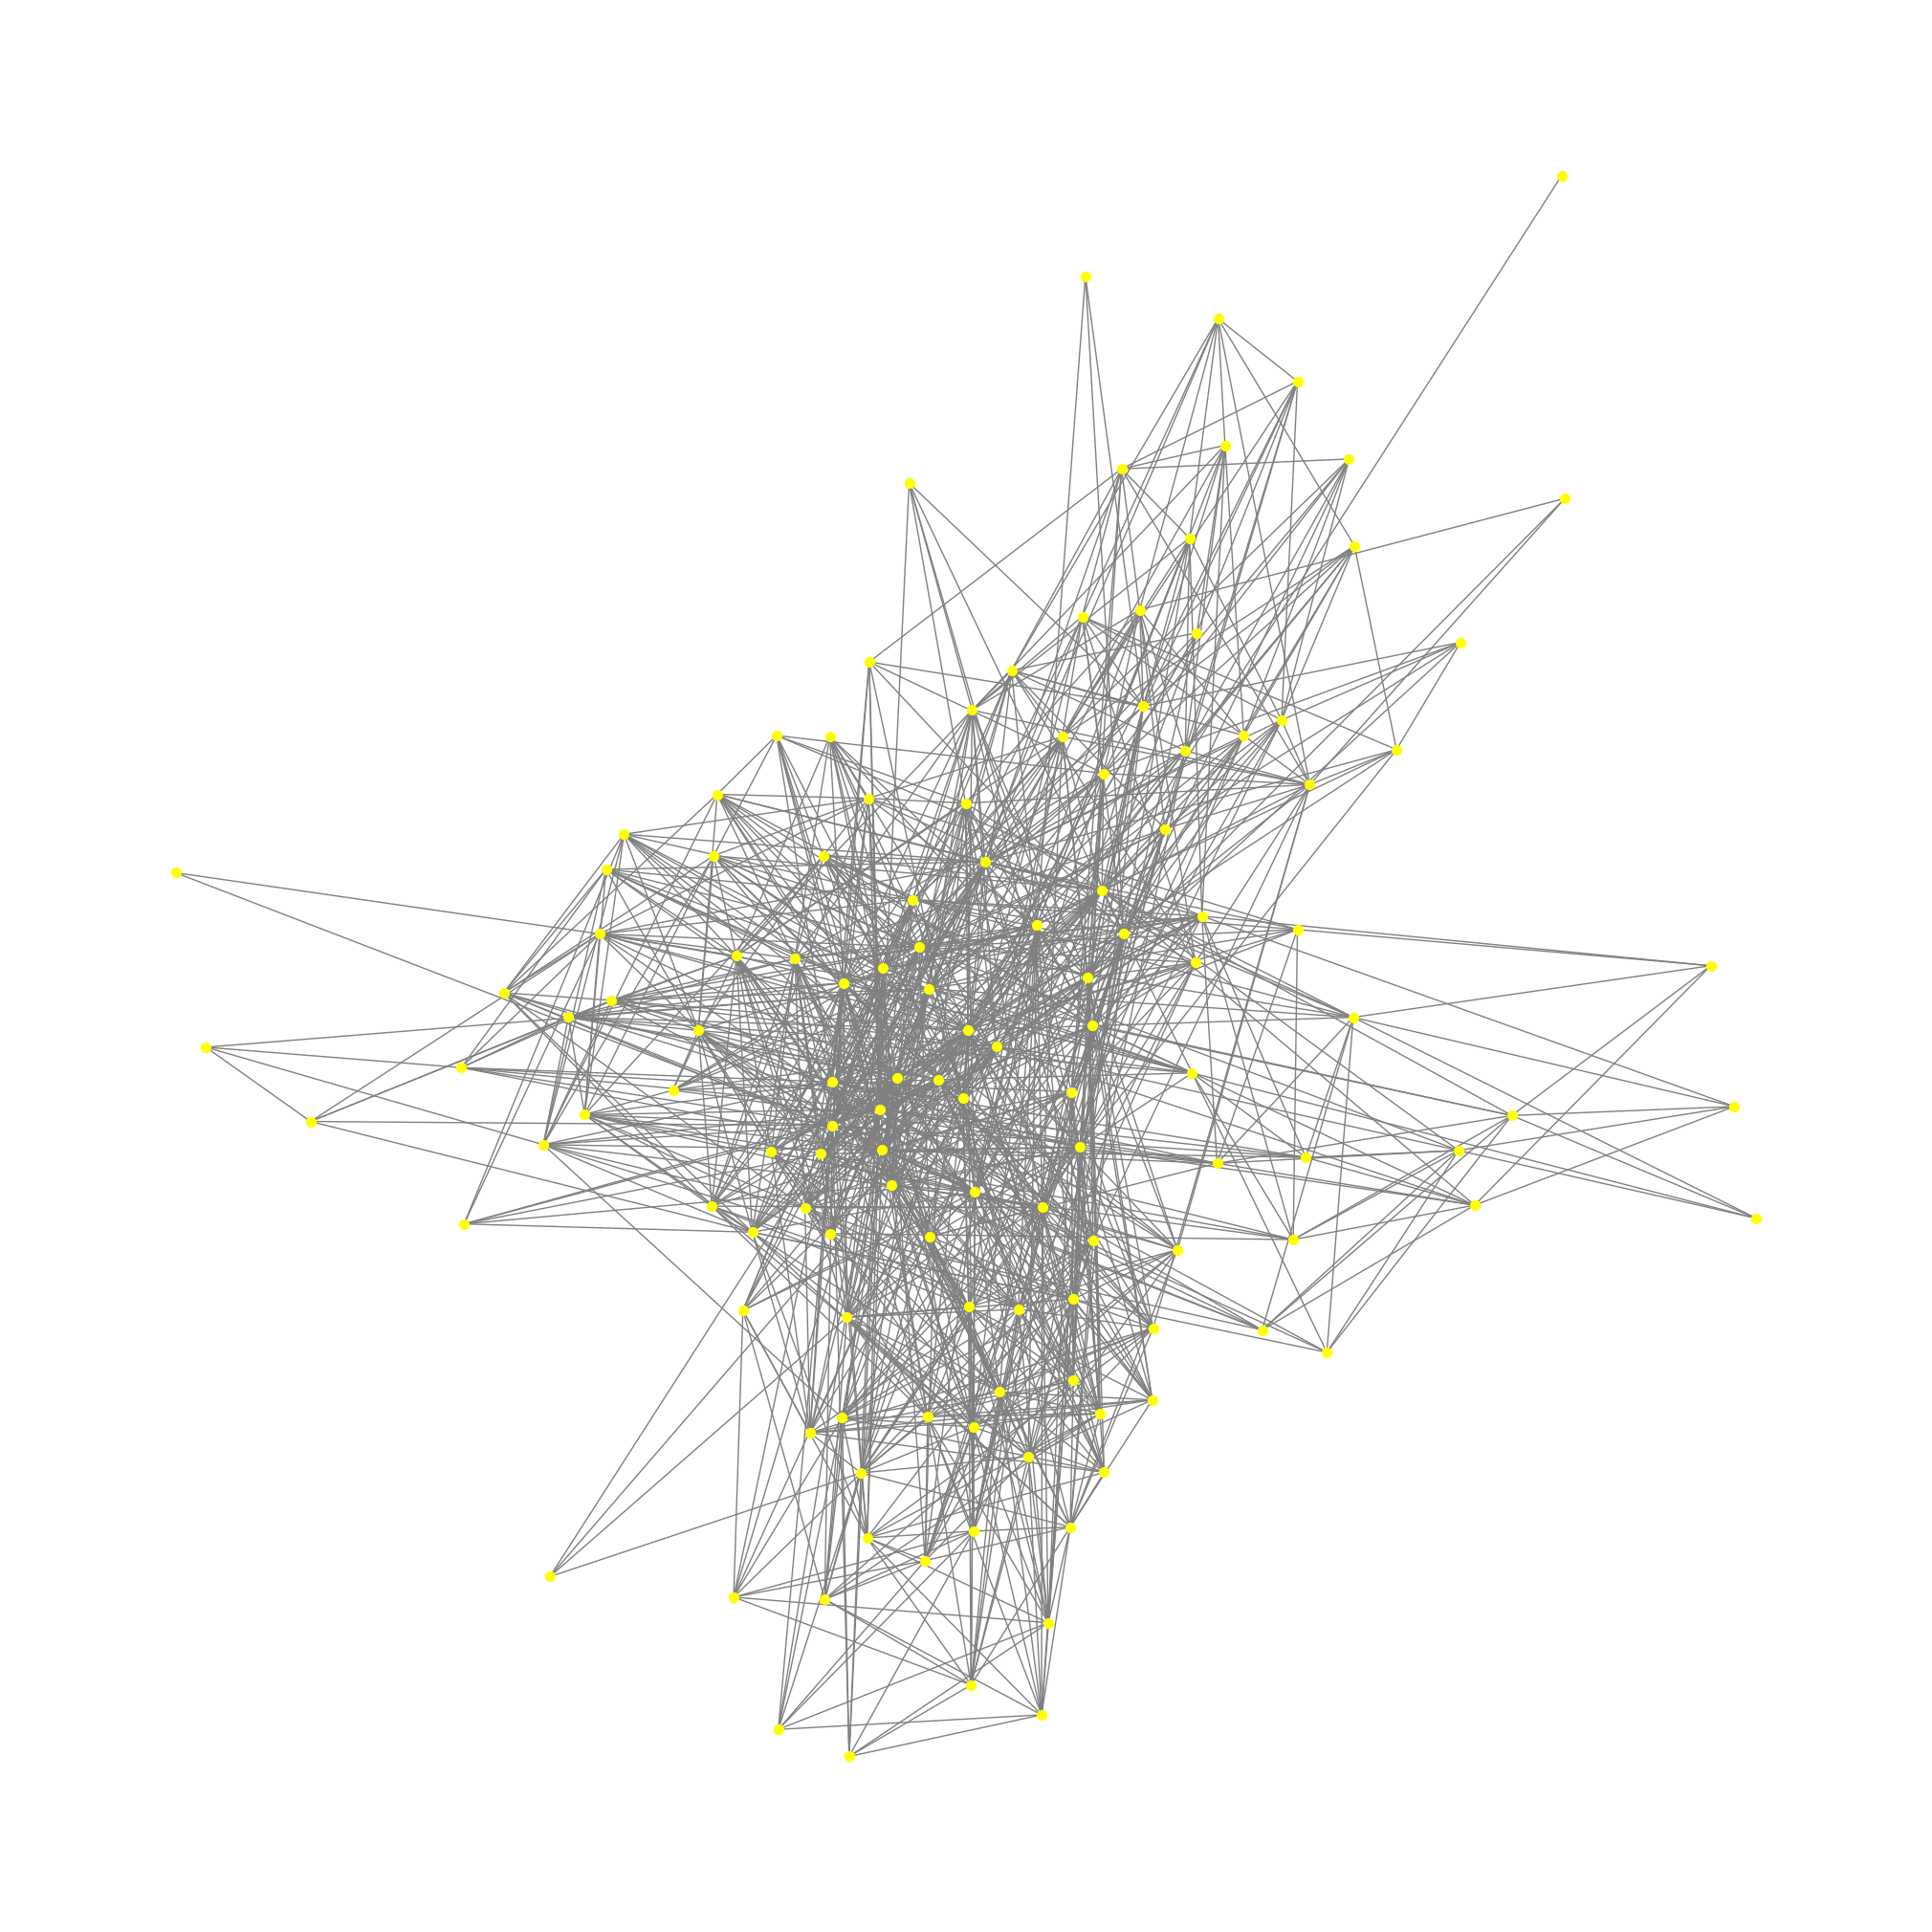

In [53]:
figure= plt.figure(figsize=(20,20))
layout= nx.spring_layout(bn_cat_mixed_species_brain_1)
nx.draw(bn_cat_mixed_species_brain_1, node_size=50, node_color='yellow', edge_color='grey', pos=layout)

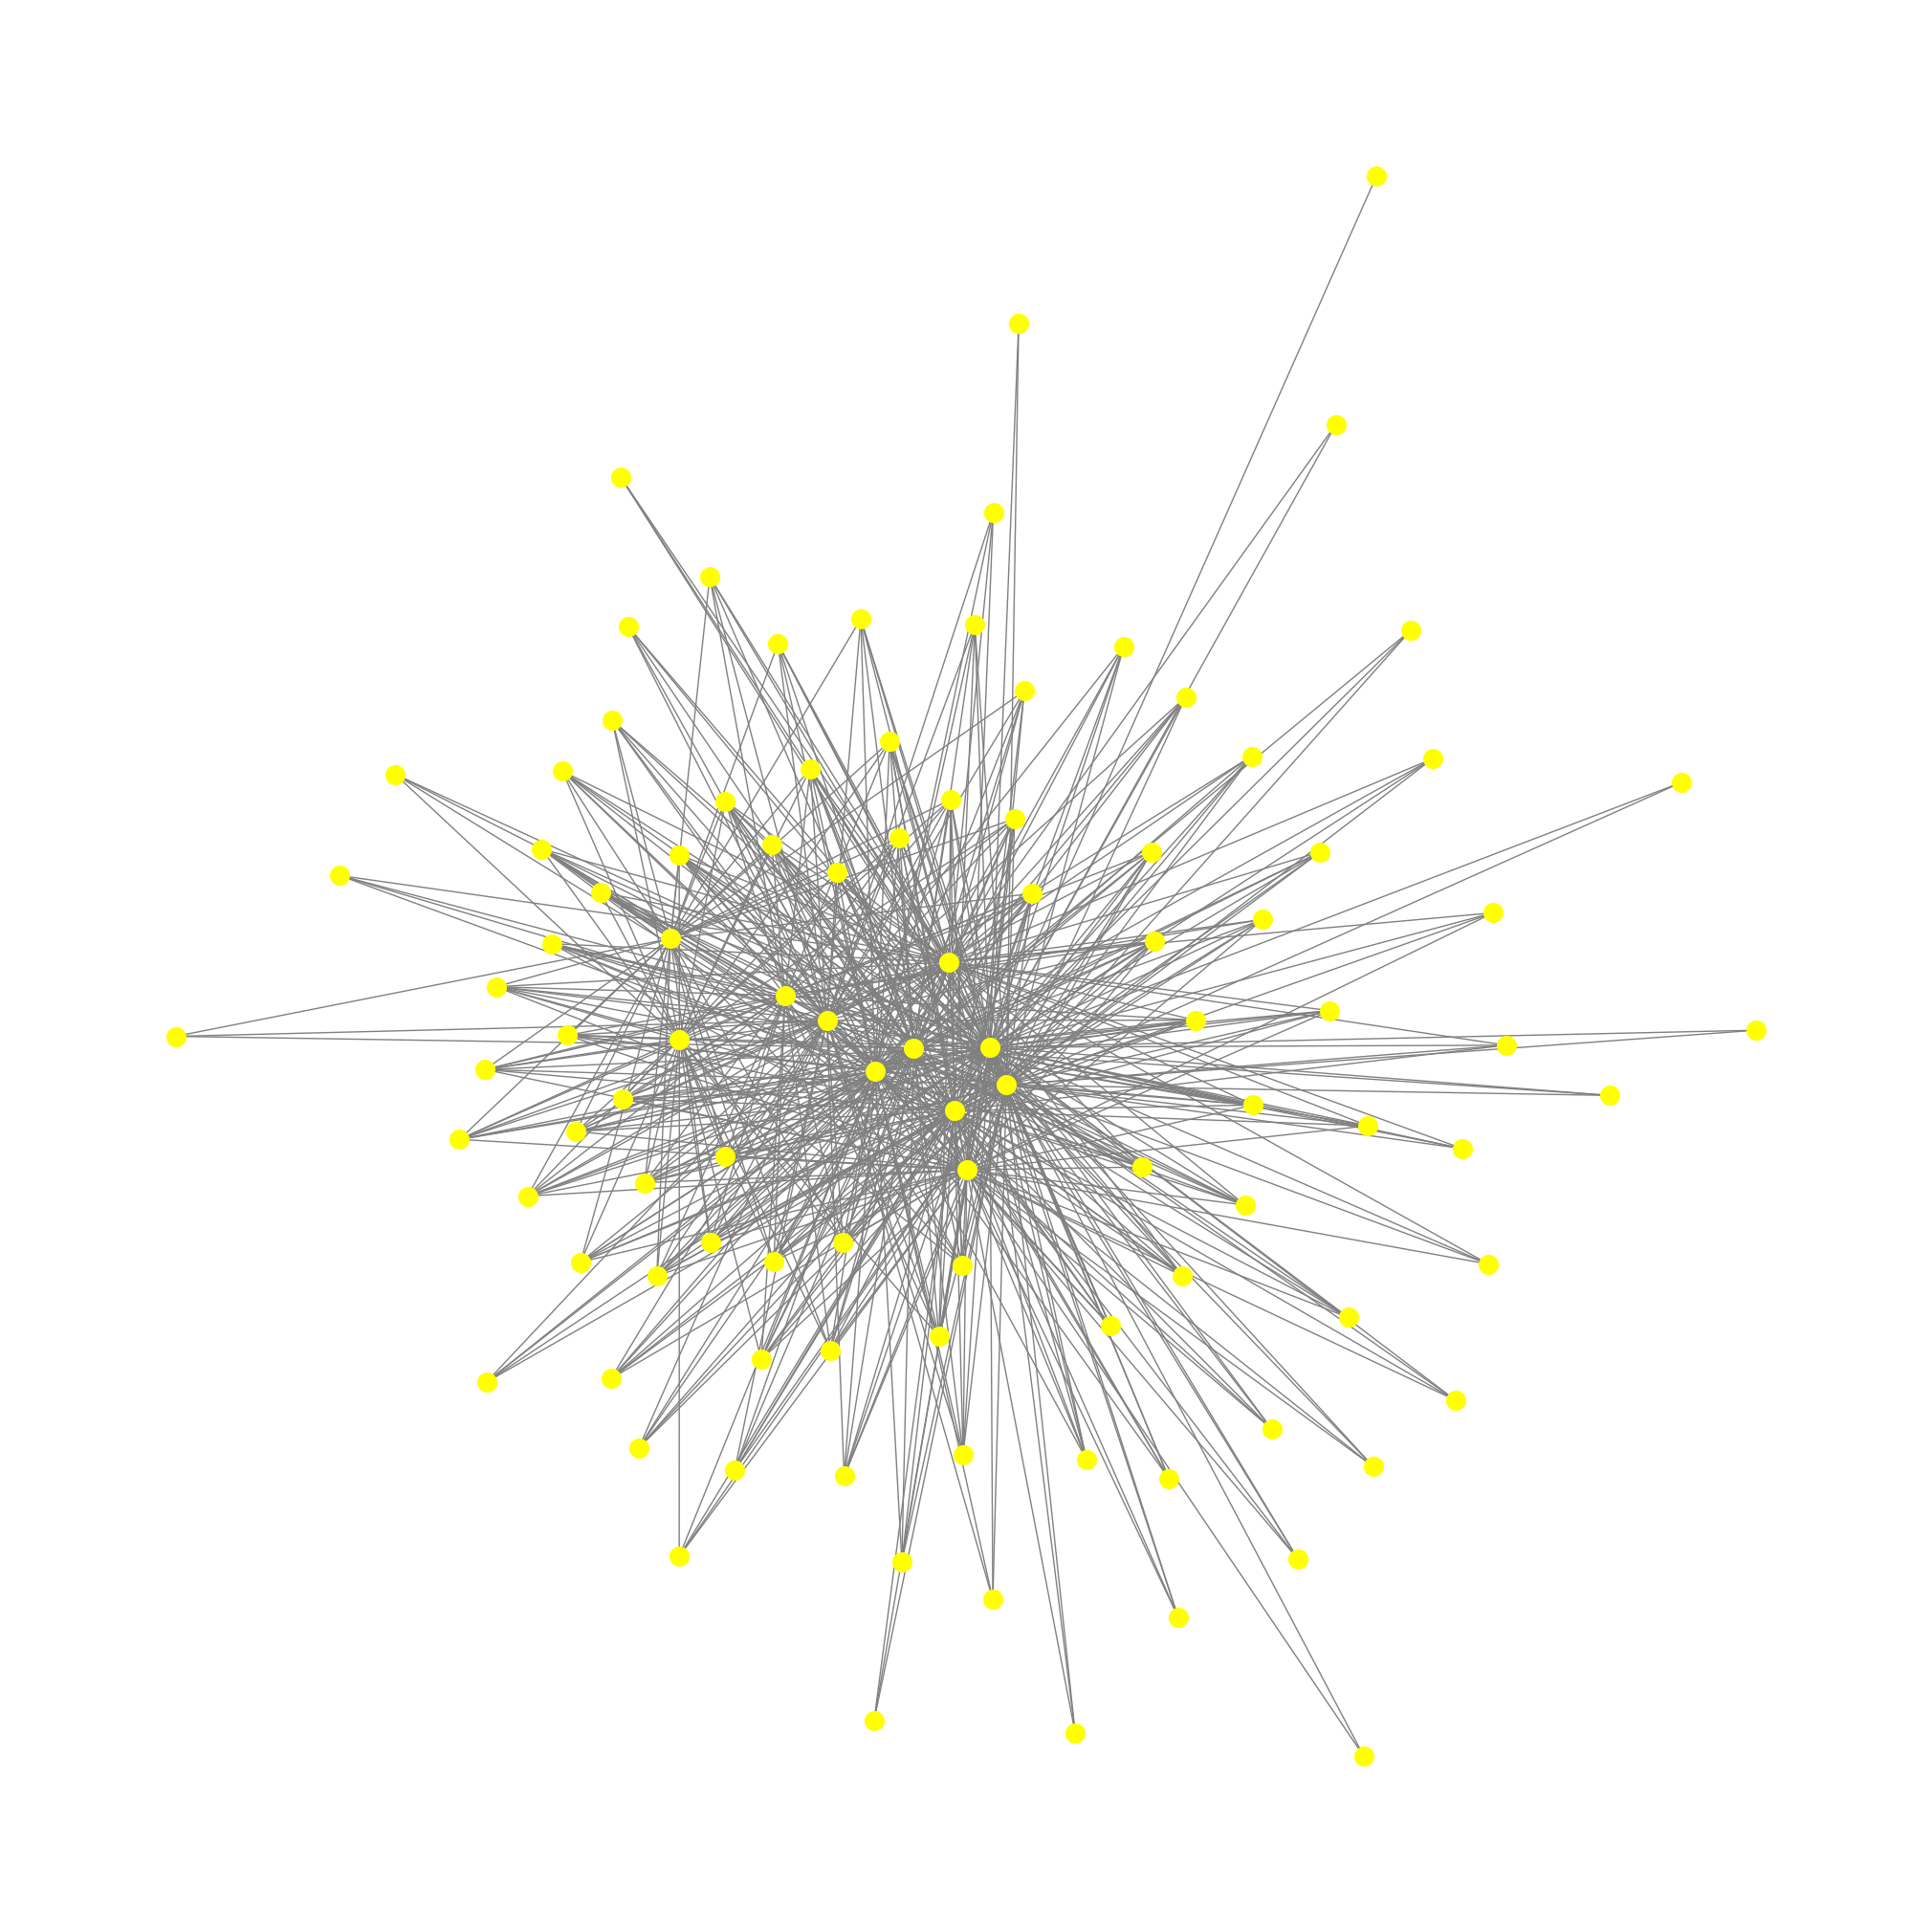

In [54]:
figure= plt.figure(figsize=(20,20))
layout= nx.spring_layout(bn_macaque_rhesus_brain_2)
nx.draw(bn_macaque_rhesus_brain_2, node_size=200, node_color='yellow', edge_color='grey', pos=layout)